In [2]:
#Import relevant libraries
import numpy as np
import math
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

import seaborn as sb
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


from scipy import stats
from scipy.special import boxcox, inv_boxcox
from scipy.spatial.distance import euclidean

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras import optimizers
from keras.models import load_model
import tensorflow_model_optimization as tfmot
from tensorflow import keras

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from skopt import BayesSearchCV

# Dataset import

In [232]:
#df_v2 = pd.read_excel('DataFrames/8205_81__all_variables.xlsx')
df_v2 = pd.read_excel('DataFrames/15355_152__allfinal_variables.xlsx')
print("Number of Columns: ",df_v2.shape[1])
print("Number of Rows: ",df_v2.shape[0])

Number of Columns:  152
Number of Rows:  15355


In [3]:
#df_v2 = pd.read_excel('DataFrames/8205_81__all_variables.xlsx')
df_v2 = pd.read_excel('DataFrames/8205_142__all_variables.xlsx')
print("Number of Columns: ",df_v2.shape[1])
print("Number of Rows: ",df_v2.shape[0])

Number of Columns:  142
Number of Rows:  8205


In [4]:
#df_v2 = pd.read_excel('DataFrames/8205_81__all_variables.xlsx')
df_v2 = pd.read_excel('DataFrames/6474_141__all_variables_SAPSCompleto.xlsx')
print("Number of Columns: ",df_v2_pre.shape[1])
print("Number of Rows: ",df_v2_pre.shape[0])

NameError: name 'df_v2_pre' is not defined

In [196]:
def diff(df1, df2):
    # Get the columns in each dataframe
    columns_df1 = set(df1.columns)
    columns_df2 = set(df2.columns)

    # Find columns present in df1 but not in df2
    columns_only_in_df1 = columns_df1 - columns_df2

    # Find columns present in df2 but not in df1
    columns_only_in_df2 = columns_df2 - columns_df1

    print("Columns present only in DataFrame 1:", columns_only_in_df1)
    print("\nColumns present only in DataFrame 2:", columns_only_in_df2)

In [197]:
diff(df_v2_all, df_v2)

Columns present only in DataFrame 1: {'SIF (sistema de incontinência fecal)', 'Prongs', 'Cânula Veno-Venosa', 'Agulha intraóssea', 'NIRS', 'Dreno Membro superior', 'Sonda nasoduodenal', 'CPAP com válvula de Boussignac', 'PbtO2 - Pressão tecidular cerebral de O2', 'EEG - Continuo', 'Incubadora', 'Sonda gastrostomia', 'Eletrocateter'}

Columns present only in DataFrame 2: {'Unique_patient_per_Service', 'Unique_Hosp_per_Patient'}


In [56]:
df_v2.head().T

0            1  \
LOS                                                   29.194440     4.086110   
DoenteIdadeEmAnos                                     66.000000    71.000000   
TipoProvenienciaId                                     3.000000     3.000000   
HospitalRegiaoId                                       3.000000     3.000000   
HospitalCodigo                                        15.000000    15.000000   
ServicoId                                              3.000000     3.000000   
DoenteSexoId                                           1.000000     1.000000   
SAPSScore                                             73.000000    70.000000   
TipoAdmissaoId                                         5.000000     5.000000   
Traqueostomia                                          1.000000     0.000000   
TempoAteAdmissaoUni                                    2.008333     7.168750   
Unique_Hosp_per_Patient                                1.000000     1.000000   
Unique_patient_per_Hosp                              599.000000   599.000000   
Unique_patient_per_Admission                        3074.000000  3074.000000   
Unique_patient_per_Service                           222.000000   222.000000   
Corticosteróide                                        0.000000     1.000000   
Antimalárico                                           0.000000     0.000000   
Antivírico                                             0.000000     0.000000   
Anticoagulante                                         0.000000     2.000000   
Vasopressor                                            1.000000     1.000000   
Broncodilatador                                        2.000000     0.000000   
Psicofármaco                                           0.000000     0.000000   
Opiáceo                                                1.000000     1.000000   
Relaxante muscular                                     0.000000     0.000000   
Antibiótico                                            2.000000     1.000000   
NumPrescricoes                                         6.000000     6.000000   
DuracaoPrescricoes                                    30.000000    14.000000   
VMI                                                    1.000000     1.000000   
NumeroDiagn                                            5.000000     5.000000   
DispositivosNum                                        9.000000     9.000000   
GlasgowScoreMin                                        3.000000     4.000000   
PosicaoProne                                           0.000000     0.000000   
DiagnsAntecendentes                                    2.000000     2.000000   
SAPSHCo3                                              28.200000    17.800000   
SAPSFiO2                                               0.300000     0.800000   
SAPSNa                                               150.000000   134.000000   
SAPSK                                                  4.220000     5.660000   
SAPSUreia                                             90.000000    92.000000   
SAPSDoencasCronicas                                    4.000000     4.000000   
SAPSBilirrubina                                        0.510000     1.330000   
SAPSDebitoUrinario                                     1.200000     2.000000   
SAPSLeucocitos                                        10.200000     1.400000   
SAPSPaO2                                              52.000000    66.000000   
SAPSPaoFio                                           173.000000    82.000000   
FC_max                                               112.000000   160.000000   
Temp_max                                              37.700000    38.000000   
FR_max                                                39.000000    22.000000   
SpO2_min                                              93.000000    73.000000   
TAM_min                                               17.000000    52.000000   
BE_min                                                 1.10000

### Missing Values

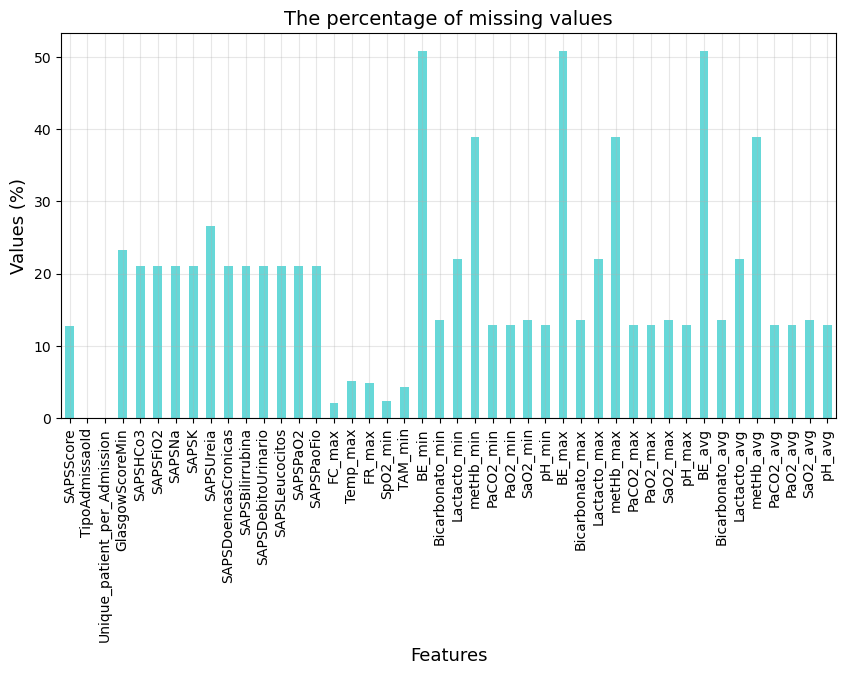

In [4]:
# Calculate the percentage of missing values for each column
missing_percentages = (df_v2.isnull().sum() / len(df_v2)) * 100

# Filter only the columns with missing values
missing_columns = missing_percentages[missing_percentages > 0]

# Create a bar plot
plt.figure(figsize=(10, 5))
missing_columns.plot(kind='bar', color='c', alpha = 0.6)
# Adjust the alpha level for grid lines
plt.grid(True, alpha=0.3)

# Set plot title and labels
#plt.title('Percentage of Missing Values by Feature')
plt.xlabel('Features', fontsize = 13)
plt.ylabel('Values (%)', fontsize = 13)
plt.title('The percentage of missing values', fontsize=14)

# Save the plot as an image (optional)
plt.savefig('Images/missing_values_allvars.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

In [5]:
"""
    Percentage of missing values
"""
# Calculate the percentage of missing values in each variable
percent_missing = df_v2.isnull().sum() * 100 / len(df_v2)
pd.DataFrame(percent_missing)

0
LOS                                                  0.000000
DoenteIdadeEmAnos                                    0.000000
TipoProvenienciaId                                   0.000000
HospitalRegiaoId                                     0.000000
HospitalCodigo                                       0.000000
ServicoId                                            0.000000
DoenteSexoId                                         0.000000
SAPSScore                                           12.760512
TipoAdmissaoId                                       0.060938
Traqueostomia                                        0.000000
TempoAteAdmissaoUni                                  0.000000
Unique_Hosp_per_Patient                              0.000000
Unique_patient_per_Hosp                              0.000000
Unique_patient_per_Admission                         0.060938
Unique_patient_per_Service                           0.000000
Corticosteróide                                      0.000000
Antimalárico                                         0.000000
Antivírico                                           0.000000
Anticoagulante                                       0.000000
Vasopressor                                          0.000000
Broncodilatador                                      0.000000
Psicofármaco                                         0.000000
Opiáceo                                              0.000000
Relaxante muscular                                   0.000000
Antibiótico                                          0.000000
NumPrescricoes                                       0.000000
DuracaoPrescricoes                                   0.000000
VMI                                                  0.000000
NumeroDiagn                                          0.000000
DispositivosNum                                      0.000000
GlasgowScoreMin                                     23.290676
PosicaoProne                                         0.000000
DiagnsAntecendentes                                  0.000000
SAPSHCo3                                            21.096892
SAPSFiO2                                            21.096892
SAPSNa                                              21.096892
SAPSK                                               21.096892
SAPSUreia                                           26.556977
SAPSDoencasCronicas                                 21.096892
SAPSBilirrubina                                     21.096892
SAPSDebitoUrinario                                  21.096892
SAPSLeucocitos                                      21.096892
SAPSPaO2                                            21.096892
SAPSPaoFio                                          21.096892
FC_max                                               2.157221
Temp_max                                             5.167581
FR_max                                               4.801950
SpO2_min                                             2.364412
TAM_min                                              4.290067
BE_min                                              50.761731
Bicarbonato_min                                     13.625838
Lactacto_min                                        22.010969
metHb_min                                           38.890920
PaCO2_min                                           12.894576
PaO2_min                                            12.845826
SaO2_min                                            13.638026
pH_min                                              12.833638
BE_max                                              50.761731
Bicarbonato_max                                     13.625838
Lactacto_max                                        22.010969
metHb_max                                           38.890920
PaCO2_max                                           12.894576
PaO2_max                                            12.845826
SaO2_max                                            13.638026
pH_max                        

In [6]:
#features_categorical = ['HospitalRegiaoId', 'TipoProvenienciaId', 'TipoAdmissaoId', 'HospitalCodigo', 'TipoInfecao']
features_categorical = ['HospitalRegiaoId', 'TipoProvenienciaId', 'TipoAdmissaoId', 'HospitalCodigo', 'SAPSDoencasCronicas', 'ServicoId', 'DoenteSexoId']

In [7]:
"""
    Treat missing numerical data
"""

features_to_fill = []
features_to_drop = []
missing_thresh = 40    # %

for i in range(len(list(df_v2.columns))):
    per_missing = percent_missing.iloc[i]
    if per_missing < missing_thresh and per_missing > 0:
        features_to_fill.append(df_v2.columns[i])
    elif per_missing >= missing_thresh:
        features_to_drop.append(df_v2.columns[i])

print("Nº of features to drop: ",len(features_to_drop))
for f in features_to_drop:
    df_v2.drop(f, axis=1, inplace=True)

features_to_fill = [x for x in features_to_fill if x not in features_categorical]

print("Nº of feature for fill: ",len(features_to_fill))
df_v2[features_to_fill] = df_v2[features_to_fill].fillna(df_v2.median())

Nº of features to drop:  3
Nº of feature for fill:  39


In [8]:
"""
    Treat missing categorical data
"""
for fea in features_categorical:
    # Assuming your categorical variable is in a pandas Series or DataFrame column called 'category'
    if fea in list(df_v2.columns):
        df_v2[fea] = df_v2[fea].fillna('Unknown')

In [9]:
"""
    Missing values: Deleting
"""
#print(df_v2.isnull().sum())  
print("Sum of all missing values: ",df_v2.isnull().sum().sum())

# Remove rows with missing values
df_v2.dropna(axis=0, inplace=True)

print("Sum of all missing values: ",df_v2.isnull().sum().sum())
print("Number of Columns: ",df_v2.shape[1])
print("Number of Rows: ",df_v2.shape[0])
#df_v2.describe()

Sum of all missing values:  0
Sum of all missing values:  0
Number of Columns:  139
Number of Rows:  8205


### Outliers

In [10]:
"""
    Filter LOS
"""
#df_v2 = df_v2[df_v2['LOS'] < 150]  
shape_before = df_v2.shape[0]

df_v2 = df_v2[df_v2['LOS'] > 0]
#df_v2 = df_v2[df_v2['LOS'] < 400]

print("Number of Columns: ",df_v2.shape[1])
print("Number of Rows: ",df_v2.shape[0])
neg = shape_before - df_v2.shape[0]
print("Number of negative/zero values: ",neg)

Number of Columns:  139
Number of Rows:  8203
Number of negative/zero values:  2


<AxesSubplot: xlabel='SAPSDoencasCronicas', ylabel='LOS'>

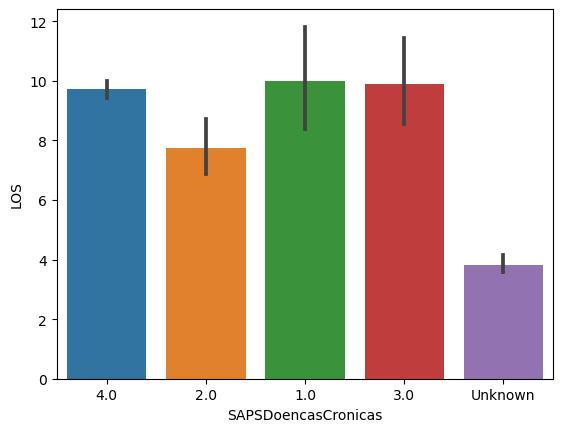

In [391]:
#print(df_v2[features_categorical[-2]].value_counts())
sb.barplot( x = 'SAPSDoencasCronicas',y = 'LOS', data = df_v2 )

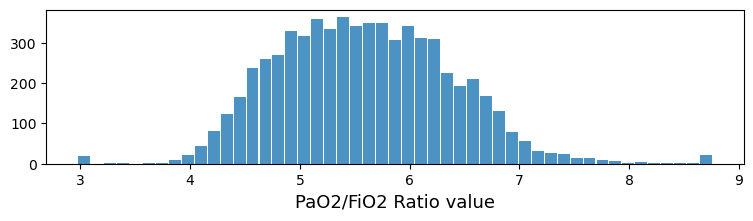

In [179]:
plt.figure(figsize=(9,2))
#plt.ylim(0,100)
#plt.xlim(0,600)
plt.hist(df_v2_wins2['SAPSPaoFio'], alpha=0.8,bins='auto', rwidth = 0.92)
plt.xlabel('PaO2/FiO2 Ratio value transformated', fontsize=13)

# Save the plot as an image (optional)
plt.savefig('Images/paofio_bc_pos.png', bbox_inches='tight', dpi=300)

plt.show()

In [12]:
"""
    List of variable to deal with outliers
"""
l_wins = ['SAPSNa', 'SAPSUreia', 'SAPSBilirrubina', 'SAPSDebitoUrinario', 'SAPSLeucocitos','FC_max','Temp_max','FR_max'
          , 'Bicarbonato_min', 'Lactacto_min', 'PaCO2_min', 'PaO2_min', 'metHb_avg', 'SAPSHCo3', 'SAPSPaO2'
          , 'Bicarbonato_max', 'Lactacto_max', 'PaCO2_max', 'PaO2_max', 'SAPSK', 'SAPSBilirrubina'
          , 'Bicarbonato_avg', 'Lactacto_avg', 'PaCO2_avg', 'PaO2_avg', 'SAPSPaoFio', 'TempoAteAdmissaoUni']

In [13]:
"""
    Winsorize Process - transform outliers
"""

# Winsorize column1 at the 95th percentile
df_v2_wins1 = df_v2.copy()
df_v2_wins2 = df_v2.copy()
df_v2_wins3 = df_v2.copy()
df_v2_wins4 = df_v2.copy()
df_v2_wins5 = df_v2.copy()
for col in l_wins:
    if col in (df_v2.columns):
        df_v2_wins1[col] = stats.mstats.winsorize(df_v2[col], limits=[0.001, 0.001])
        df_v2_wins2[col] = stats.mstats.winsorize(df_v2[col], limits=[0.003, 0.003])         
        df_v2_wins3[col] = stats.mstats.winsorize(df_v2[col], limits=[0.005, 0.005])        
        df_v2_wins4[col] = stats.mstats.winsorize(df_v2[col], limits=[0.01, 0.01])       
        df_v2_wins5[col] = stats.mstats.winsorize(df_v2[col], limits=[0.05, 0.05])        

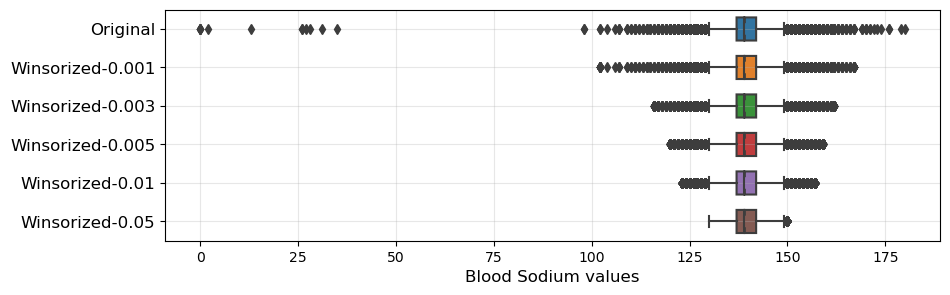

In [257]:
"""
    Box plot - vars
"""
combined_data = [df_v2['SAPSNa'], df_v2_wins1['SAPSNa'], df_v2_wins2['SAPSNa'], df_v2_wins3['SAPSNa'], df_v2_wins4['SAPSNa'], df_v2_wins5['SAPSNa']]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Plot the box plots
sb.boxplot(data=combined_data, orient='h', notch = True, width=0.6, ax=ax)

# Set the labels and title
ax.set_yticklabels(['Original', 'Winsorized-0.001', 'Winsorized-0.003', 'Winsorized-0.005', 'Winsorized-0.01', 'Winsorized-0.05'], fontsize=12)
ax.set_xlabel('Blood Sodium values', fontsize=12)

# adding horizontal grid lines
plt.grid(True, alpha=0.3)

#ax.set_xlim(0, 200)

# Save the plot as an image (optional)
plt.savefig('Images/na_wins_all.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

### Feature Codification and Transformation

In [14]:
"""
    Perform dummies
""" 
def OneHotEnc(data_f, features):
    for f in features:
        if f in list(data_f.columns):
            data_f = pd.get_dummies(data_f,prefix=[f], columns = [f], drop_first=True)
    return data_f

#features_to_enc = ['TipoAdmissaoId']
df_v2_wins = OneHotEnc(df_v2_wins2, features_categorical)

In [111]:
# transform training data & save lambda value
def BoxCox(y):
    __, fitted_lambda = stats.boxcox(y)
    y_bc = boxcox(y, fitted_lambda)
    #y_bc = pd.DataFrame(y_bc)
    return y_bc, fitted_lambda

In [396]:
df_v2_wins.head()

LOS  DoenteIdadeEmAnos  SAPSScore  Traqueostomia  TempoAteAdmissaoUni  \
0  29.19444                 66       73.0              1             2.008333   
1   4.08611                 71       70.0              0             7.168750   
2   4.56597                 54       61.0              0             0.000000   
3   5.58819                 61       44.0              0             1.684028   
4   9.47083                 73       63.0              1             0.121528   

   Unique_Hosp_per_Patient  Unique_patient_per_Hosp  \
0                        1                      651   
1                        1                      651   
2                        1                      651   
3                        1                      651   
4                        1                      651   

   Unique_patient_per_Admission  Unique_patient_per_Service  Corticosteróide  \
0                        3849.0                         237                0   
1                        3849.0                         237                1   
2                        3849.0                         237                1   
3                        3849.0                         262                0   
4                         215.0                         160                0   

   ...  ServicoId_85  ServicoId_86  ServicoId_88  ServicoId_91  ServicoId_92  \
0  ...             0             0             0             0             0   
1  ...             0             0             0             0             0   
2  ...             0             0             0             0             0   
3  ...             0             0             0             0             0   
4  ...             0             0             0             0             0   

   ServicoId_95  ServicoId_96  ServicoId_102  ServicoId_103  DoenteSexoId_2  
0             0             0              0              0               0  
1             0             0              0              0               0  
2             0             0              0              0               0  
3             0             0              0              0               0  
4             0             0              0              0               0  

[5 rows x 245 columns]

In [282]:
#TO BOXCOX
vars_to_boxcox = [fea for fea in df_v2_wins.columns if fea not in features_categorical and len(df_v2_wins[fea].value_counts()) not in [1,2] and fea != 'LOS']

In [101]:
#duracao_presc = df_final_filtered['DuracaoPrescricoes']
#df_final_filtered['DuracaoPrescricoes'] = duracao_presc
#df_final_filtered.drop('DuracaoPrescricoes',axis=1, inplace=True)
"""
    Tranformação logaritmica de variaveis
"""
df_v2_bc = df_v2.copy()
for var in vars_to_boxcox: 
    new_name = var + '_bc'
    df_v2_bc[var], lambda_var = BoxCox(df_v2_bc[var] + 1)

115.0


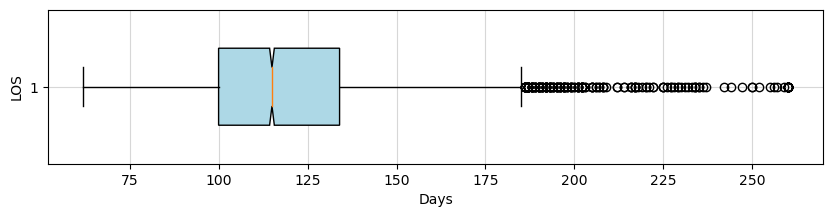

In [80]:
"""
    Box plot - Tempo de Internamento
"""
plt.figure(figsize=(10,2))
#plt.xlim(0,200)
plt.xlabel('Days')
plt.ylabel('LOS')
box = plt.boxplot(df_v2_wins['FC_max'], vert = False, notch = True, widths=0.5, patch_artist=True)
 
_median = np.median(df_v2_wins['FC_max'])
print(_median)

# fill with colors
for patch in box['boxes']:
        patch.set(color='black')
        patch.set(facecolor = 'lightblue' )

# adding horizontal grid lines
plt.grid(True, alpha=0.5)

"""plt.text(8, 0.07,
         str('Median: '+str(round(_median, 3))),
         bbox=dict(facecolor='white',
                   alpha=0.7),
         fontsize=12)"""

plt.show()

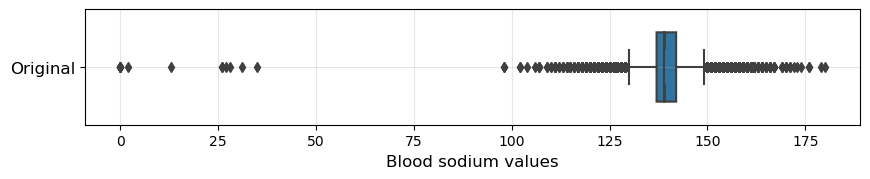

In [252]:
# Combine the data into a single list
#combined_data = [df_v2_wins['LOS'], df_v2_filtered['LOS']]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 1.5))

# Plot the box plots
sb.boxplot(data=df_v2['SAPSNa'], orient='h', notch = True, width=0.6, ax=ax)

# Set the labels and title
ax.set_yticklabels(['Original'], fontsize=12)
ax.set_xlabel('Blood sodium values', fontsize=12)

# adding horizontal grid lines
plt.grid(True, alpha=0.3)

#ax.set_xlim(0, 200)

# Save the plot as an image (optional)
plt.savefig('Images/na_original_box.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [254]:
df_v2_filtered.shape

(15046, 284)

In [242]:
def RemoveOutliers(df, var, thresh):
    z_scores_los = stats.zscore(np.log(df[var]))
    #z_scores_los = stats.zscore(df[var])
    mask_out = (abs(z_scores_los) < thresh)
    df_filtered = df[ mask_out ]

    return df_filtered

In [247]:
threshold_out = 2.0
print(df_v2.shape)
initial = df_v2.shape[0]
df_v2_filtered_35 = RemoveOutliers(df_v2_wins, 'LOS', 3.5)
print(df_v2_filtered_35.shape, initial-df_v2_filtered_35.shape[0])

df_v2_filtered_3 = RemoveOutliers(df_v2_wins, 'LOS', 3)
print(df_v2_filtered_3.shape, initial-df_v2_filtered_3.shape[0])

df_v2_filtered_26 = RemoveOutliers(df_v2_wins, 'LOS', 2.6)
print(df_v2_filtered_26.shape, initial-df_v2_filtered_26.shape[0])

df_v2_filtered_25 = RemoveOutliers(df_v2_wins, 'LOS', 2.5)
print(df_v2_filtered_25.shape, initial-df_v2_filtered_25.shape[0])

df_v2_filtered_24 = RemoveOutliers(df_v2_wins, 'LOS', 2.4)
print(df_v2_filtered_24.shape, initial-df_v2_filtered_24.shape[0])

df_v2_filtered_23 = RemoveOutliers(df_v2_wins, 'LOS', 2.3)
print(df_v2_filtered_23.shape, initial-df_v2_filtered_23.shape[0])

df_v2_filtered_2 = RemoveOutliers(df_v2_wins, 'LOS', 2)
print(df_v2_filtered_2.shape, initial-df_v2_filtered_2.shape[0])

df_v2_filtered = df_v2_filtered_24

(15352, 146)
(15295, 284) 57
(15228, 284) 124
(15127, 284) 225
(15082, 284) 270
(15046, 284) 306
(14999, 284) 353
(14744, 284) 608


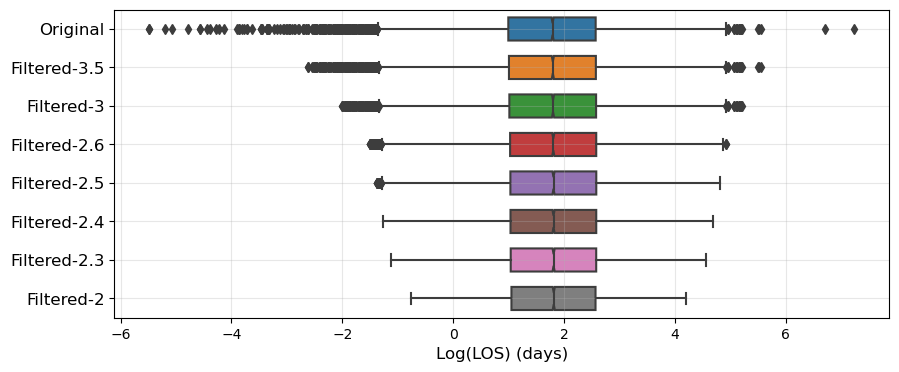

In [249]:
# Combine the data into a single list

log_original_los = np.log(df_v2['LOS'])
log_filtered_los_2 = np.log(df_v2_filtered_2['LOS'])
log_filtered_los_23 = np.log(df_v2_filtered_23['LOS'])
log_filtered_los_24 = np.log(df_v2_filtered_24['LOS'])
log_filtered_los_25 = np.log(df_v2_filtered_25['LOS'])
log_filtered_los_26 = np.log(df_v2_filtered_26['LOS'])
log_filtered_los_3 = np.log(df_v2_filtered_3['LOS'])
log_filtered_los_35 = np.log(df_v2_filtered_35['LOS'])
combined_data = [log_original_los, log_filtered_los_35, log_filtered_los_3, log_filtered_los_26, log_filtered_los_25, log_filtered_los_24, log_filtered_los_23, log_filtered_los_2]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Plot the box plots
sb.boxplot(data=combined_data, orient='h', notch = True, width=0.6, ax=ax)

# Set the labels and title
ax.set_yticklabels(['Original', 'Filtered-3.5','Filtered-3', 'Filtered-2.6', 'Filtered-2.5', 'Filtered-2.4', 'Filtered-2.3','Filtered-2'], fontsize=12)
ax.set_xlabel('Log(LOS) (days)', fontsize=12)

# adding horizontal grid lines
plt.grid(True, alpha=0.3)

#ax.set_xlim(40, 300)


# Save the plot as an image (optional)
plt.savefig('Images/los_outiliers_box.png', bbox_inches='tight', dpi=300)


# Show the plot
plt.show()

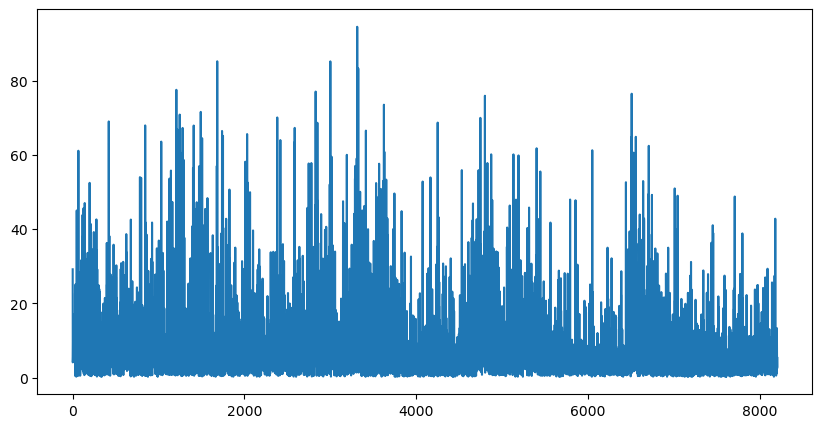

In [286]:
plt.figure(figsize=(10,5))
plt.plot(df_v2_filtered['LOS'])

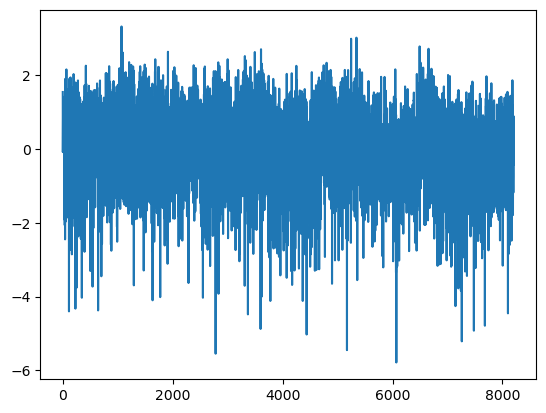

In [287]:
plt.plot(stats.zscore(np.log(df_v2['LOS'])))

#### ------------------------------------------ SEGMENTATION

In [259]:
"""
    Only espisodes with patient diagnosed with pneumonia at Admission
"""
def OnlyPneuAdmission(epis_frame, inf_frame):
    admiss_pneu_eps = list(inf_frame['EpisodioKey'])
    admiss_pneu_eps_index = [x-1 for x in admiss_pneu_eps]
    admiss_pneu_eps_index = list(dict.fromkeys(admiss_pneu_eps_index))  # remove duplicates
    epis_frame = epis_frame.iloc[admiss_pneu_eps_index]
    return epis_frame

In [262]:
#df = OnlyPneuAdmission(df, df_infections_pneu)

#df = df[ df['DoenteIdadeEmAnos'] > 18]

#df = df[ df['Key'] <  15348]  # Até Fev, 2020 (remover possibilidades de doentes covid)
#df = df[ df['SAPSCompleto'] == -1]
#df = df.reset_index()
#df.shape

In [472]:
"""
    Deal with Hospital code 21 -> No drugs prescriptions
s"""
df_w_drugs = df_v2_filtered[ df_v2_filtered['HospitalCodigo_21'] == 0]
df_wo_drugs = df_v2_filtered[ df_v2_filtered['HospitalCodigo_21'] == 1]

#df_w_drugs = df_v2_filtered[ df_v2_filtered['HospitalCodigo'] != 21]
#df_wo_drugs = df_v2_filtered[ df_v2_filtered['HospitalCodigo'] == 21]

print(df_w_drugs.shape)
print(df_wo_drugs.shape)
df_clean = df_w_drugs
#df_clean = df_v2_filtered

(5125, 227)
(1267, 227)


In [320]:
df_clean.head()

LOS  DoenteIdadeEmAnos  SAPSScore  Traqueostomia  TempoAteAdmissaoUni  \
0  29.19444                 66         73              1             2.008333   
1   4.08611                 71         70              0             7.168750   
2   4.56597                 54         61              0             0.000000   
3   5.58819                 61         44              0             1.684028   
4   9.47083                 73         63              1             0.121528   

   Unique_Hosp_per_Patient  Unique_patient_per_Hosp  \
0                        1                      599   
1                        1                      599   
2                        1                      599   
3                        1                      599   
4                        1                      599   

   Unique_patient_per_Admission  Unique_patient_per_Service  Corticosteróide  \
0                        3074.0                         222                0   
1                        3074.0                         222                1   
2                        3074.0                         222                1   
3                        3074.0                         239                0   
4                         168.0                         146                0   

   ...  ServicoId_79  ServicoId_80  ServicoId_84  ServicoId_85  ServicoId_88  \
0  ...             0             0             0             0             0   
1  ...             0             0             0             0             0   
2  ...             0             0             0             0             0   
3  ...             0             0             0             0             0   
4  ...             0             0             0             0             0   

   ServicoId_95  ServicoId_96  ServicoId_102  ServicoId_103  DoenteSexoId_2  
0             0             0              0              0               0  
1             0             0              0              0               0  
2             0             0              0              0               0  
3             0             0              0              0               0  
4             0             0              0              0               0  

[5 rows x 227 columns]

In [24]:
def correlation_table(data,target_column, _method):
    data = data.copy()
    #data_num = data.select_dtypes(include=['int','float'])
    corr_df = pd.DataFrame(data.corrwith(data[target_column], method=_method),columns=['Correlation'])
    corr_df['ABS Correlation'] = abs(corr_df['Correlation'])
    corr_df.sort_values(by=['ABS Correlation'], ascending=False, inplace=True)
    return corr_df

In [473]:
_method_corr = 'pearson'   # {pearson, kendall, spearman}
corr_df = correlation_table(df_clean, 'LOS', _method_corr)
pd.set_option('display.max_rows', None)
corr_df

Correlation  \
LOS                                                    1.000000   
DuracaoPrescricoes                                     0.623250   
Traqueostomia                                          0.515648   
NumeroDiagn                                            0.326796   
VMI                                                    0.303806   
Tubo Orotraqueal                                       0.237980   
SAPSFiO2                                               0.233221   
NumPrescricoes                                         0.204799   
Relaxante muscular                                     0.204162   
ServicoId_88                                          -0.191718   
Antivírico                                             0.186099   
Opiáceo                                                0.173751   
Vasopressor                                            0.172465   
Cateter venoso periférico                             -0.167346   
Cateter venoso central                                 0.163767   
Psicofármaco                                           0.160883   
HospitalRegiaoId_19                                    0.152513   
HospitalCodigo_8                                      -0.146484   
Antimalárico                                           0.145590   
Unique_patient_per_Hosp                               -0.140562   
Cateter arterial                                       0.132592   
Sonda nasogástrica                                     0.123268   
SAPSPaoFio                                            -0.123042   
PosicaoProne                                           0.120572   
ServicoId_74                                          -0.109836   
HospitalCodigo_25                                     -0.108650   
HospitalCodigo_6                                       0.104792   
ServicoId_33                                           0.104792   
Máscara facial simples                                -0.103828   
PaO2_max                                               0.097868   
pH_min                                                -0.097785   
Cânula nasal                                          -0.093450   
PaO2_avg                                               0.088429   
PaCO2_max                                              0.087647   
HospitalCodigo_13                                     -0.087481   
ServicoId_30                                           0.086002   
HospitalCodigo_4                                       0.086002   
SaO2_max                                               0.085121   
Unique_patient_per_Service                            -0.084513   
PIC intraventricular                                   0.084227   
ServicoId_59                                           0.083370   
pH_avg                                                -0.082989   
ServicoId_37                                           0.080494   
HospitalCodigo_14                                      0.080494   
GlasgowScoreMin                                       -0.080189   
ServicoId_78                                           0.076751   
HospitalCodigo_19                                      0.076751   
Sonda vesical                                          0.073010   
DispositivosNum                                        0.072709   
ServicoId_77                                          -0.069945   
Antibiótico                                            0.069549   
TempoAteAdmissaoUni                                    0.068663   
TipoProvenienciaId_6                                   0.067446   
FR_max                                                -0.067308   
HospitalCodigo_31                                      0.067255   
ShockSepsis                                            0.066971   
SAPSScore                                              0.066203   
HospitalCodigo_30                                      0.065169   
ServicoId_69                                           0.065022   
ServicoId_79                    

In [474]:
"""
    Filtering variables
"""

df_final = df_clean
print(df_final.shape)

limit = 0.1
for i in range(corr_df.shape[0]):
    if corr_df['ABS Correlation'][i] < limit or math.isnan(corr_df['ABS Correlation'][i]):
        df_final = df_final.drop(corr_df.iloc[i].name, axis=1)
print(df_final.shape)

(5125, 227)
(5125, 29)


In [95]:
# Remove rows with missing values
#df_final.drop('DuracaoPrescricoes',axis=1, inplace=True)
df_final.head().T

0        1        2        3        4
LOS                        29.19444  4.08611  4.56597  5.58819  9.47083
HospitalRegiaoId                  3        3        3        3        3
ServicoId                         3        3        3        1        2
TipoAdmissaoId                  5.0      5.0      5.0      5.0     16.0
Traqueostomia                     1        0        0        0        1
Antimalárico                      0        0        0        0        0
Antivírico                        0        0        0        0        0
Vasopressor                       1        1        1        0        1
Psicofármaco                      0        0        1        0        0
Opiáceo                           1        1        1        2        0
Relaxante muscular                0        0        0        1        0
NumPrescricoes                    6        6        6        4        2
DuracaoPrescricoes               30       14       13        8        5
VMI                               1        1        1        1        1
NumeroDiagn                       5        5        2        9        5
PosicaoProne                      0        0        0        0        0
SAPSFiO2                        0.3      0.8      0.4     0.35      0.5
SAPSPaoFio                      173       82      162      200      214
Cateter venoso periférico         1        1        1        1        0
Sonda nasogástrica                1        1        1        0        1
Cateter arterial                  1        1        1        1        1
Cateter venoso central            1        1        1        1        1
Tubo Orotraqueal                  1        1        1        1        1
Máscara facial simples            0        0        0        0        0
Cânula nasal                      0        0        0        0        0

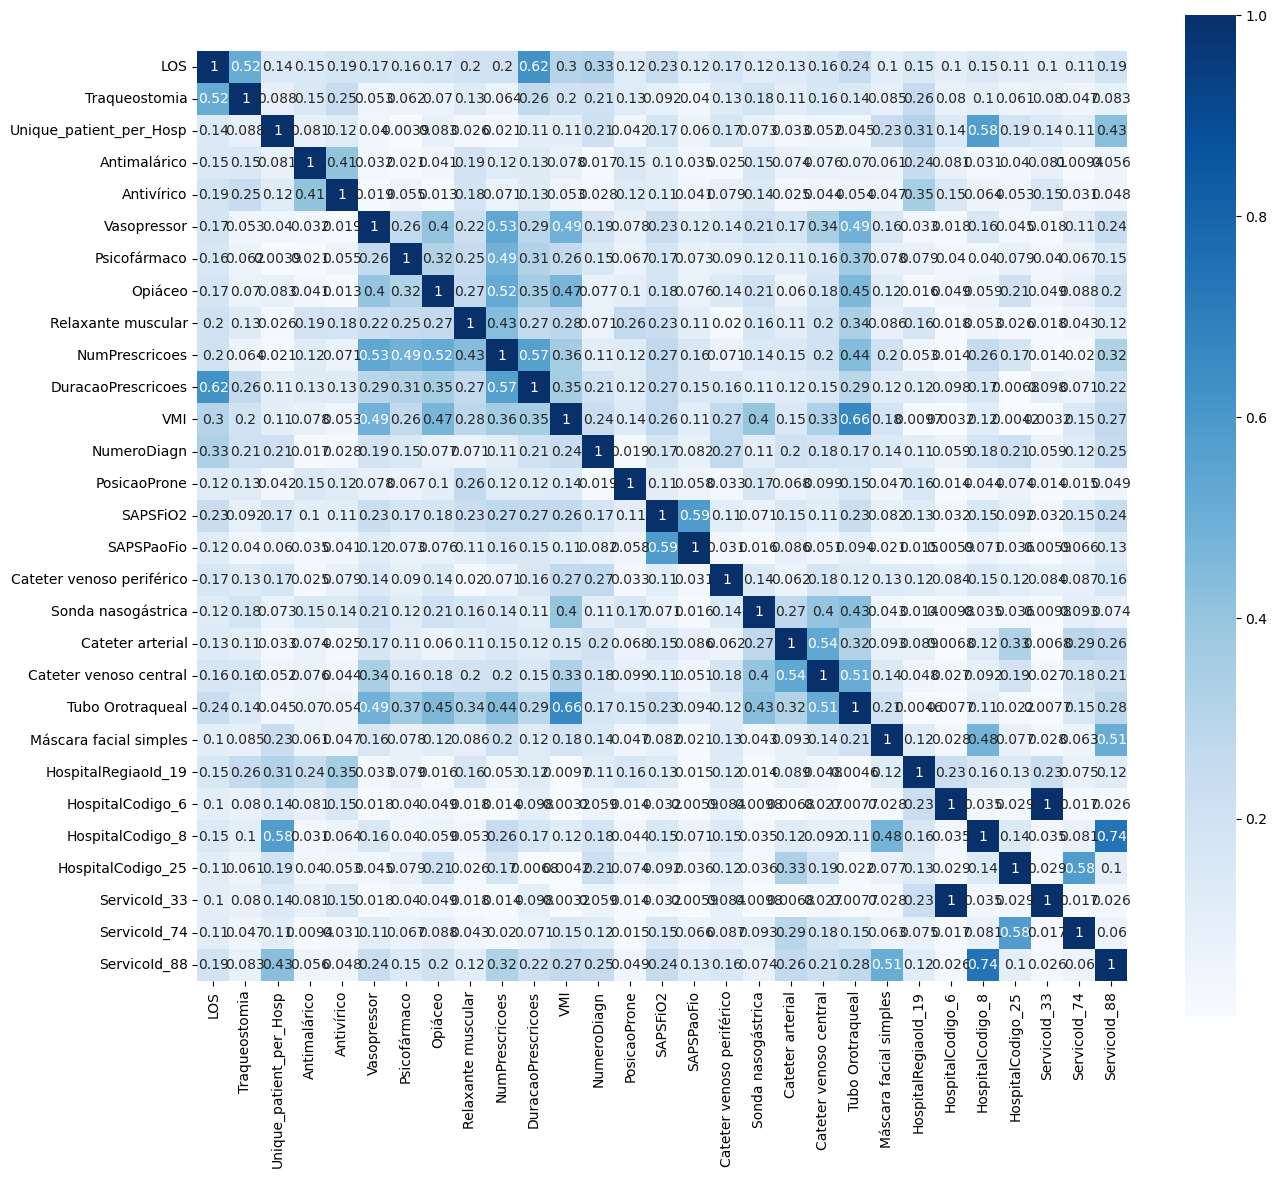

In [475]:
#Using Pearson Correlation
plt.figure(figsize=(15,13))
cor = abs(df_final.corr())
sb.heatmap(cor,vmax=1,square=True,annot=True, cmap='Blues')
plt.show()

In [476]:
# Variables with boxcox
#fea_to_drop = ['SAPSPaoFio', 'HospitalCodigo_4', 'HospitalCodigo_8', 'SAPSDoencasCronicas_Unknown', 'PaO2_avg', 'SaO2_max']
# Variables without boxcox
fea_to_drop = ['SAPSDoencasCronicas_Unknown', 'PaO2_max', 'ServicoId_88']
for fea in fea_to_drop:
    if fea in df_final.columns:
        df_final = df_final.drop(fea, axis=1)

In [477]:
df_final.columns

Index(['LOS', 'Traqueostomia', 'Unique_patient_per_Hosp', 'Antimalárico',
       'Antivírico', 'Vasopressor', 'Psicofármaco', 'Opiáceo',
       'Relaxante muscular', 'NumPrescricoes', 'DuracaoPrescricoes', 'VMI',
       'NumeroDiagn', 'PosicaoProne', 'SAPSFiO2', 'SAPSPaoFio',
       'Cateter venoso periférico', 'Sonda nasogástrica', 'Cateter arterial',
       'Cateter venoso central', 'Tubo Orotraqueal', 'Máscara facial simples',
       'HospitalRegiaoId_19', 'HospitalCodigo_6', 'HospitalCodigo_8',
       'HospitalCodigo_25', 'ServicoId_33', 'ServicoId_74'],
      dtype='object')

### Save Data Frame to Excel

In [429]:
# Save the DataFrame to an Excel file
_name_file = 'DataFrames/allVars_SAPSComp_withCorr_woutBoxCoxinallnumericvars_woutWins_los2.4_' + str(df_final.shape[0]) + '_' + str(df_final.shape[1]) + '.xlsx'
df_final.to_excel(_name_file, index=False)

In [25]:

# Calculate the mean
los = df_final['LOS']
mean_los = np.mean(los)

# Calculate the weights based on the distance to the mean
mean_weights = 1 / np.abs(los - mean_los)
# Normalize the weights
mean_weights /= np.sum(mean_weights)
# Calculate the weighted mean
weighted_mean = np.average(los, weights=mean_weights)
print("Weighted Mean: ", weighted_mean)

# Calculate the weighted variance
weighted_variance = np.average((los - weighted_mean)**2, weights=mean_weights)
print("Weighted Variance: ", weighted_variance)

var_los = np.var(los)
print("LOS Mean: ",mean_los, "\nLOS Variance: ", var_los)
# ---------------------------------------------------------------------------------

alpha_gamma = (mean_los**2) / var_los
beta_gamma = var_los / mean_los
theta_gamma = 1 / beta_gamma

print("Alpha gamma: ",alpha_gamma, "\nBeta gamma: ", beta_gamma, "\nTheta gamma: ", theta_gamma)

Weighted Mean:  7.739272039600801
Weighted Variance:  9.221587694204269
LOS Mean:  8.2633841472172 
LOS Variance:  90.13529597055972
Alpha gamma:  0.7575669090473005 
Beta gamma:  10.907794477994095 
Theta gamma:  0.09167756158382409


0.9136069912302544
0.24999999999999997
1.6864221947876592


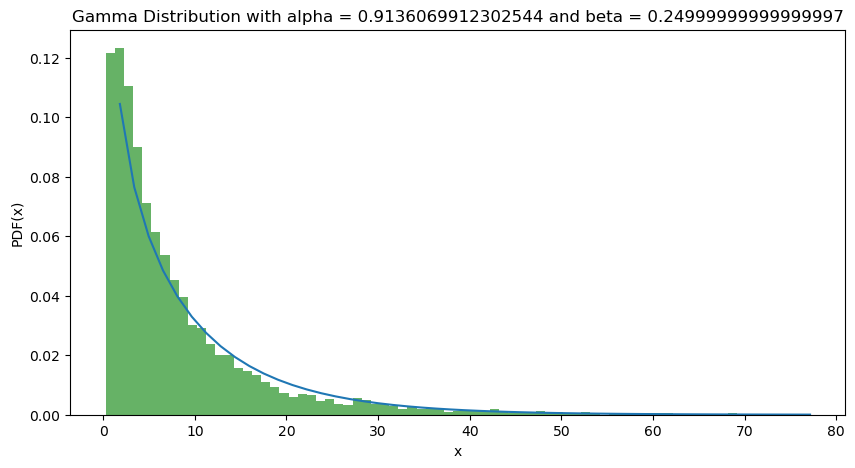

In [48]:
#_los = df_final['LOS'] - min(df_final['LOS']) + np.finfo(float).eps

los = df_final['LOS']
ag,bg,cg = stats.gamma.fit(los)  
print(ag)
print(bg)
print(cg)
"""
"""
plt.figure(figsize=(10,5))
# Create 100 bins with existing data.
xx = np.linspace(np.min(los), np.max(los))
# Calculate the probability density function (PDF) of the gamma distribution for the range of x values

pdf = stats.gamma.pdf(xx, alpha_gamma, min(los), scale=beta_gamma)

# Plot the PDF of the gamma distribution
plt.hist(los, bins=int(max(los)), alpha=0.6, color='g', density=True)
plt.plot(xx, pdf)
#plt.ylim(0, 0.15)
plt.xlabel('x')
plt.ylabel('PDF(x)')
plt.title('Gamma Distribution with alpha = {} and beta = {}'.format(ag, bg))
plt.show()

In [166]:
# NORM
plt.figure(figsize=(10,5))
los = df_final['LOS']
mean_fit, std_fit = stats.norm.fit(los)
print(mean_fit)
print(std_fit)

xx = np.linspace(np.min(los), np.max(los))
plt.hist(los, bins='sturges', density=True)
plt.plot(xx, stats.norm.pdf(xx, mean_fit, std_fit))
plt.show()

8.303276638159835
10.332349168912065


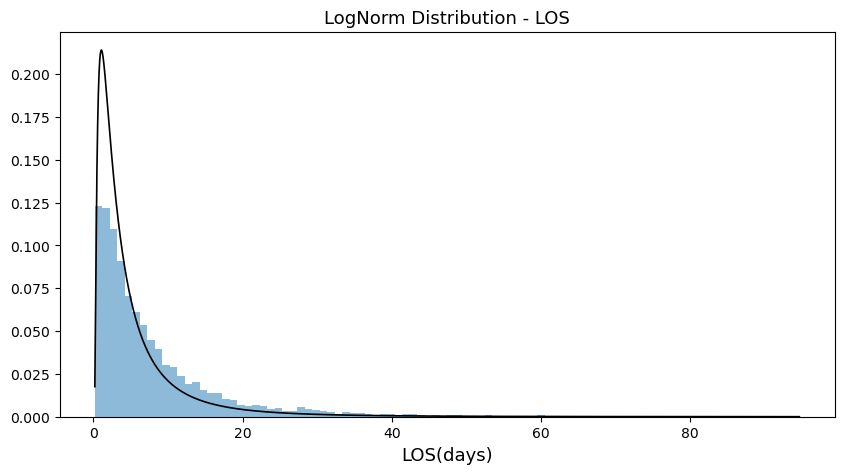

In [296]:
# Log Norm
plt.figure(figsize=(10,5))
#los_1 = los + 1
los = df_final['LOS']
shape_ln, loc_ln, scale_ln = stats.lognorm.fit(los)

# plot the histogram of the data and the fitted distribution
plt.hist(los, bins=int(los.max()), density=True, alpha=0.5,
                           cumulative=False)
x = np.linspace(los.min(), los.max(),3000)
pdf = stats.lognorm.pdf(x, shape_ln, loc_ln, scale_ln)
#plt.plot(max(los_1),pdf_1, '*')
#plt.xlim(0, 70)
#plt.xlim(0,100)
plt.plot(x, pdf, 'k-', linewidth=1.2)
plt.xlabel('LOS(days)', fontsize=13)
plt.title('LogNorm Distribution - LOS', fontsize=13)

# Save the plot as an image (optional)
plt.savefig('Images/los_lognormal.png', bbox_inches='tight', dpi=300)

plt.show()

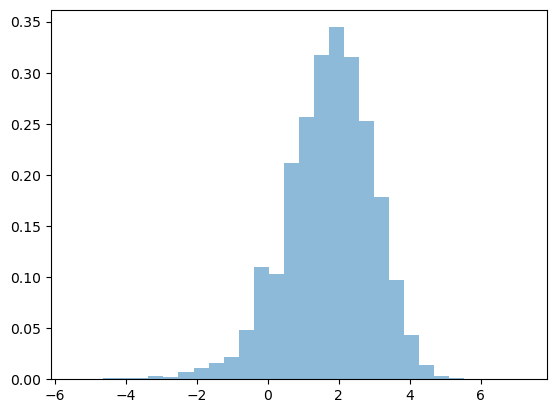

In [430]:
# plot the histogram of the data and the fitted distribution
plt.hist(np.log(los), bins=30, density=True, alpha=0.5,
                           cumulative=False)
plt.show()

Shape parameter (k):  0.8711190605477839
Scale parameter (lambda):  6.600630588530752


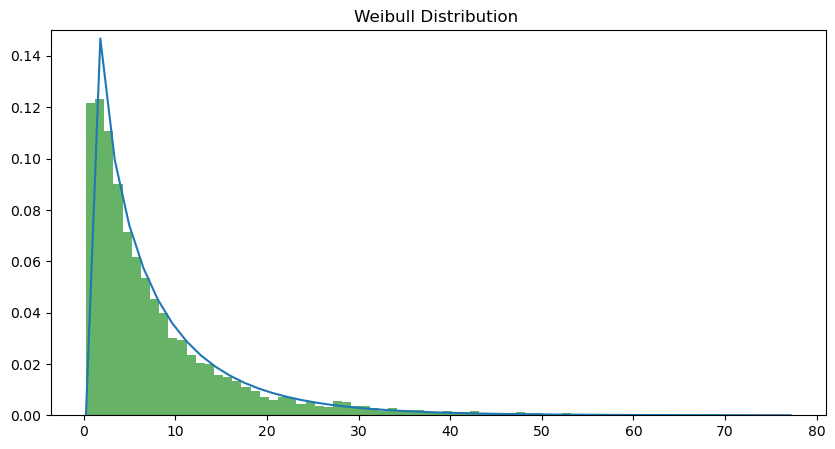

In [94]:
# Estimate the shape and scale parameters of the Weibull distribution
los = df_final['LOS']
shape_w, loc_w, scale_w = stats.weibull_min.fit(los, floc=1)
plt.figure(figsize=(10,5))
print("Shape parameter (k): ", shape_w)
print("Scale parameter (lambda): ", scale_w)
# Create 100 bins with existing data.
xx = np.linspace(np.min(los), np.max(los))
# Calculate the probability density function (PDF) of the gamma distribution for the range of x values

pdf = stats.weibull_min.pdf(xx, shape_w,loc_w, scale_w)

# Plot the PDF of the gamma distribution
plt.hist(los, bins=int(max(los)), alpha=0.6, color='g', density=True)
plt.plot(xx, pdf)
plt.ylim(0, 0.15)
plt.title('Weibull Distribution ')
plt.show()

# Models validation

### Read a dataset

In [115]:
# MORE VARIABLES
df_final = pd.read_excel('DataFrames/allVars_withCorr_woutBoxCoxinallnumericvars_wins_los2.4_15046_25.xlsx')
print("Number of Columns: ",df_final.shape[1])
print("Number of Rows: ",df_final.shape[0])

Number of Columns:  25
Number of Rows:  15046


In [15]:
# SEGMENTATION
df_final = pd.read_excel('DataFrames/allVars_withCorr_woutBoxCoxinallnumericvars_wins_los2.46684_32.xlsx')
print("Number of Columns: ",df_final.shape[1])
print("Number of Rows: ",df_final.shape[0])

Number of Columns:  32
Number of Rows:  6684


In [165]:
# BOX-COX TRANSFORMATION
df_final = pd.read_excel('DataFrames/allVars_withCorr_wBoxCoxinallnumericvars_wins_los2.46684_34.xlsx')
print("Number of Columns: ",df_final.shape[1])
print("Number of Rows: ",df_final.shape[0])

Number of Columns:  34
Number of Rows:  6684


In [193]:
diff(df_final, df_final_2)

Columns present only in DataFrame 1: {'ServicoId_59', 'ServicoId_53', 'SAPSDoencasCronicas_4.0', 'SAPSScore', 'Sonda vesical', 'Unique_patient_per_Service', 'DispositivosNum', 'Unique_patient_per_Hosp', 'ServicoId_30'}

Columns present only in DataFrame 2: {'pH_min', 'Máscara facial simples', 'HospitalCodigo_8', 'Cânula nasal', 'PaCO2_max', 'ServicoId_33', 'SAPSPaoFio', 'HospitalCodigo_6'}


In [16]:
"""
    Get X and y                
"""

#df_v2 = df_v2.sample(frac=0.4)
#df_final = df_final.drop('TempoInternamentoEmDias', axis=1)
def getXY(dataframe):
    
    y = dataframe['LOS']
    X = dataframe.drop('LOS', axis=1)

    print(f"Features: {len(X.columns)}")
    print(f"Examples: {len(X)}")
    return X,y
X,y = getXY(df_final)

Features: 31
Examples: 6684


In [110]:
"""
    Pneumonio admission only - examples: 5573
    All - examples: 10502
"""

'\n    Pneumonio admission only - examples: 5573\n    All - examples: 10502\n'

# K-Means - Deep data segmentation

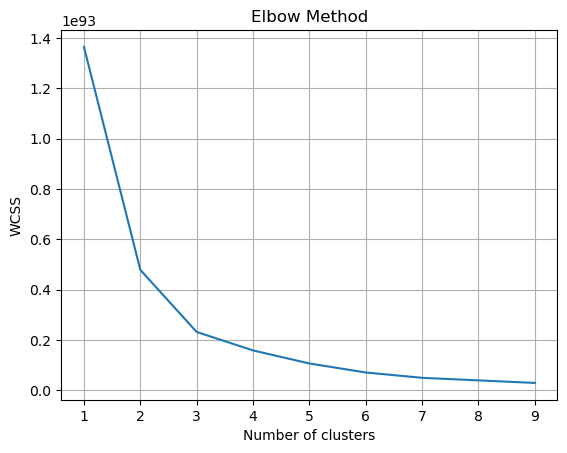

In [124]:
"""
    	ELBOW Method
"""
wcss = []
iter = 10
for i in range(1, iter):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, iter), wcss)
plt.grid()
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

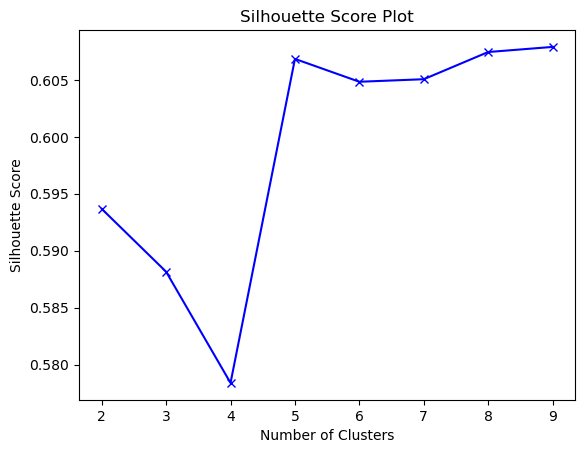

In [125]:
"""
    	Silhouette Method
"""
from sklearn.metrics import silhouette_score

# create list of silhouette scores for different number of clusters
sil_scores = []
iter = 10
for k in range(2, iter):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    sil_scores.append(silhouette_score(X, kmeans.labels_))

# plot the silhouette scores
plt.plot(range(2, iter), sil_scores, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot')
plt.show()

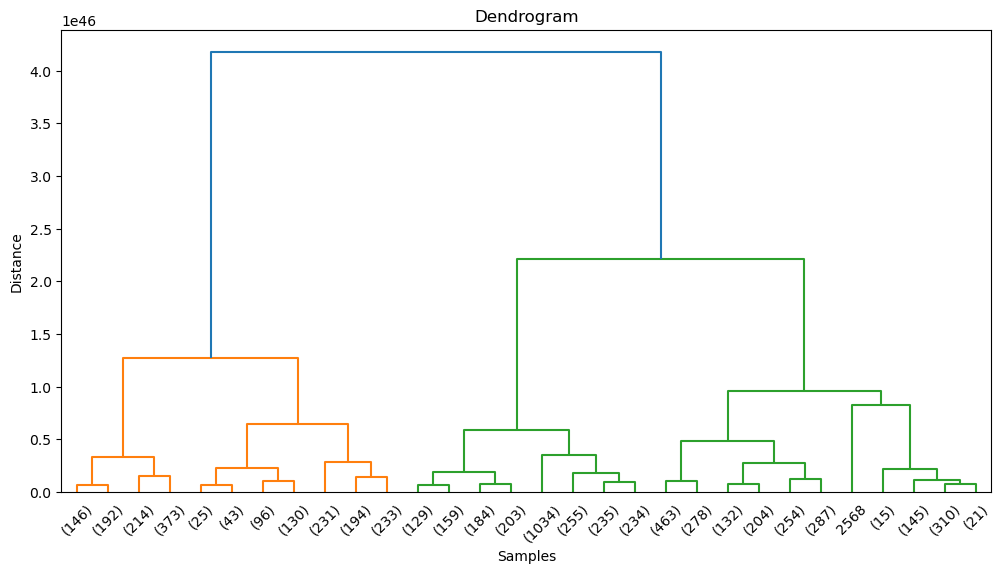

In [153]:
"""
    Hierarchical clustering
"""
from scipy.cluster.hierarchy import dendrogram, linkage

# perform hierarchical clustering
Z = linkage(X, 'ward')

# plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode='lastp', p=30)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()

In [311]:
""""
    Perform K-Means
"""
def runKMeans(X, k):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    #df_final['cluster'] = pred_y
    centroids = kmeans.cluster_centers_
    kmeans_labels = kmeans.labels_

    return kmeans, centroids, kmeans_labels

In [312]:
k = 2
kmeans, centroids, kmeans_labels = runKMeans(X, k)

In [313]:
def getSeparateClusterData(X, y, kmeans_labels):
    # Separate the data into separate DataFrames based on their cluster label
    #df_cluster0 = df_final.loc[kmeans_labels == 0]
    #df_cluster1 = df_final.loc[kmeans_labels == 1] 
    #df_cluster2 = df.loc[kmeans_labels == 2]

    X_0_sca = X.loc[kmeans_labels == 0]
    X_1_sca = X.loc[kmeans_labels == 1]

    y_0 = y.loc[kmeans_labels == 0]
    y_1 = y.loc[kmeans_labels == 1]

    X_list_sca = [X_0_sca, X_1_sca]
    y_list = [y_0, y_1]

    # Print the size of each DataFrame
    print("Cluster 0 size:", len(X_0_sca))
    print("Cluster 1 size:", len(X_1_sca))
    #print("Cluster 2 size:", len(df_cluster2))

    return X_list_sca, y_list

In [314]:
X_list, y_list = getSeparateClusterData(X, y, kmeans_labels)

Cluster 0 size: 2403
Cluster 1 size: 2732


In [324]:
X_list_sca = [Scaler(X_list[0]), Scaler(X_list[1])]

In [325]:
X_list_sca[0].head()

Traqueostomia  Unique_patient_per_Hosp  Antimalárico  Antivírico  \
0       4.460454                 0.427994      -0.12863   -0.045663   
1      -0.224192                 0.427994      -0.12863   -0.045663   
2      -0.224192                 0.427994      -0.12863   -0.045663   
3      -0.224192                 0.427994      -0.12863   -0.045663   
4       4.460454                 0.427994      -0.12863   -0.045663   

   Vasopressor  Psicofármaco   Opiáceo  Relaxante muscular  NumPrescricoes  \
0     0.855125     -0.683730  0.760003           -0.370307        0.325974   
1     0.855125     -0.683730  0.760003           -0.370307        0.325974   
2     0.855125      0.768969  0.760003           -0.370307        0.325974   
3    -0.814141     -0.683730  2.247206            1.670629       -0.293738   
4     0.855125     -0.683730 -0.727201           -0.370307       -0.913449   

   DuracaoPrescricoes  ...  NumeroDiagn  SAPSFiO2  SAPSPaoFio  \
0            0.730256  ...     0.861764 -1.164015    0.046718   
1           -0.137010  ...     0.861764  0.854406   -0.741678   
2           -0.191214  ...    -0.476550 -0.760330   -0.048582   
3           -0.462235  ...     2.646182 -0.962173    0.280638   
4           -0.624848  ...     0.861764 -0.356646    0.401930   

   Cateter venoso periférico  Sonda nasogástrica  Cateter arterial  \
0                   0.533235            1.536502          0.621782   
1                   0.533235            1.536502          0.621782   
2                   0.533235            1.536502          0.621782   
3                   0.533235           -0.650829          0.621782   
4                  -1.875345            1.536502          0.621782   

   Cateter venoso central  Tubo Orotraqueal  HospitalRegiaoId_1  \
0                0.889163          0.968454           -1.042952   
1                0.889163          0.968454           -1.042952   
2                0.889163          0.968454           -1.042952   
3                0.889163          0.968454           -1.042952   
4                0.889163          0.968454           -1.042952   

   HospitalRegiaoId_19  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 21 columns]

In [316]:
"""
    Get the distance between a point and cluster center
"""

def getClusterWeights(centroids, point):
    # Calculate the distance between the cluster mean and the point
    distance = []
    weights = []
    for center in centroids:
        distance = euclidean(center, point)
        weight = 1 / distance
        weights.append(weight)

    weight_norm = [wei / sum(weights) for wei in weights]
    return weight_norm

In [317]:
def getAVGPrediction(y_point_pred_list, weights):
    y_pred_final = 0
    for i in range(len(y_point_pred_list)):
        y_pred_final += y_point_pred_list[i] * weights[i]
    return y_pred_final

In [318]:
def runClusterPredicion(models_list, centroids, X_test, avg_cluster_flag):
    y_pred_list = []
    for i in range(len(X_test)):
        X_point = np.array(X_test.iloc[i]).reshape(1, -1)
        weights = getClusterWeights(centroids, X_point)

        if avg_cluster_flag:
            y_point_pred_list = []
            for m in range(len(models_list)):
                y_point_pred = models_list[m].predict(X_point)
                y_point_pred_list.append(y_point_pred)

            y_pred_list.append(getAVGPrediction(y_point_pred_list, weights))
        else:
            min_index_center = weights.index(max(weights))
            y_point_pred = models_list[min_index_center].predict(X_point)
            y_pred_list.append(y_point_pred)
    
    return y_pred_list

C:\Users\joaoc\AppData\Local\Temp\ipykernel_25404\1244598653.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_25404\1244598653.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_25404\1244598653.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_25404\1244598653.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)


"ax3.hist(y_3, alpha=0.5,bins=int(max(y_3)), rwidth = 0.92)\nax3.set_title('Cluster 3', fontsize = 16)\n#ax3.set_ylim(0,350)\nax3.set_xlim(0,40)\nax3.set_xlabel('LOS(days)', fontsize = 15) \nax3.set_xticklabels(labels=ax3.get_xticklabels(), fontsize=12)\nax3.set_yticklabels(labels=ax3.get_yticklabels(), fontsize=12)"

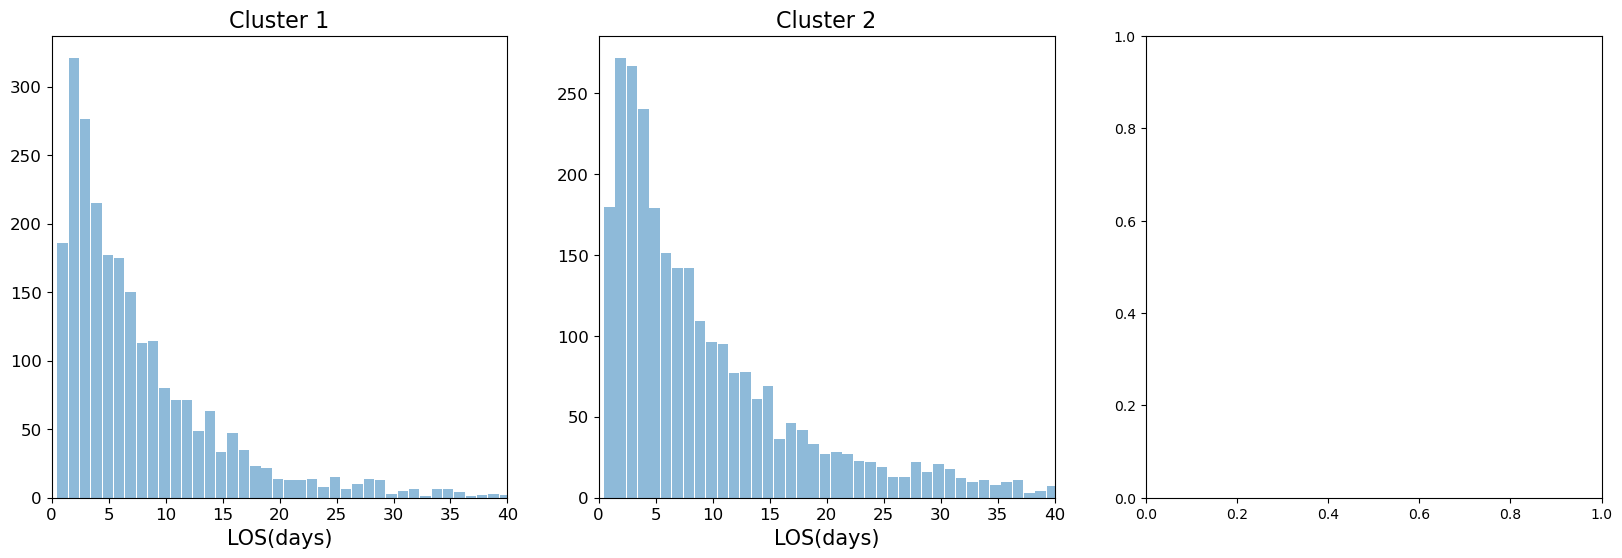

In [319]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(20, 6)
ax1.hist(y_list[0], alpha=0.5,bins=int(max(y_list[0])), rwidth = 0.92)
ax1.set_title('Cluster 1', fontsize = 16)
#ax1.set_ylim(0,350)
ax1.set_xlim(0,40)
ax1.set_xlabel('LOS(days)', fontsize = 15)   
ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)

ax2.hist(y_list[1], alpha=0.5,bins=int(max(y_list[1])), rwidth = 0.92)
ax2.set_title('Cluster 2', fontsize = 16)
#ax2.set_ylim(0,350)
ax2.set_xlim(0,40)
ax2.set_xlabel('LOS(days)', fontsize = 15) 
ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)

"""ax3.hist(y_3, alpha=0.5,bins=int(max(y_3)), rwidth = 0.92)
ax3.set_title('Cluster 3', fontsize = 16)
#ax3.set_ylim(0,350)
ax3.set_xlim(0,40)
ax3.set_xlabel('LOS(days)', fontsize = 15) 
ax3.set_xticklabels(labels=ax3.get_xticklabels(), fontsize=12)
ax3.set_yticklabels(labels=ax3.get_yticklabels(), fontsize=12)"""

# ------------------------

### GridSearchCV to get the best hyperparameters   |  Cross-validation with 10 folds   

In [4]:
cv_val = KFold(n_splits=10, shuffle=True, random_state=20)

In [19]:
"""
    Standard Scaler
"""

def Scaler(X, _type=2):
    if _type == 1:
        scaler = MinMaxScaler()
    elif _type == 2:
        scaler = StandardScaler()
    else:
        print("Choose type equals to 1 or 2 only!")
        return
    
    feature_sca = scaler.fit_transform(X)
    scaled_features_df = pd.DataFrame(feature_sca, index=X.index, columns=X.columns)
    return scaled_features_df

# Type scaler = 1 --> MinMax 
# Type scaler = 2 --> Standard 

_type_sca = 2
X_sca = Scaler(X, _type_sca)
#X_train_sca = Scaler(X_train, _type_sca)
#X_test_sca = Scaler(X_test, _type_sca)

In [201]:
# Split
X_train_sca, X_test_sca, y_train, y_test = train_test_split(X_sca, y, test_size = 0.2, random_state=4)
print("Examples to train: {}".format(len(X_train_sca)))

Examples to train: 5347


In [13]:
"""
    Permutation importance
"""
def get_permutation_importance(X, y, model,colnames, num_repeats):
    result = permutation_importance(model, X, y, n_repeats=num_repeats,
                                random_state=7, scoring='neg_mean_squared_error')

    mean_result = [np.mean(feat_list) for feat_list in result.get('importances')]
    
    # permutational importance results
    result_df = pd.DataFrame(colnames,  columns=['Feature'])
    result_df['permutation_importance'] = mean_result
    
    return result_df

## Deep Learning model

In [14]:
def getTolerance(y_pred, y_test, precision_tolerance = 3):
    
    is_within_tolerance = abs(y_pred - y_test) <= precision_tolerance
    percentage_within_tolerance = sum(is_within_tolerance) / len(y_test) * 100
    return percentage_within_tolerance

In [205]:
optimal_epochs = 50
optimal_batch_size = 30
optimal_optimizer = 'Adamax'
optimal_learn_rate = 0.0001
optimal_init_mode = 'uniform'
optimal_activation = 'softplus'
optimal_weight_constraint = 1.0
optimal_dropout_rate = 0.2
optimal_nodes = 340
optimal_layers = 6

In [67]:
"""
    Tune Batch Size and Number of Epochs
"""
def dl_model():       #Best: {'batch_size': 10, 'epochs': 50}
    # create model
    model = Sequential()
    model.add(Dense(optimal_nodes, input_dim=len(X_train_sca.columns), activation=optimal_activation))
    model.add(Dense(optimal_nodes, activation=optimal_activation))
    model.add(Dense(optimal_nodes, activation=optimal_activation))
    #model.add(Dense(60, activation='relu'))
    # Output layer
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimal_optimizer, metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
# define the grid search parameters
#batch_size = [5, 10, 20, 40, 60, 80, 100]
batch_size = [10, 20, 30, 35]
epochs = [50, 100, 150]
param_grid = dict(batch_size=batch_size, epochs=epochs)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')

grid_result = dl_grid.fit(X_train_sca, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

optimal_epochs = grid_result.best_params_['epochs']
optimal_batch_size = grid_result.best_params_['batch_size']

Best: -5.957649 using {'batch_size': 30, 'epochs': 50}


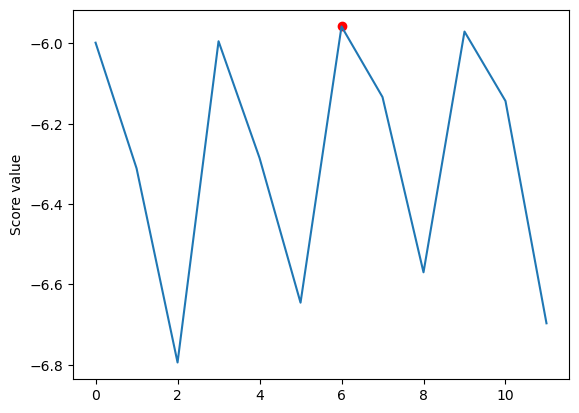

In [68]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

In [549]:
"""
    Tune the Training Optimization Algorithm     Best {'optimizer': 'Adam'}
"""
def dl_model():
    # create model
    model = Sequential()
    model.add(Dense(optimal_nodes, input_dim=len(X_train.columns), activation=optimal_activation))
    model.add(Dense(optimal_nodes, activation=optimal_activation))
    model.add(Dense(optimal_nodes, activation=optimal_activation))
    #model.add(Dense(60, activation='relu'))
    #model.add(Dense(60, activation='relu'))
    # Output layer
    model.add(Dense(1, activation='linear'))
    # return model without compile
    return model


# create model
model = KerasRegressor(model=dl_model, loss="mean_squared_error", epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')
grid_result = dl_grid.fit(X_train_sca, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

optimal_optimizer = grid_result.best_params_['optimizer']

C:\Users\joaoc\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [        nan -6.8812981  -6.83432278 -5.950166   -6.94911488]
  warnings.warn(


Best: -5.950166 using {'optimizer': 'Adamax'}


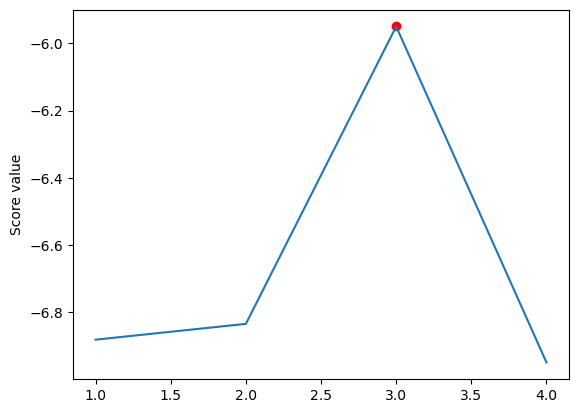

In [550]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

In [551]:
"""
    Tune the Training Learning Rate Algorithm     Best: -11.237630 using {'optimizer__learning_rate': 0.001
                                                                    , 'optimizer__momentum': 0.0}
"""
def dl_model():
    # create model
    model = Sequential()
    model.add(Dense(optimal_nodes, input_dim=len(X_train.columns), activation=optimal_activation))
    model.add(Dense(optimal_nodes, activation=optimal_activation))
    model.add(Dense(optimal_nodes, activation=optimal_activation))
    #model.add(Dense(60, activation='relu'))
    # Output layer
    model.add(Dense(1, activation='linear'))
    # return model without compile
    return model


# create model
model = KerasRegressor(model=dl_model, loss="mean_squared_error", epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
# define the grid search parameters
learn_rate = [0.0001, 0.0005, 0.001, 0.01, 0.1]
param_grid = dict(optimizer__learning_rate=learn_rate)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')
grid_result = dl_grid.fit(X_train_sca, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

optimal_learn_rate = grid_result.best_params_['optimizer__learning_rate']

Best: -5.886607 using {'optimizer__learning_rate': 0.0001}


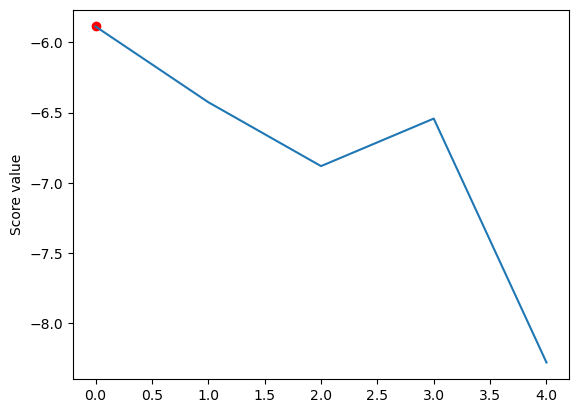

In [552]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

In [553]:
from keras.optimizers import Adamax
"""
    Tune the Training Weight Initialization Algorithm     Best: 
"""
def dl_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(optimal_nodes, input_dim=len(X_train.columns), kernel_initializer=init_mode, activation=optimal_activation))
    model.add(Dense(optimal_nodes, kernel_initializer=init_mode, activation=optimal_activation))
    model.add(Dense(optimal_nodes, kernel_initializer=init_mode, activation=optimal_activation))
    #model.add(Dense(60, kernel_initializer=init_mode, activation='relu'))
    # Output layer
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=Adamax(learning_rate=optimal_learn_rate), metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, loss="mean_squared_error", epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')
grid_result = dl_grid.fit(X_train_sca, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

optimal_init_mode = grid_result.best_params_['model__init_mode']

Best: -6.097335 using {'model__init_mode': 'uniform'}


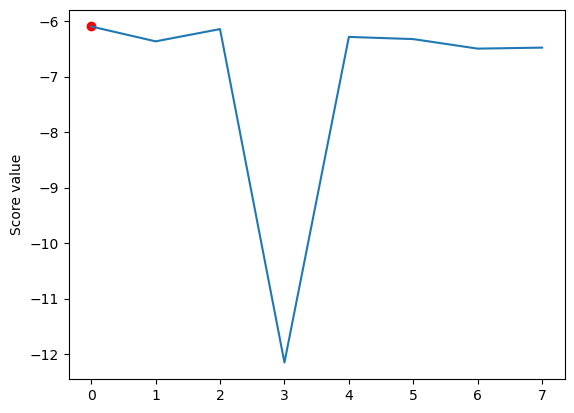

In [554]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

In [555]:
"""
    Tune the Neuron Activation Function     Best -11.584843 using {'model__activation': 'relu'}
"""
def dl_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(optimal_nodes, input_dim=len(X_train.columns), activation=activation))
    model.add(Dense(optimal_nodes, activation=activation))
    model.add(Dense(optimal_nodes, activation=activation))
    #model.add(Dense(25, activation=activation))
    
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=Adamax(learning_rate=optimal_learn_rate), metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
# define the grid search parameters
activation = ['softmax', 'softplus', 'relu', 'tanh', 'sigmoid', 'linear']
param_grid = dict(model__activation=activation)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')
grid_result = dl_grid.fit(X_train_sca, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

optimal_activation = grid_result.best_params_['model__activation']

Best: -6.301262 using {'model__activation': 'softplus'}


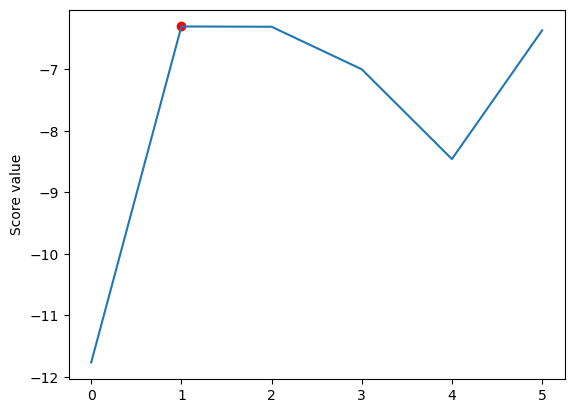

In [556]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

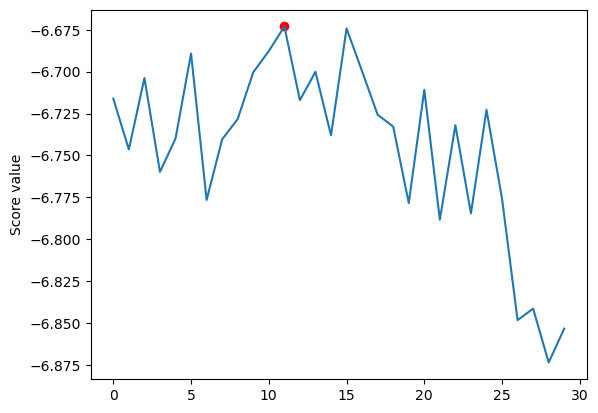

In [2612]:
scores_dl = list(dl_grid.cv_results_['mean_test_score'])
best_score_dl = dl_grid.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

Num Layers - 2.000000 : Best: -6.178667 using {'model__neurons': 380}


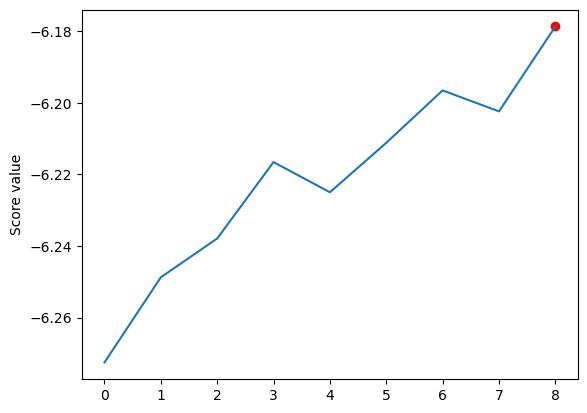

Num Layers - 3.000000 : Best: -6.189588 using {'model__neurons': 360}


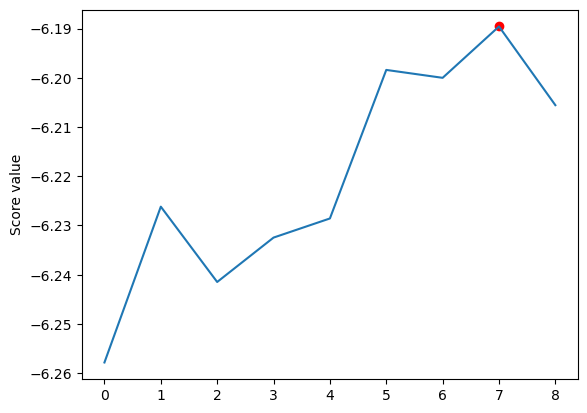

Num Layers - 4.000000 : Best: -6.149152 using {'model__neurons': 380}


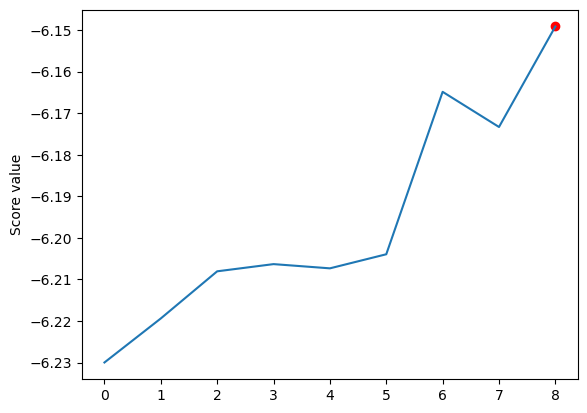

Num Layers - 5.000000 : Best: -6.151344 using {'model__neurons': 380}


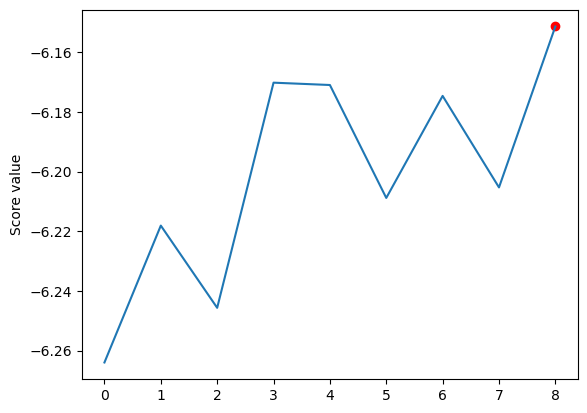

C:\Users\joaoc\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Num Layers - 6.000000 : Best: -6.173050 using {'model__neurons': 300}


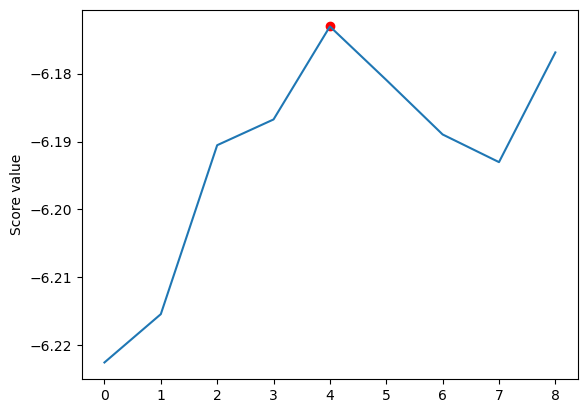

Num Layers - 7.000000 : Best: -6.160410 using {'model__neurons': 300}


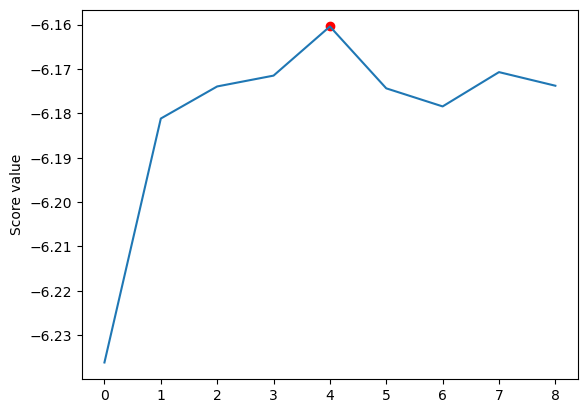

Wall time: 2h 26min 10s


In [64]:
%%time
"""
    Tune the Number of Neurons in the Hidden Layer     Best: 
                                                            -6.532943 2
                                                            -6.472611 3
                                                            -6.424632 4 using
                                                             -6.369923 5 using
                                                             -6.331362 6 using
                                                                                                         
"""

def create_model(neurons):
    # create model
    model = Sequential()
    # Input layer
    model.add(Dense(neurons, input_dim=len(X_train_sca.columns), activation=optimal_activation, kernel_initializer=optimal_init_mode))
    
    #model.add(Dropout(optimal_dropout_rate))
    for i in range(n_ley - 1):     # The first layer is already here
    
        model.add(Dense(neurons, activation=optimal_activation, kernel_initializer=optimal_init_mode))
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adamax(learning_rate=optimal_learn_rate), metrics=['mae'])
    return model

n_ley = 2
results = {}
for i in range(2,8):
    n_ley = i
    # create model
    model = KerasRegressor(model=create_model, epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
    # define the grid search parameters
    neurons = [220,240,260,280,300,320,340,360,380]
    param_grid = dict(model__neurons=neurons)
    grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')
    grid_result_dl = grid.fit(X_train_sca, y_train)
    print("Num Layers - %f : Best: %f using %s" % (n_ley, grid_result_dl.best_score_, grid_result_dl.best_params_))
    means = grid_result_dl.cv_results_['mean_test_score']
    stds = grid_result_dl.cv_results_['std_test_score']
    params = grid_result_dl.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    results[i] = (grid_result_dl.best_score_, grid_result_dl.best_params_, grid_result_dl.best_estimator_)
    scores_dl = list(grid_result_dl.cv_results_['mean_test_score'])
    best_score_dl = grid_result_dl.best_score_

    plt.plot(scores_dl) 
    plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
    plt.ylabel('Score value')
    plt.show()
        
sorted_results = dict(sorted(results.items(), key=lambda x: x[1][0]))
#best_dl_model = grid_result_dl.best_estimator_
#optimal_nodes = grid_result_dl.best_params_['model__neurons']

In [460]:
sorted_results

NameError: name 'sorted_results' is not defined

In [ ]:
Num Layers - 2.000000 : Best: -6.500077 using {'model__neurons': 340}
Num Layers - 3.000000 : Best: -6.444298 using {'model__neurons': 310}
Num Layers - 4.000000 : Best: -6.375586 using {'model__neurons': 340}
Num Layers - 5.000000 : Best: -6.333111 using {'model__neurons': 340}
Num Layers - 6.000000 : Best: -6.272316 using {'model__neurons': 340}
Num Layers - 7.000000 : Best: -6.297696 using {'model__neurons': 300}

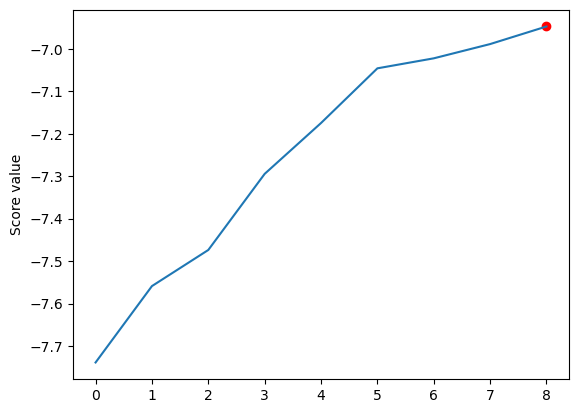

In [946]:
scores_dl = list(grid_result_dl.cv_results_['mean_test_score'])
best_score_dl = grid_result_dl.best_score_

plt.plot(scores_dl)
plt.scatter([scores_dl.index(best_score_dl)],[best_score_dl], color = 'red')
plt.ylabel('Score value')
plt.show()

In [216]:
optimal_layers = 6
optimal_nodes = 340

In [452]:
"""
    Tune the Training Dropout Regularization Algorithm     Best: 
"""
def dl_model(dropout_rate, weight_constraint):
    # create model
    model = Sequential()
    model.add(Dense(optimal_nodes, input_dim=len(X_train.columns), kernel_initializer=optimal_init_mode, activation=optimal_activation, kernel_constraint=MaxNorm(weight_constraint)))
    
    model.add(Dense(optimal_nodes, kernel_initializer=optimal_init_mode, activation=optimal_activation))
    model.add(Dropout(dropout_rate))
    for i in range(optimal_layers-2):
        model.add(Dense(optimal_nodes, kernel_initializer=optimal_init_mode, activation=optimal_activation)) 
    
    
    # Output layer
    model.add(Dense(1, kernel_initializer=optimal_init_mode, activation='linear'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer=Adamax(learning_rate=optimal_learn_rate), metrics=['mae'])
    return model


# create model
model = KerasRegressor(model=dl_model, loss="mean_squared_error", epochs=optimal_epochs, batch_size=optimal_batch_size, verbose=0)
# define the grid search parameters
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
dl_grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv_val, scoring='neg_root_mean_squared_error')
grid_result = dl_grid.fit(X_train_sca, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

optimal_dropout_rate = grid_result.best_params_['model__dropout_rate']
optimal_weight_constraint = grid_result.best_params_['model__weight_constraint']

KeyboardInterrupt: 

In [219]:
dl_best_params = {"optimizer": optimal_optimizer, "learn_rate": optimal_learn_rate, "init_mode": optimal_init_mode
                  , "activation": optimal_activation, "weight_constraint": optimal_weight_constraint
                  , "dropout_rate": optimal_dropout_rate, "nodes": optimal_nodes, "layers": optimal_layers}

print("Optimal epochs: ",optimal_epochs)
print("Optimal batch_size: ",optimal_batch_size)
print("Optimal optimizer: ",optimal_optimizer)
print("Optimal learn_rate: ",optimal_learn_rate)
print("Optimal init_mode: ",optimal_init_mode)
print("Optimal activation: ",optimal_activation)
print("Optimal weight_constraint: ",optimal_weight_constraint)
print("Optimal dropout_rate: ",optimal_dropout_rate)
print("Optimal nodes: ",optimal_nodes)
print("Optimal num layers: ",optimal_layers)

Optimal epochs:  150
Optimal batch_size:  30
Optimal optimizer:  Adamax
Optimal learn_rate:  0.0001
Optimal init_mode:  uniform
Optimal activation:  softplus
Optimal weight_constraint:  1.0
Optimal dropout_rate:  0.2
Optimal nodes:  340
Optimal num layers:  6


In [218]:
optimal_epochs = 150

#### Train DL

In [220]:
"""
    Define base model    -   This network configuration - best hyperparameters
""" 
from tensorflow.keras.optimizers import Adamax
#from tensorflow.keras.optimizers import RMSprop
def dl_optimal(X):
    # create model
    model = Sequential()
    
    model.add(Dense(optimal_nodes, input_dim=X.shape[1], kernel_initializer=optimal_init_mode, activation=optimal_activation))
    #model.add(Dropout(optimal_dropout_rate))
    for i in range(optimal_layers-1):
        model.add(Dense(optimal_nodes, kernel_initializer=optimal_init_mode, activation=optimal_activation)) 
    
    # Output layer
    model.add(Dense(1, activation='linear'))
    
    # Compile model
    model.compile(loss = 'mean_squared_error',optimizer = Adamax(learning_rate=optimal_learn_rate), metrics = ['mae'])
    return model

5


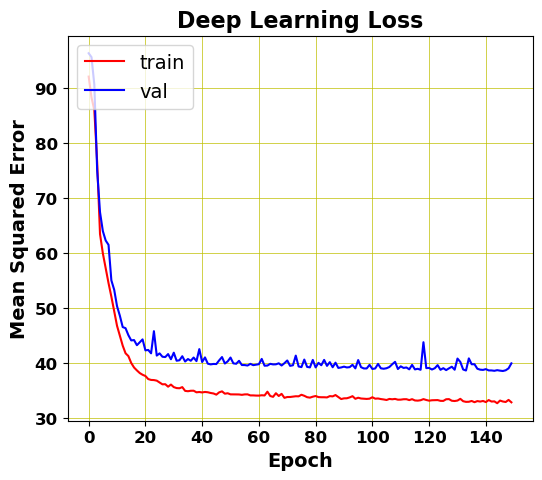

6


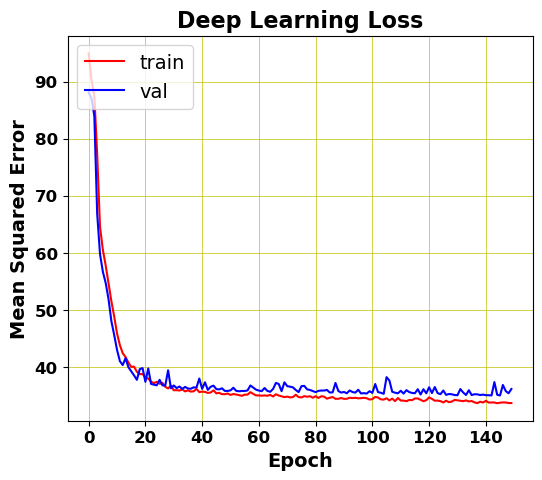

7


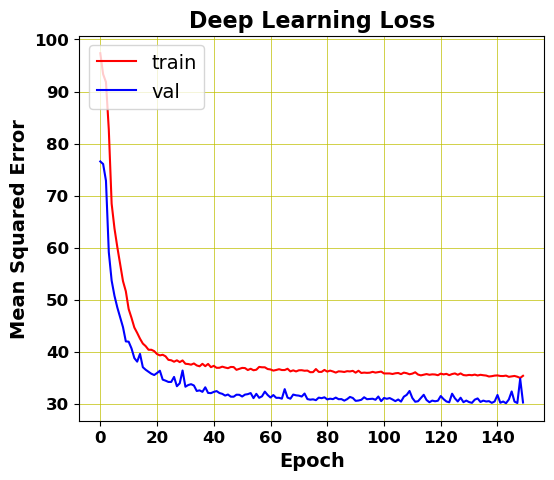

8


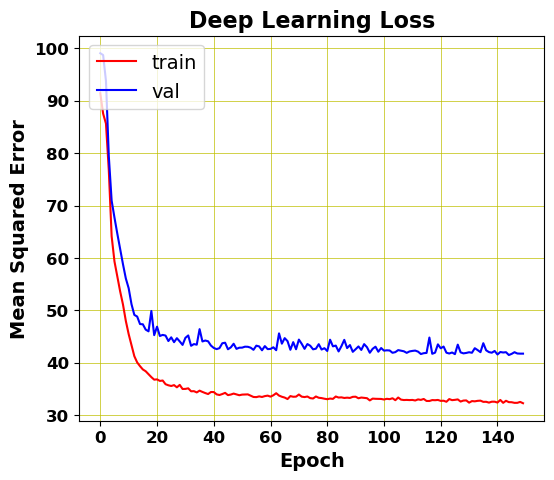

9


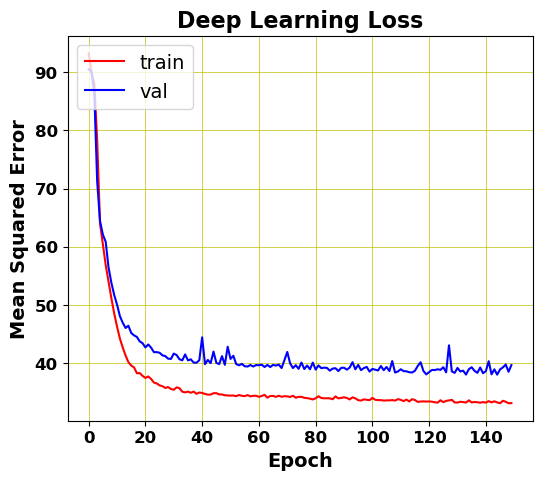

10


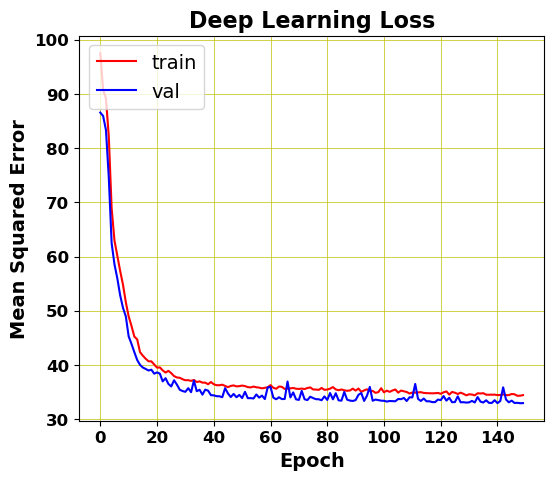

11


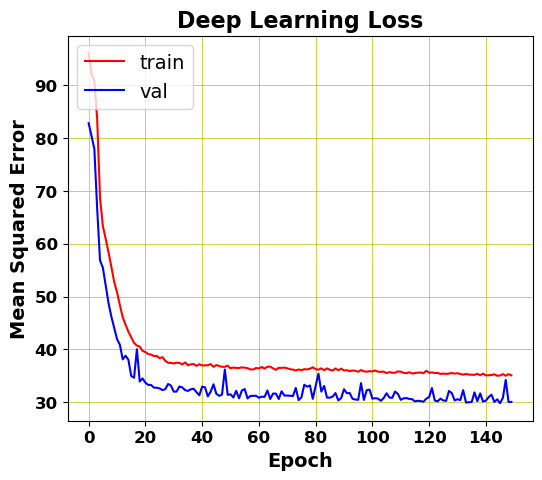

12


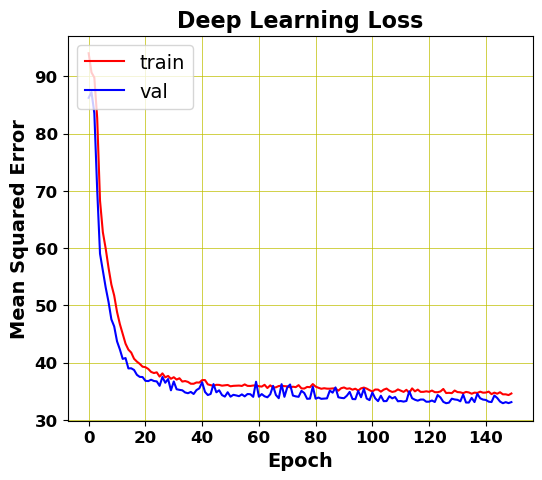

13


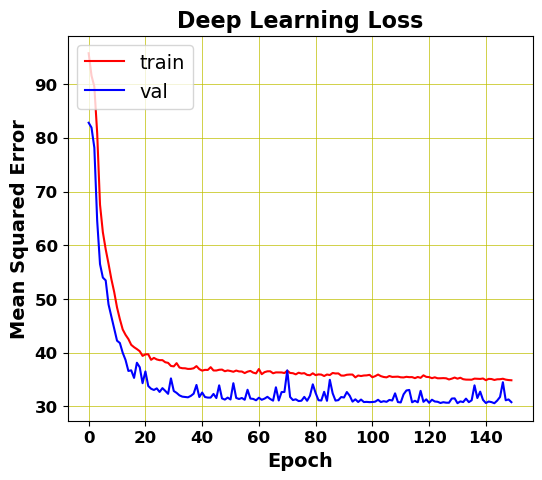

14


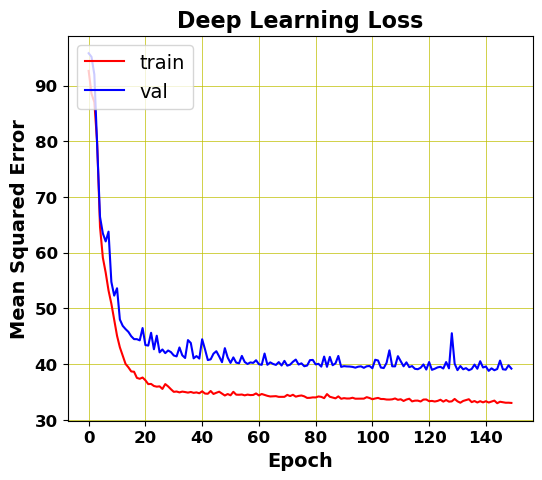

Wall time: 26min 10s


In [221]:
%%time

# Split
for i in range(10):
    X_train_sca, X_test_sca, y_train, y_test = train_test_split(X_sca, y, test_size = 0.2, random_state=i+3)
    print(i+5)
    dl_trained_model = dl_optimal(X_train_sca)

    history = dl_trained_model.fit(X_train_sca, y_train,
                            validation_data=(X_test_sca, y_test),
                            epochs=optimal_epochs, batch_size=optimal_batch_size,
                            verbose=0)

    # Save the trained model's weights
    #dl_trained_model.save_weights('trained_model_weights_woutBC.h5')
    #dl_trained_model.summary()
    
    plt.figure(figsize=(6, 5))
    plt.plot(history.history['loss'], color='r')
    plt.plot(history.history['val_loss'], color='b')
    plt.title('Deep Learning Loss', weight='bold', fontsize=16)
    plt.ylabel('Mean Squared Error', weight='bold', fontsize=14)
    plt.xlabel('Epoch', weight='bold', fontsize=14)
    #plt.ylim(0.5, 1)
    plt.xticks(weight='bold', fontsize=12)
    plt.yticks(weight='bold', fontsize=12)
    plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
    plt.grid(color = 'y', linewidth='0.5')

    # Save the plot as an image (optional)
    _str_name = 'Images/DL_loss_50_II_'+str(i+5)+'.png'
    plt.savefig(_str_name, bbox_inches='tight', dpi=300)

    plt.show()

5


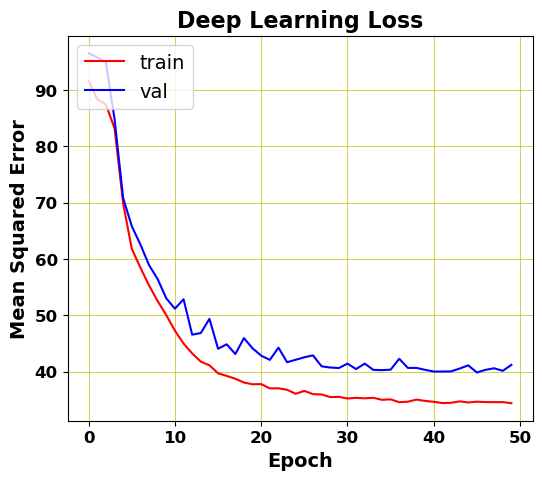

6


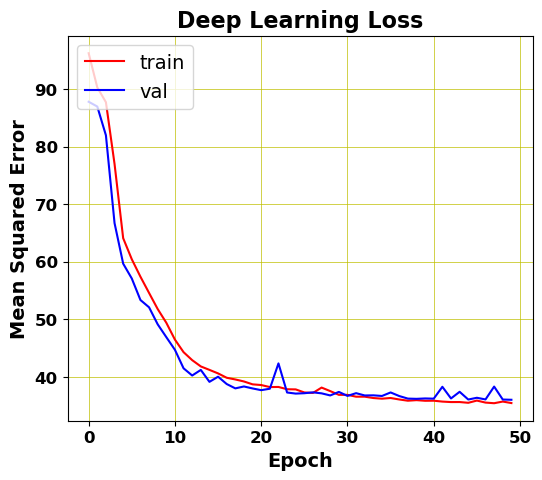

7


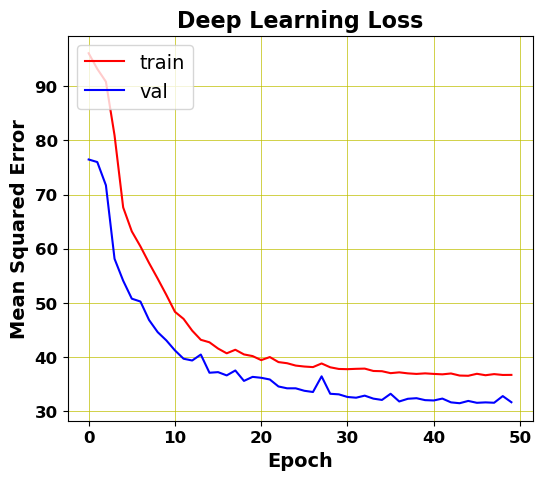

8


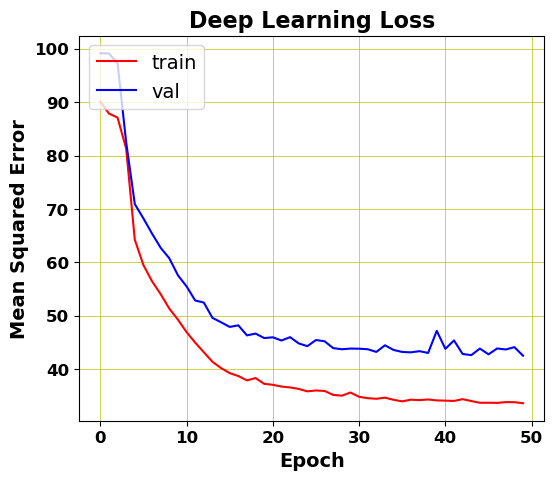

9


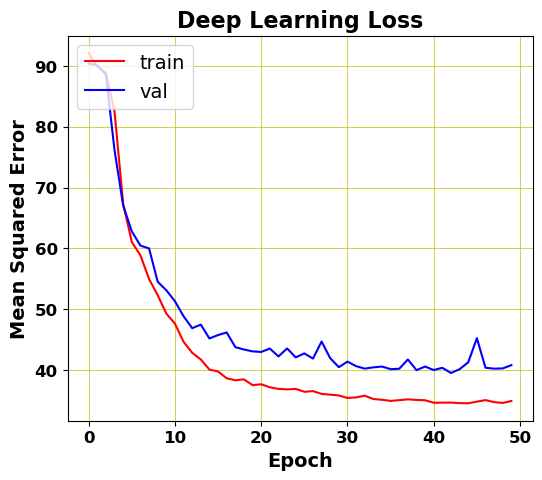

10


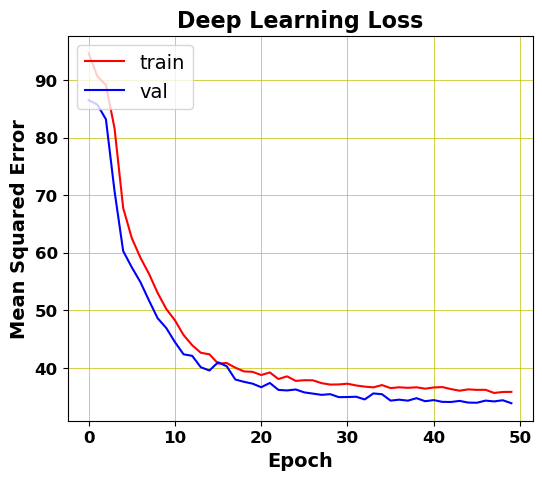

11


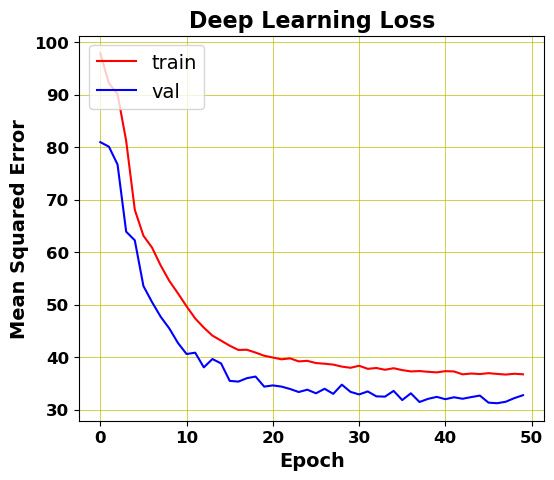

12


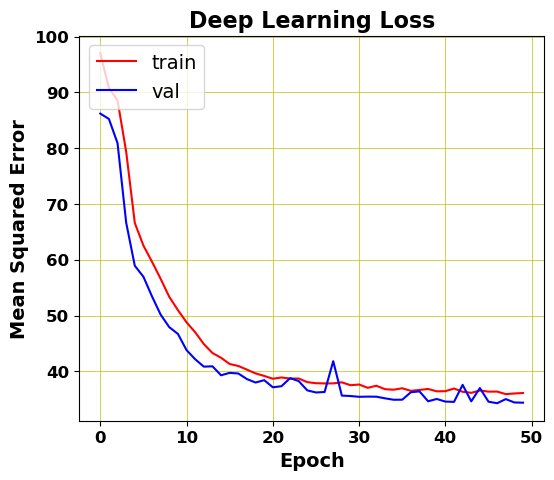

13


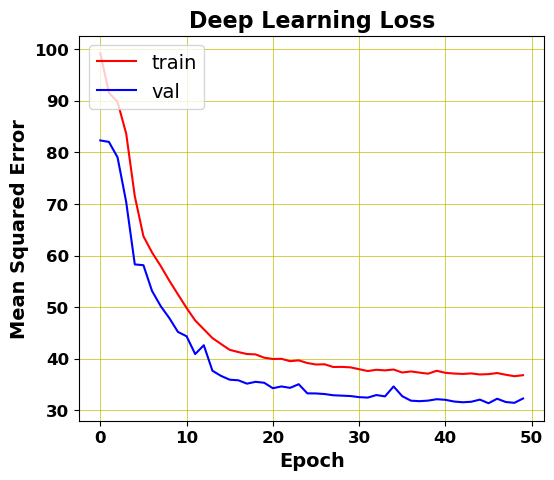

14


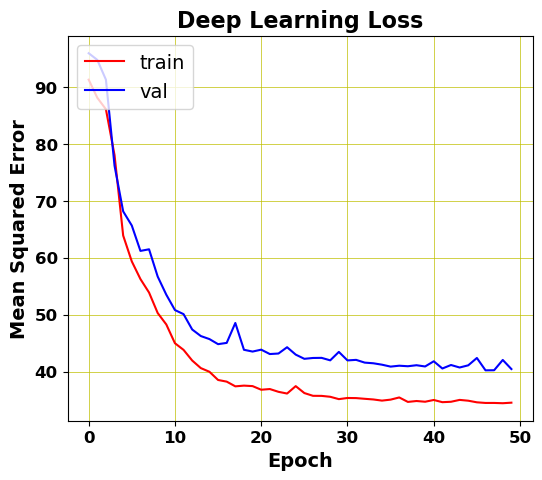

In [207]:
# Split
for i in range(10):
    X_train_sca, X_test_sca, y_train, y_test = train_test_split(X_sca, y, test_size = 0.2, random_state=i+5)
    print(i+5)
    dl_trained_model = dl_optimal(X_train_sca)

    history = dl_trained_model.fit(X_train_sca, y_train,
                            validation_data=(X_test_sca, y_test),
                            epochs=optimal_epochs, batch_size=optimal_batch_size,
                            verbose=0)

    # Save the trained model's weights
    #dl_trained_model.save_weights('trained_model_weights_woutBC.h5')
    #dl_trained_model.summary()
    
    plt.figure(figsize=(6, 5))
    plt.plot(history.history['loss'], color='r')
    plt.plot(history.history['val_loss'], color='b')
    plt.title('Deep Learning Loss', weight='bold', fontsize=16)
    plt.ylabel('Mean Squared Error', weight='bold', fontsize=14)
    plt.xlabel('Epoch', weight='bold', fontsize=14)
    #plt.ylim(0.5, 1)
    plt.xticks(weight='bold', fontsize=12)
    plt.yticks(weight='bold', fontsize=12)
    plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
    plt.grid(color = 'y', linewidth='0.5')

    # Save the plot as an image (optional)
    _str_name = 'Images/DL_loss_50_'+str(i+5)+'.png'
    plt.savefig(_str_name, bbox_inches='tight', dpi=300)

    plt.show()

In [203]:
dl_trained_model = dl_optimal(X_train_sca)

history = dl_trained_model.fit(X_train_sca, y_train,
                        validation_data=(X_test_sca, y_test),
                        epochs=optimal_epochs, batch_size=optimal_batch_size,
                        verbose=0)

# Save the trained model's weights
#dl_trained_model.save_weights('trained_model_weights_woutBC.h5')
dl_trained_model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_196 (Dense)           (None, 340)               10880     
                                                                 
 dense_197 (Dense)           (None, 340)               115940    
                                                                 
 dense_198 (Dense)           (None, 340)               115940    
                                                                 
 dense_199 (Dense)           (None, 340)               115940    
                                                                 
 dense_200 (Dense)           (None, 340)               115940    
                                                                 
 dense_201 (Dense)           (None, 340)               115940    
                                                                 
 dense_202 (Dense)           (None, 1)               

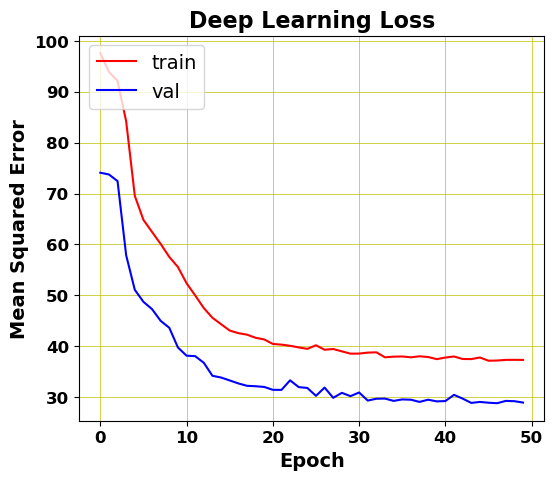

In [204]:
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Deep Learning Loss', weight='bold', fontsize=16)
plt.ylabel('Mean Squared Error', weight='bold', fontsize=14)
plt.xlabel('Epoch', weight='bold', fontsize=14)
#plt.ylim(0.5, 1)
plt.xticks(weight='bold', fontsize=12)
plt.yticks(weight='bold', fontsize=12)
plt.legend(['train', 'val'], loc='upper left', prop={'size': 14})
plt.grid(color = 'y', linewidth='0.5')

# Save the plot as an image (optional)
#plt.savefig('Images/DL_loss_50_I.png', bbox_inches='tight', dpi=300)

plt.show()

In [861]:
dl_trained_model_bc = dl_optimal(X_train_sca)

y_train_bc, bc_lambda = BoxCox(y_train)
y_train_bc = np.ravel(y_train_bc)

y_test_bc, bc_lambda = BoxCox(y_test)
y_test_bc = np.ravel(y_test_bc)

history = dl_trained_model_bc.fit(X_train_sca, y_train_bc,
                        validation_data=(X_test_sca, y_test_bc),
                        epochs=optimal_epochs, batch_size=optimal_batch_size,
                        verbose=0)

# Save the trained model's weights
#dl_trained_model_bc.save_weights('trained_model_weights_wout_BC_bcLOS.h5')
dl_trained_model_bc.summary()

Model: "sequential_315"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1582 (Dense)          (None, 240)               8160      
                                                                 
 dense_1583 (Dense)          (None, 240)               57840     
                                                                 
 dense_1584 (Dense)          (None, 240)               57840     
                                                                 
 dense_1585 (Dense)          (None, 240)               57840     
                                                                 
 dense_1586 (Dense)          (None, 1)                 241       
                                                                 
Total params: 181,921
Trainable params: 181,921
Non-trainable params: 0
_________________________________________________________________


## ANN Pruning

In [16]:
def viewPrune(list_r2_test_orig, list_mae_test_orig, list_rmse_test_orig, list_tol_test_orig, sparsity_levels):
    # Create the figure and axes
    fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharex=True)
    
    list_r2_test = [0.621, 0.634, 0.624, 0.633, 0.641, 0.632, 0.643, 0.64, 0.646, 0.649, 0.648, 0.649, 0.647, 0.63, 0.649, 0.652, 0.65, 0.649, 0.611, 0.648, 0.64, 0.642, 0.643, 0.643, 0.642, 0.646, 0.648, 0.646, 0.642, 0.638, 0.645, 0.61, 0.57]
    list_mae_test = [3.433, 3.105, 3.558, 3.323, 3.178, 3.419, 3.083, 3.119, 2.997, 3.12, 2.942, 3.065, 3.124, 3.343, 3.125, 3.075, 3.047, 3.05, 3.483, 3.094, 3.127, 3.125, 3.008, 3.013, 2.982, 2.996, 3.069, 3.071, 3.207, 3.203, 3.174, 3.285, 3.434]
    list_rmse_test = [5.389, 5.298, 5.37, 5.303, 5.246, 5.313, 5.231, 5.254, 5.211, 5.187, 5.197, 5.186, 5.2, 5.325, 5.183, 5.165, 5.182, 5.19, 5.459, 5.197, 5.255, 5.238, 5.232, 5.234, 5.239, 5.211, 5.195, 5.205, 5.237, 5.266, 5.216, 5.466, 5.738]
    list_tol_test = [64.323, 70.83, 61.705, 65.295, 69.559, 63.126, 70.606, 70.232, 71.877, 69.26, 72.775, 69.783, 68.736, 64.174, 67.913, 68.811, 69.035, 69.708, 62.603, 68.586, 68.212, 68.063, 70.83, 70.755, 72.027, 70.755, 69.783, 68.886, 67.39, 67.24, 67.24, 64.921, 63.8]


    # Plot on the first axis
    axs[0].plot(sparsity_levels, list_r2_test, '--', label="Iterative")
    axs[0].plot(sparsity_levels, list_r2_test_orig, label="All-at-Once")
    axs[0].set_title('R2 Metric', fontsize=15)
    axs[0].set_xlabel('Pruning level(%)', fontsize=13)
    axs[0].set_ylabel('R2 value', fontsize=13)
    axs[0].legend()
    axs[0].set_ylim(0.45,0.7)
    axs[0].grid(True)

    # Plot on the second axis
    axs[1].plot(sparsity_levels, list_mae_test, '--', label="Iterative")# , color='orange'
    axs[1].plot(sparsity_levels, list_mae_test_orig, label="All-at-Once")
    axs[1].set_title('MAE Metric', fontsize=15)
    axs[1].set_xlabel('Pruning level(%)', fontsize=13)
    axs[1].set_ylabel('MAE value(days)', fontsize=13)
    axs[1].legend()
    axs[1].set_ylim(2.5,4)
    axs[1].grid(True)

    # Plot on the third axis
    """axs[1, 0].plot(sparsity_levels, list_rmse_test, '--', label="Iterative")#, color='green'
    axs[1, 0].plot(sparsity_levels, list_rmse_test_orig, label="All-at-Once")
    axs[1, 0].set_title('RMSE')
    axs[1, 0].set_xlabel('Pruning level(%)')
    axs[1, 0].set_ylabel('RMSE value(days)')
    axs[1, 0].legend()
    #axs[1, 0].set_ylim(3,8)
    axs[1, 0].grid(True)

    # Plot on the fourth axis
    axs[1, 1].plot(sparsity_levels, list_tol_test, '--', label="Iterative")#, color='purple'
    axs[1, 1].plot(sparsity_levels, list_tol_test_orig, label="All-at-Once")
    axs[1, 1].set_title('Tolerance(3 days)')
    axs[1, 1].set_xlabel('Pruning level(%)')
    axs[1, 1].set_ylabel('Tolerance value(days)')
    axs[1, 1].legend()
    axs[1, 1].grid(True)"""

    # Adjust spacing between subplots
    plt.tight_layout()
    
    # Save the plot as an image (optional)
    plt.savefig('Images/metrics_plots_comparison.png', bbox_inches='tight', dpi=300)

    # Display the plot
    plt.show()

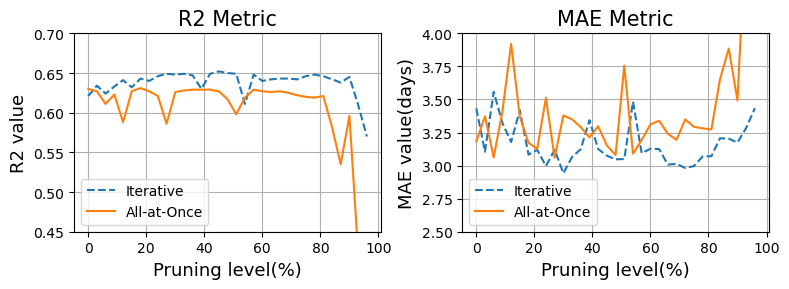

In [502]:
#4steps_1iter_True_6684_34
list_r2_orig = [0.63, 0.627, 0.611, 0.623, 0.588, 0.627, 0.631, 0.627, 0.621, 0.586, 0.626, 0.628, 0.629, 0.629, 0.629, 0.627, 0.617, 0.598, 0.619, 0.629, 0.627, 0.626, 0.627, 0.625, 0.622, 0.62, 0.619, 0.621, 0.582, 0.535, 0.596, 0.424, 0.034]
list_mae_orig = [3.181, 3.373, 3.061, 3.408, 3.92, 3.371, 3.173, 3.127, 3.511, 3.059, 3.379, 3.35, 3.291, 3.213, 3.297, 3.152, 3.08, 3.755, 3.09, 3.194, 3.311, 3.339, 3.241, 3.195, 3.349, 3.293, 3.282, 3.273, 3.654, 3.885, 3.492, 4.841, 6.029]
list_rmse_orig = [5.328, 5.348, 5.462, 5.376, 5.621, 5.344, 5.321, 5.349, 5.389, 5.635, 5.353, 5.34, 5.334, 5.331, 5.335, 5.347, 5.416, 5.55, 5.403, 5.331, 5.346, 5.355, 5.346, 5.36, 5.381, 5.395, 5.401, 5.39, 5.661, 5.967, 5.566, 6.647, 8.604]
list_tol_orig = [69.858, 65.445, 72.999, 64.547, 55.273, 65.52, 70.007, 70.606, 63.052, 73.149, 65.37, 65.819, 67.165, 69.858, 67.091, 70.681, 72.102, 58.19, 72.177, 69.708, 67.24, 66.642, 68.886, 69.858, 67.464, 68.512, 68.661, 69.185, 59.985, 54.001, 65.146, 28.347, 26.103]
sparsity_levels = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96]

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

In [543]:
def count_non_zero_weights(model):
    total_non_zero_weights = 0

    # Iterate over each layer in the model
    for layer in model.layers:
        weights = layer.get_weights()
        if len(weights) > 0:
            non_zero_weights = np.sum(np.abs(weights[0]) != 0)
            total_non_zero_weights += non_zero_weights

    return total_non_zero_weights

In [544]:
def count_zero_weights(model):
    total_zero_weights = 0
    total_weights = 0

    # Iterate over each layer in the model
    for layer in model.layers:
        weights = layer.get_weights()
        if len(weights) > 0:
            zero_weights = np.sum(np.abs(weights[0]) == 0)
            total_zero_weights += zero_weights
            total_weights += weights[0].size
            #print(f"Layer {layer.name}: {zero_weights} / {weights[0].size} weights are equal to 0")
        #else:
            #print(f"Layer {layer.name}: No weights")

    # Calculate and print the percentage of zero weights in the entire network
    if total_weights > 0:
        network_percentage = (total_zero_weights / total_weights) * 100
        #print(f"\nTotal Percentage of 0's in the network: {network_percentage}%")

    return network_percentage

In [545]:
def runPrune(steps = 5, original_flag = False):
    # List to store the sparsity levels and corresponding accuracies
    sparsity_levels = []
    list_r2_test = []
    list_mae_test = []
    list_rmse_test = []
    list_tol_test = []
    
    # Load the saved weights into a new model instance
    cloned_model = dl_optimal(X_train_sca)  # Create a new model instance with the same architecture
    cloned_model.load_weights('trained_model_weights_wBC.h5')
    total_non_zero_original = count_non_zero_weights(cloned_model)
    print(f"ALL : {total_non_zero_original}")
    
    # Perform pruning at different sparsity levels and record accuracies
    current_zeros = 0
    range_limit = (int(98/steps) * steps) + 1
    for pruning_percentage in range(0, range_limit, steps):  # Vary sparsity from 0 to 90 with a step of 10
        
        #current_zeros = total_non_zero_original - count_non_zero_weights(cloned_model)
        #new_zeros = ((pruning_percentage/100) - (current_zeros/total_non_zero_original)) * total_non_zero_original
        #print(f"Current 0's: {current_zeros}")
        #print(f"New 0's: {new_zeros}")
        #current_per = float(new_zeros / total_non_zero_original)
        #print(f"Current Per: {current_per}")
        
        #k_list = [i*(pruning_percentage/k) for i in range(1, k + 1)]
        #print(k_list)
        #for per in k_list:    
            
        # Update pruning parameters based on the current pruning percentage
        current_pruning_params = {
                'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(
                    initial_sparsity=0.0,
                    final_sparsity=(pruning_percentage/100),
                    begin_step=50,
                    end_step=2000,
                )
            }
        """current_pruning_params = {
                'pruning_schedule': tfmot.sparsity.keras.ConstantSparsity((per/100), begin_step=0, end_step=end_step)
        }"""
            
        # Apply pruning at the current sparsity level
        pruned_model = tfmot.sparsity.keras.prune_low_magnitude(cloned_model, **current_pruning_params)

        # Compile and retrain the pruned model
        pruned_model.compile(loss = 'mean_squared_error',optimizer = Adamax(learning_rate=optimal_learn_rate), metrics = ['mae'])

        # Define the callback to update pruning step
        callback = [tfmot.sparsity.keras.UpdatePruningStep()]
        pruned_model.fit(X_train_sca, y_train, batch_size=optimal_batch_size, epochs=optimal_epochs, validation_data=(X_test_sca, y_test), verbose=0, callbacks=callback)
            
        # Fine-tune the pruned model
        #fine_tune_epochs = 10
        #pruned_model.compile(optimizer=Adamax(learning_rate=1e-5), loss='mean_squared_error', metrics=['mae'])
        #pruned_model.fit(X_train_sca, y_train, batch_size=optimal_batch_size, epochs=fine_tune_epochs, validation_data=(X_test_sca, y_test), verbose=0)
            
        # Evaluate the pruned model and record accuracy
        y_pred = pruned_model.predict(X_test_sca)
        y_pred = [i[0].astype(float) for i in y_pred]
        
        #y_pred = inv_boxcox(y_pred, bc_lambda)

        test_mae_dl = round(mean_absolute_error(y_test, y_pred), 3)
        test_rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred)), 3)
        test_r2_dl = round(r2_score(y_test,y_pred), 3)
        test_tol_dl = round(getTolerance(y_pred, y_test, 3), 3)
        
        model_for_export = tfmot.sparsity.keras.strip_pruning(pruned_model)
        model_for_export.compile(loss = 'mean_squared_error',optimizer = Adamax(learning_rate=optimal_learn_rate), metrics = ['mae'])

        if list_r2_test:
            if test_r2_dl > max(list_r2_test):
                best_model_name = 'PruneTest/best_model_' + str(original_flag) + str(steps) + '_'+str(X_train_sca.shape[1]) + '.h5'
                keras.models.save_model(model_for_export, best_model_name)
        else:
            best_model_name = 'PruneTest/best_model_' + str(original_flag) + str(steps) + '_'+str(X_train_sca.shape[1]) + '.h5'
            keras.models.save_model(model_for_export, best_model_name)
            
        list_r2_test.append(test_r2_dl)
        list_mae_test.append(test_mae_dl)
        list_rmse_test.append(test_rmse_dl)
        list_tol_test.append(test_tol_dl)
        print(pruning_percentage, test_r2_dl, test_mae_dl, test_rmse_dl, test_tol_dl, count_zero_weights(pruned_model))
        sparsity_levels.append(pruning_percentage)
        
        #model_for_export.compile(loss = 'mean_squared_error',optimizer = Adamax(learning_rate=optimal_learn_rate), metrics = ['mae'])
        #model_name = 'Models/pruned_dl_model'+str(pruning_percentage) + '_' + str(original_flag) + str(steps) + '.h5'
        #keras.models.save_model(model_for_export, model_name)
        
        if original_flag:
            cloned_model = dl_optimal(X_train_sca)  # Create a new model instance with the same architecture
            cloned_model.load_weights('trained_model_weights_wBC.h5')
        
    return list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels

In [ ]:
%%time
"""
    Removing feat
"""

steps = 8
original_flag = False

for i in range(11):  
    print(" ----- Feature nº: ",X_train_sca.shape[1])
    print(X_train_sca.columns)
    list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels= runPrune(steps, original_flag)
    
    file_name = "PruneTest/"+'withBCvars'+str(X_train_sca.shape[1]) + str(steps) + "steps_" + str(original_flag) + "_" + str(df_final.shape[0]) + "_" + str(df_final.shape[1]) + ".txt"
    f = open(file_name, "a")
    
    f.write('\n')
    f.write(str(X_train_sca.columns))
    f.write('\n')
    f.write(str(list_r2_test))
    f.write('\n')
    f.write(str(list_mae_test))
    f.write('\n')
    f.write(str(list_rmse_test))
    f.write('\n')
    f.write(str(list_tol_test))
    f.write('\n')
    f.write(str(sparsity_levels))

    f.close()
    
    best_name = 'PruneTest/best_model_' + str(original_flag) + str(steps) + '_'+str(X_train_sca.shape[1]) + '.h5'
    model_to_remove = keras.models.load_model(best_name)
    # Get the weights of the input layer
    input_weights = model_to_remove.layers[0].get_weights()[0]  # Assuming the input layer is at index 0

    # Calculate the number of non-zero weights for each feature
    non_zero_weights = np.count_nonzero(input_weights, axis=1)

    # Sort the features based on importance
    sorted_indices = np.argsort(non_zero_weights)[::-1]
    
    indices_to_remove = sorted_indices[-3:]
    # Remove features by index using iloc
    X_train_sca = X_train_sca.drop(X_train_sca.columns[indices_to_remove], axis=1)
    X_test_sca = X_test_sca.drop(X_test_sca.columns[indices_to_remove], axis=1)
    
    new_dl_trained_model = dl_optimal(X_train_sca)

    history = new_dl_trained_model.fit(X_train_sca, y_train,
                        validation_data=(X_test_sca, y_test),
                        epochs=optimal_epochs, batch_size=optimal_batch_size,
                        verbose=0)
    
    new_dl_trained_model.save_weights('trained_model_weights_wBC.h5')

 ----- Feature nº:  33
Index(['SAPSScore', 'Traqueostomia', 'TempoAteAdmissaoUni',
       'Unique_patient_per_Hosp', 'Unique_patient_per_Service', 'Antimalárico',
       'Antivírico', 'Vasopressor', 'Psicofármaco', 'Opiáceo',
       'Relaxante muscular', 'NumPrescricoes', 'DuracaoPrescricoes', 'VMI',
       'NumeroDiagn', 'DispositivosNum', 'PosicaoProne', 'SAPSFiO2', 'pH_min',
       'PaCO2_max', 'PaO2_max', 'Sonda vesical', 'Cateter venoso periférico',
       'Sonda nasogástrica', 'Cateter arterial', 'Cateter venoso central',
       'Tubo Orotraqueal', 'HospitalRegiaoId_19', 'SAPSDoencasCronicas_4.0',
       'ServicoId_30', 'ServicoId_53', 'ServicoId_59', 'ServicoId_88'],
      dtype='object')
ALL : 589560
42/42 [==============================] - 0s 4ms/step
0 0.574 4.015 5.715 53.628 0.0
42/42 [==============================] - 0s 4ms/step
8 0.632 3.174 5.314 70.082 8.000033923604043
42/42 [==============================] - 0s 4ms/step
16 0.636 3.212 5.283 68.736 15.99989822918787
4

42/42 [==============================] - 0s 4ms/step
40 0.622 3.273 5.385 69.334 39.999138495468486
42/42 [==============================] - 0s 4ms/step
48 0.616 3.454 5.422 62.977 47.99906957510596
42/42 [==============================] - 0s 4ms/step
56 0.611 3.514 5.458 61.032 55.99900065474345
42/42 [==============================] - 0s 4ms/step
64 0.614 3.476 5.442 62.079 63.99927633619353
42/42 [==============================] - 0s 3ms/step
72 0.613 3.347 5.444 66.717 71.99920741583101
42/42 [==============================] - 0s 3ms/step
80 0.622 3.216 5.379 68.586 79.99827699093697
42/42 [==============================] - 0s 4ms/step
88 0.601 3.44 5.527 66.343 87.99820807057445
42/42 [==============================] - 0s 3ms/step
96 0.14 5.746 8.117 29.17 95.99813915021193
 ----- Feature nº:  3
Index(['NumPrescricoes', 'DuracaoPrescricoes', 'NumeroDiagn'], dtype='object')
ALL : 579360
42/42 [==============================] - 0s 4ms/step
0 0.522 3.419 6.056 70.83 0.0
42/42 [======

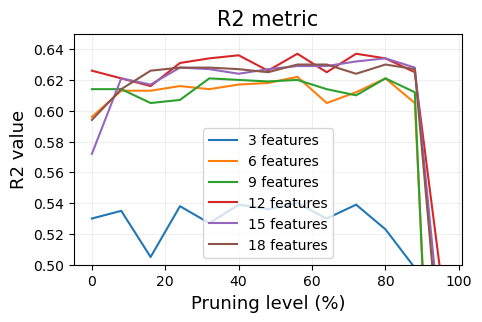

In [3]:
# Update 8 steps

sparsity_levels = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96]

r2_33 = [0.629, 0.633, 0.636, 0.63, 0.635, 0.64, 0.641, 0.628, 0.637, 0.647, 0.641, 0.636, 0.48]
r2_30 = [0.594, 0.632, 0.631, 0.632, 0.634, 0.627, 0.637, 0.64, 0.643, 0.644, 0.639, 0.633, 0.534]
r2_27 = [0.587, 0.609, 0.621, 0.628, 0.628, 0.631, 0.635, 0.635, 0.638, 0.641, 0.638, 0.634, 0.422]
r2_24 = [0.575, 0.625, 0.633, 0.631, 0.636, 0.623, 0.633, 0.627, 0.63, 0.635, 0.643, 0.627, 0.556]
r2_21 = [0.618, 0.623, 0.623, 0.61, 0.63, 0.627, 0.629, 0.629, 0.629, 0.634, 0.637, 0.63, 0.455]
r2_18 = [0.594, 0.614, 0.626, 0.628, 0.628, 0.627, 0.625, 0.63, 0.63, 0.624, 0.63, 0.627, 0.413]
r2_15 = [0.572, 0.621, 0.617, 0.628, 0.627, 0.624, 0.627, 0.629, 0.629, 0.632, 0.634, 0.628, 0.434]
r2_12 = [0.626, 0.621, 0.616, 0.631, 0.634, 0.636, 0.626, 0.637, 0.625, 0.637, 0.634, 0.625, 0.476]
r2_9 = [0.614, 0.614, 0.605, 0.607, 0.621, 0.62, 0.619, 0.62, 0.614, 0.61, 0.621, 0.612, 0.175]
r2_6 = [0.596, 0.613, 0.613, 0.616, 0.614, 0.617, 0.618, 0.622, 0.605, 0.612, 0.621, 0.605, 0.209]
r2_3 = [0.53, 0.535, 0.505, 0.538, 0.527, 0.539, 0.536, 0.54, 0.53, 0.539, 0.523, 0.498, 0.079]

# Create a new figure
plt.figure(figsize=(5,3))

# Plot the lines
plt.plot(sparsity_levels, r2_3, label='3 features')
plt.plot(sparsity_levels, r2_6, label='6 features')
plt.plot(sparsity_levels, r2_9, label='9 features')
plt.plot(sparsity_levels, r2_12, label='12 features')
plt.plot(sparsity_levels, r2_15, label='15 features')
plt.plot(sparsity_levels, r2_18, label='18 features')
"""plt.plot(sparsity_levels, r2_21, label='21 features')
plt.plot(sparsity_levels, r2_24, label='24 features')
plt.plot(sparsity_levels, r2_27, label='27 features')
plt.plot(sparsity_levels, r2_30, label='30 features')
plt.plot(sparsity_levels, r2_33, label='33 features')


"""

# Set the title and labels
plt.title('R2 metric', fontsize=15)
plt.xlabel('Pruning level (%)', fontsize=13)
plt.ylabel('R2 value', fontsize=13)
plt.ylim(0.5,0.65)

# Add a legend
plt.legend()
plt.grid(alpha=0.2)

# Save the plot as an image (optional)
plt.savefig('Images/comparison_num_features_tiny.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

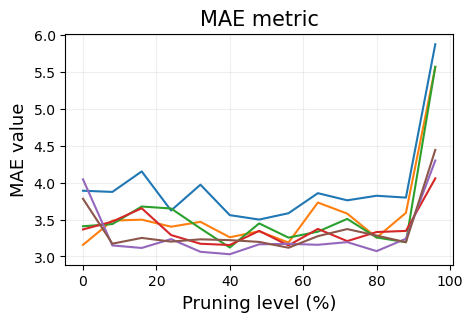

In [4]:
# Update 8 steps MAE

sparsity_levels = [0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96]

mae_33 = [3.272, 3.297, 3.26, 3.416, 3.068, 3.209, 3.228, 3.31, 3.209, 3.041, 2.988, 3.216, 4.045]
mae_30 = [3.795, 3.185, 3.272, 3.032, 3.253, 3.353, 3.075, 3.227, 3.038, 3.116, 3.259, 3.186, 3.926]
mae_27 = [3.847, 3.032, 3.099, 3.437, 3.032, 3.062, 3.158, 3.19, 3.112, 3.17, 3.189, 3.408, 4.397]
mae_24 = [4.016, 3.105, 3.121, 3.287, 3.189, 3.462, 3.283, 2.974, 3.43, 2.97, 3.073, 3.36, 3.71]
mae_21 = [3.369, 3.376, 3.393, 3.548, 3.141, 3.094, 3.177, 3.141, 3.077, 3.255, 3.113, 3.148, 4.236]
mae_18 = [3.782, 3.173, 3.251, 3.201, 3.232, 3.221, 3.197, 3.118, 3.275, 3.371, 3.283, 3.193, 4.445]
mae_15 = [4.045, 3.149, 3.115, 3.235, 3.063, 3.03, 3.164, 3.171, 3.158, 3.194, 3.072, 3.24, 4.301]
mae_12 = [3.366, 3.473, 3.653, 3.29, 3.172, 3.155, 3.347, 3.149, 3.373, 3.208, 3.331, 3.346, 4.059]
mae_9 = [3.409, 3.439, 3.677, 3.65, 3.38, 3.121, 3.448, 3.255, 3.336, 3.509, 3.257, 3.193, 5.573]
mae_6 = [3.157, 3.486, 3.499, 3.403, 3.469, 3.26, 3.341, 3.188, 3.731, 3.581, 3.256, 3.591, 5.567]
mae_3 = [3.891, 3.875, 4.153, 3.623, 3.973, 3.56, 3.5, 3.586, 3.858, 3.761, 3.823, 3.798, 5.878]

# Create a new figure
plt.figure(figsize=(5,3))

# Plot the lines
plt.plot(sparsity_levels, mae_3, label='3 features')
plt.plot(sparsity_levels, mae_6, label='6 features')
plt.plot(sparsity_levels, mae_9, label='9 features')
plt.plot(sparsity_levels, mae_12, label='12 features')
plt.plot(sparsity_levels, mae_15, label='15 features')
plt.plot(sparsity_levels, mae_18, label='18 features')
"""plt.plot(sparsity_levels, mae_21, label='21 features')
plt.plot(sparsity_levels, mae_24, label='24 features')
plt.plot(sparsity_levels, mae_27, label='27 features')
plt.plot(sparsity_levels, mae_30, label='30 features')
plt.plot(sparsity_levels, mae_33, label='33 features')
"""
# Set the title and labels
plt.title('MAE metric', fontsize=15)
plt.xlabel('Pruning level (%)', fontsize=13)
plt.ylabel('MAE value', fontsize=13)
#plt.ylim(0.5,0.65)

# Add a legend
#plt.legend()
plt.grid(alpha=0.2)

# Save the plot as an image (optional)
plt.savefig('Images/comparison_num_features_mae_tiny.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

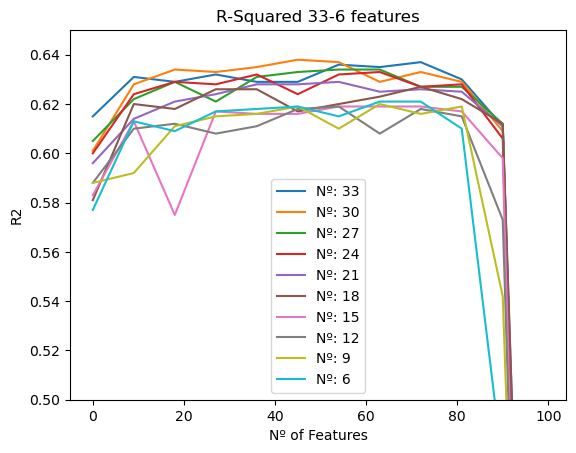

In [23]:
sparsity_levels =[0, 9, 18, 27, 36, 45, 54, 63, 72, 81, 90, 99]

r2_33 = [0.615, 0.631, 0.629, 0.632, 0.629, 0.629, 0.636, 0.635, 0.637, 0.63, 0.611, 0.081]
r2_30 = [0.601, 0.628, 0.634, 0.633, 0.635, 0.638, 0.637, 0.629, 0.633, 0.629, 0.609, 0.077]
r2_27 = [0.605, 0.622, 0.629, 0.621, 0.631, 0.633, 0.634, 0.634, 0.627, 0.627, 0.612, 0.076]
r2_24 = [0.6, 0.624, 0.629, 0.628, 0.632, 0.624, 0.632, 0.633, 0.627, 0.628, 0.606, 0.009]
r2_21 = [0.596, 0.614, 0.621, 0.624, 0.628, 0.628, 0.629, 0.625, 0.626, 0.625, 0.611, 0.114]
r2_18 = [0.581, 0.62, 0.618, 0.626, 0.626, 0.617, 0.62, 0.623, 0.627, 0.622, 0.612, 0.11]
r2_15 = [0.583, 0.613, 0.575, 0.617, 0.616, 0.616, 0.619, 0.619, 0.619, 0.617, 0.598, 0.001]
r2_12 = [0.588, 0.61, 0.612, 0.608, 0.611, 0.618, 0.619, 0.608, 0.618, 0.615, 0.573, 0.041]
r2_9 = [0.588, 0.592, 0.611, 0.615, 0.616, 0.619, 0.61, 0.62, 0.616, 0.619, 0.542, 0.063]
r2_6 = [0.577, 0.613, 0.609, 0.617, 0.618, 0.619, 0.615, 0.621, 0.621, 0.61, 0.473, 0.09]

# Create a new figure
plt.figure()

# Plot the lines
plt.plot(sparsity_levels, r2_33, label='Nº: 33')
plt.plot(sparsity_levels, r2_30, label='Nº: 30')
plt.plot(sparsity_levels, r2_27, label='Nº: 27')
plt.plot(sparsity_levels, r2_24, label='Nº: 24')
plt.plot(sparsity_levels, r2_21, label='Nº: 21')
plt.plot(sparsity_levels, r2_18, label='Nº: 18')
plt.plot(sparsity_levels, r2_15, label='Nº: 15')
plt.plot(sparsity_levels, r2_12, label='Nº: 12')
plt.plot(sparsity_levels, r2_9, label='Nº: 9')
plt.plot(sparsity_levels, r2_6, label='Nº: 6')

# Set the title and labels
plt.title('R-Squared 33-6 features')
plt.xlabel('Sparcity level')
plt.ylabel('R2')
plt.ylim(0.5,0.65)

# Add a legend
plt.legend()

# Display the plot
plt.show()

ALL : 589560
42/42 [==============================] - 0s 3ms/step
0 0.621 3.433 5.389 64.323 0.0
42/42 [==============================] - 0s 3ms/step
3 0.634 3.105 5.298 70.83 3.0000339236040436
42/42 [==============================] - 0s 3ms/step
6 0.624 3.558 5.37 61.705 5.999898229187869
42/42 [==============================] - 0s 3ms/step
9 0.633 3.323 5.303 65.295 9.000101770812131
42/42 [==============================] - 0s 3ms/step
12 0.641 3.178 5.246 69.559 11.999966076395955
42/42 [==============================] - 0s 4ms/step
15 0.632 3.419 5.313 63.126 15.0
42/42 [==============================] - 0s 4ms/step
18 0.643 3.083 5.231 70.606 18.000033923604043
42/42 [==============================] - 0s 4ms/step
21 0.64 3.119 5.254 70.232 20.99989822918787
42/42 [==============================] - 0s 4ms/step
24 0.646 2.997 5.211 71.877 24.000101770812133
42/42 [==============================] - 0s 4ms/step
27 0.649 3.12 5.187 69.26 26.999117986294863
42/42 [=====================

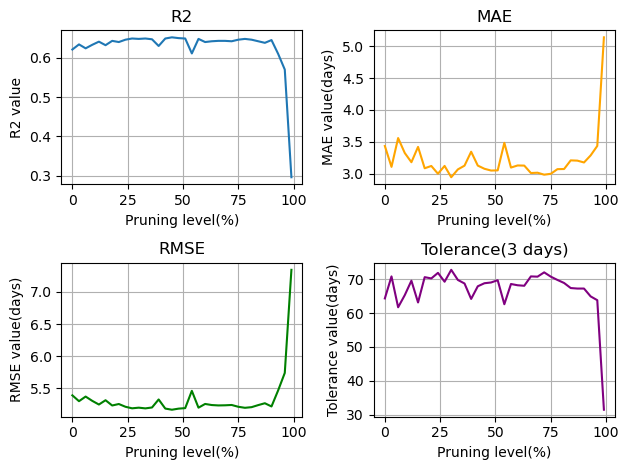

Wall time: 37min 56s


In [62]:
%%time
"""
    With BoxCox in variables - Iteralive
"""
steps = 3
original_flag = False
list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels= runPrune(steps, original_flag)

file_name = "Pruning/" + str(steps) + "steps_" + str(original_flag) + '_BoxCoxVars' + "_" + str(df_final.shape[0]) + "_" + str(df_final.shape[1]) + ".txt"
f = open(file_name, "a")

f.write(str(list_r2_test))
f.write('\n')
f.write(str(list_mae_test))
f.write('\n')
f.write(str(list_rmse_test))
f.write('\n')
f.write(str(list_tol_test))
f.write('\n')
f.write(str(sparsity_levels))

f.close()

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

ALL : 589560
42/42 [==============================] - 0s 3ms/step
0 0.63 3.181 5.328 69.858 0.0
42/42 [==============================] - 0s 3ms/step
3 0.627 3.373 5.348 65.445 3.0000339236040436
42/42 [==============================] - 0s 3ms/step
6 0.611 3.061 5.462 72.999 5.999898229187869
42/42 [==============================] - 0s 4ms/step
9 0.623 3.408 5.376 64.547 9.000101770812131
42/42 [==============================] - 0s 3ms/step
12 0.588 3.92 5.621 55.273 11.999966076395955
42/42 [==============================] - 0s 3ms/step
15 0.627 3.371 5.344 65.52 15.0
42/42 [==============================] - 0s 4ms/step
18 0.631 3.173 5.321 70.007 18.000033923604043
42/42 [==============================] - 0s 3ms/step
21 0.627 3.127 5.349 70.606 20.99989822918787
42/42 [==============================] - 0s 4ms/step
24 0.621 3.511 5.389 63.052 24.000101770812133
42/42 [==============================] - 0s 4ms/step
27 0.586 3.059 5.635 73.149 26.999117986294863
42/42 [===================

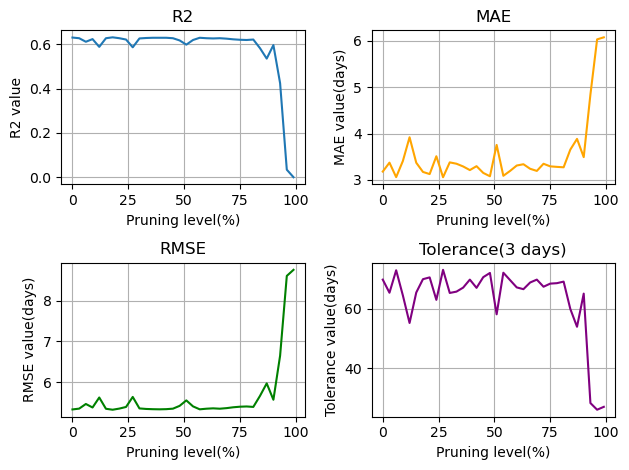

Wall time: 34min 22s


In [61]:
%%time
"""
    With BoxCox in variables - All-at-Once
"""
steps = 3
original_flag = True
list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels= runPrune(steps, original_flag)

file_name = "Pruning/" + str(steps) + "steps_" + str(original_flag) + '_BoxCoxVars' + "_" + str(df_final.shape[0]) + "_" + str(df_final.shape[1]) + ".txt"
f = open(file_name, "a")

f.write(str(list_r2_test))
f.write('\n')
f.write(str(list_mae_test))
f.write('\n')
f.write(str(list_rmse_test))
f.write('\n')
f.write(str(list_tol_test))
f.write('\n')
f.write(str(sparsity_levels))

f.close()

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

ALL : 180960
[0.0]
42/42 [==============================] - 1s 15ms/step
Layer prune_low_magnitude_dense_1587: 0 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1588: 0 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1589: 0 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1590: 0 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1591: 0 / 240 weights are equal to 0
0 0.614 3.478 5.442 61.855 0.0
[4.0]
42/42 [==============================] - 1s 15ms/step
Layer prune_low_magnitude_dense_1592: 317 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1593: 2304 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1594: 2304 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1595: 2304 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1596: 10 / 240 weights are equal to 0
4 0.583 3.879 5.654 53.702 4.0003315649867375
[8.0]
42/42 [==============================] - 1s 11ms/step
Layer prune_lo

[72.0]
42/42 [==============================] - 1s 10ms/step
Layer prune_low_magnitude_dense_1677: 5702 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1678: 41472 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1679: 41472 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1680: 41472 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1681: 173 / 240 weights are equal to 0
72 0.601 3.502 5.533 61.331 71.99988947833775
[76.0]
42/42 [==============================] - 0s 9ms/step
Layer prune_low_magnitude_dense_1682: 6019 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1683: 43776 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1684: 43776 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1685: 43776 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1686: 182 / 240 weights are equal to 0
76 0.597 3.462 5.559 62.752 75.99966843501326
[80.0]
42/42 [==============================] - 1

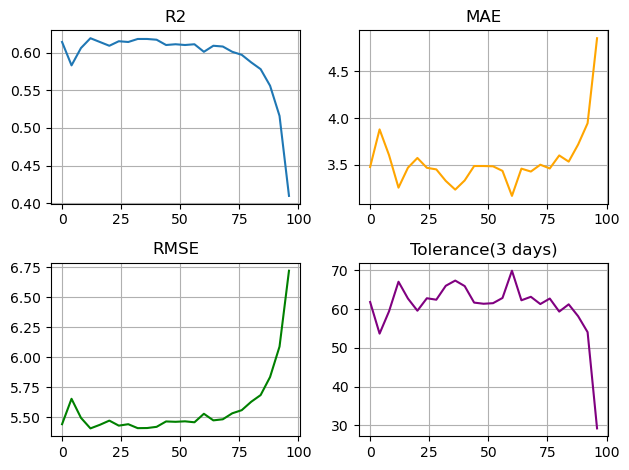

Wall time: 1h 2min 18s


In [862]:
%%time
"""
    Wout BoxCox
"""
steps = 4
k = 1
original_flag = True
list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels= runPrune(steps, k, original_flag)

file_name = "Pruning/" + str(steps) + "steps_" + str(k) + "iter_" + str(original_flag) + "_" + str(df_final.shape[0]) + "_" + str(df_final.shape[1]) + ".txt"
f = open(file_name, "a")

f.write(str(list_r2_test))
f.write('\n')
f.write(str(list_mae_test))
f.write('\n')
f.write(str(list_rmse_test))
f.write('\n')
f.write(str(list_tol_test))
f.write('\n')
f.write(str(sparsity_levels))

f.close()

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

ALL : 180960
[0.0]
42/42 [==============================] - 1s 13ms/step
0 0.599 2.998 5.545 73.224 0.0
[4.0]
42/42 [==============================] - 0s 7ms/step
4 0.591 2.973 5.596 73.598 4.0003315649867375
[8.0]
42/42 [==============================] - 0s 9ms/step
8 0.621 2.974 5.389 73.373 8.000110521662245
[12.0]
42/42 [==============================] - 0s 8ms/step
12 0.58 2.942 5.672 74.944 11.999889478337753
[16.0]
42/42 [==============================] - 0s 8ms/step
16 0.588 2.916 5.62 75.168 15.999668435013263
[20.0]
42/42 [==============================] - 0s 9ms/step
20 0.591 2.908 5.599 75.168 20.0
[24.0]
42/42 [==============================] - 0s 8ms/step
24 0.598 2.904 5.549 74.42 24.000331564986737
[28.0]
42/42 [==============================] - 0s 8ms/step
28 0.586 2.917 5.631 74.72 28.000110521662247
[32.0]
42/42 [==============================] - 1s 9ms/step
32 0.586 2.913 5.634 74.869 31.999889478337757
[36.0]
42/42 [==============================] - 1s 10ms/step
36

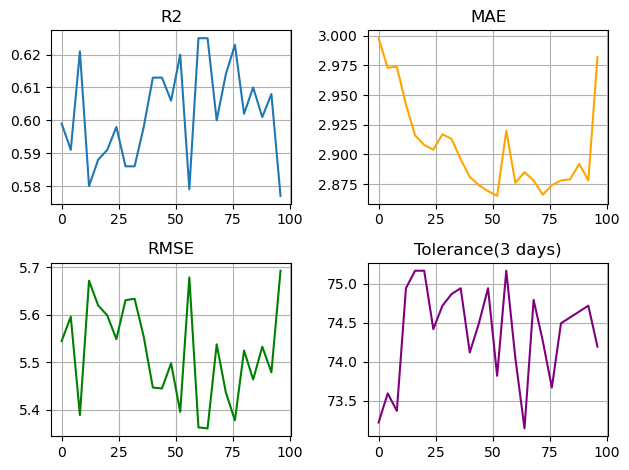

Wall time: 57min 22s


In [792]:
%%time
"""
    With BoxCox in variables and LOS
"""
steps = 4
k = 1
original_flag = False
list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels= runPrune(steps, k, original_flag)

file_name = "Pruning/" + str(steps) + "steps_" + str(k) + "iter_" + str(original_flag) + '_BoxCoxVars_e_LOS' + "_" + str(df_final.shape[0]) + "_" + str(df_final.shape[1]) + ".txt"
f = open(file_name, "a")

f.write(str(list_r2_test))
f.write('\n')
f.write(str(list_mae_test))
f.write('\n')
f.write(str(list_rmse_test))
f.write('\n')
f.write(str(list_tol_test))
f.write('\n')
f.write(str(sparsity_levels))

f.close()

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

ALL : 180960
[0.0]
42/42 [==============================] - 1s 11ms/step
Layer prune_low_magnitude_dense_1302: 0 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1303: 0 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1304: 0 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1305: 0 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1306: 0 / 240 weights are equal to 0
0 0.558 3.039 5.821 73.897 0.0
[4.0]
42/42 [==============================] - 0s 9ms/step
Layer prune_low_magnitude_dense_1307: 317 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1308: 2304 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1309: 2304 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1310: 2304 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1311: 10 / 240 weights are equal to 0
4 0.591 2.985 5.6 72.775 4.0003315649867375
[8.0]
42/42 [==============================] - 1s 10ms/step
Layer prune_low_m

[72.0]
42/42 [==============================] - 0s 9ms/step
Layer prune_low_magnitude_dense_1392: 5702 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1393: 41472 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1394: 41472 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1395: 41472 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1396: 173 / 240 weights are equal to 0
72 0.58 3.011 5.676 73.448 71.99988947833775
[76.0]
42/42 [==============================] - 0s 7ms/step
Layer prune_low_magnitude_dense_1397: 6019 / 7920 weights are equal to 0
Layer prune_low_magnitude_dense_1398: 43776 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1399: 43776 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1400: 43776 / 57600 weights are equal to 0
Layer prune_low_magnitude_dense_1401: 182 / 240 weights are equal to 0
76 0.577 3.015 5.695 73.298 75.99966843501326
[80.0]
42/42 [==============================] - 0s 

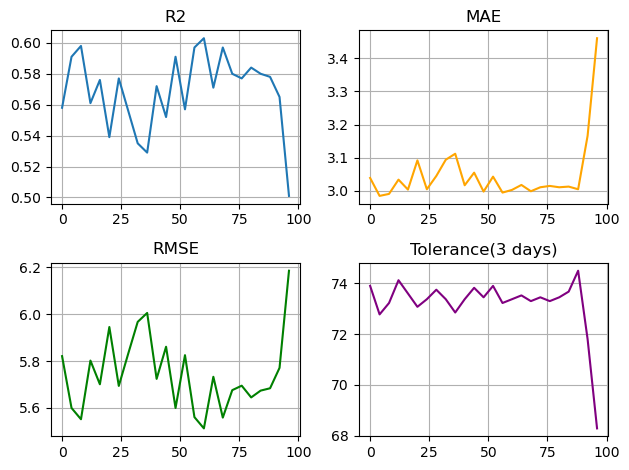

Wall time: 58min 41s


In [816]:
%%time
"""
    With BoxCox in variables and LOS Original
"""
steps = 4
k = 1
original_flag = True
list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels= runPrune(steps, k, original_flag)

file_name = "Pruning/" + str(steps) + "steps_" + str(k) + "iter_" + str(original_flag) + '_BoxCoxVars_e_LOS' + "_" + str(df_final.shape[0]) + "_" + str(df_final.shape[1]) + ".txt"
f = open(file_name, "a")

f.write(str(list_r2_test))
f.write('\n')
f.write(str(list_mae_test))
f.write('\n')
f.write(str(list_rmse_test))
f.write('\n')
f.write(str(list_tol_test))
f.write('\n')
f.write(str(sparsity_levels))

f.close()

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

42/42 [==============================] - 1s 13ms/step
Kurtosis(Original):  12.032746141029564
Kurtosis:  12.164870338441839


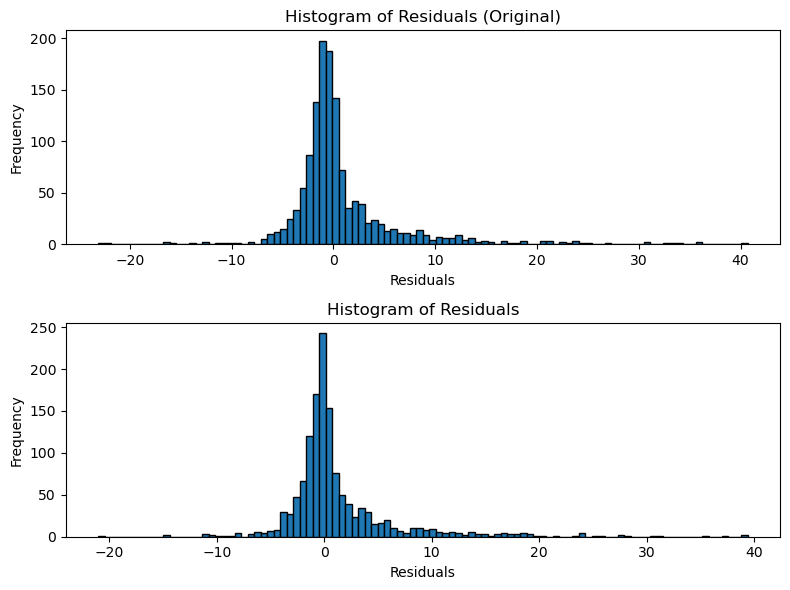

In [855]:
# Assuming you have the predicted and real values as numpy arrays or lists
new_model = keras.models.load_model('Models/pruned_dl_model72_1False4_BoxCoxVars_e_LOS.h5')
new_model.compile(loss = 'mean_squared_error',optimizer = Adamax(learning_rate=0.0001), metrics = ['mae'])

# Assuming you have the predicted and real values for two sets of data as numpy arrays or lists
predicted1 = new_model.predict(X_test_sca)
predicted1 = [i[0].astype(float) for i in predicted1]

predicted1 = inv_boxcox(predicted1, bc_lambda)

real1 = y_test

predicted2 = dl_trained_model_bc.predict(X_test_sca)
predicted2 = [i[0].astype(float) for i in predicted2]

predicted2 = inv_boxcox(predicted2, bc_lambda)
real2 = y_test

residuals_original = real2 - predicted2
residuals_model = real1 - predicted1

print("Kurtosis(Original): ", stats.kurtosis(residuals_original))
print("Kurtosis: ", stats.kurtosis(residuals_model))

# Create the histogram plot
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot the first histogram
axs[0].hist(residuals_original, bins=100, edgecolor='black')
axs[0].set_title('Histogram of Residuals (Original)')
axs[0].set_xlabel('Residuals')
axs[0].set_ylabel('Frequency')

# Plot the second histogram with a different number of bins
axs[1].hist(residuals_model, bins=100, edgecolor='black')
axs[1].set_title('Histogram of Residuals')
axs[1].set_xlabel('Residuals')
axs[1].set_ylabel('Frequency')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

In [795]:
new_model = keras.models.load_model('Models/pruned_dl_model72_1False4_BoxCoxVars_e_LOS.h5')
new_model.compile(loss = 'mean_squared_error',optimizer = Adamax(learning_rate=0.0001), metrics = ['mae'])

y_pred_60 = new_model.predict(X_test_sca)
y_pred_60 = [i[0].astype(float) for i in y_pred_60]

y_pred_60 = inv_boxcox(y_pred_60, bc_lambda)

test_mae_dl = round(mean_absolute_error(y_test, y_pred_60), 3)
test_rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred_60)), 3)
test_r2_dl = round(r2_score(y_test,y_pred_60), 3)
test_tol_dl = round(getTolerance(y_pred_60, y_test, 3), 3)
print("r2: ",test_r2_dl)
print("mae: ",test_mae_dl)
print("rmse: ",test_rmse_dl)
print("tol: ",test_tol_dl)

42/42 [==============================] - 0s 10ms/step
r2:  0.614
mae:  2.866
rmse:  5.437
tol:  74.271


In [711]:
y_pred_60 = new_model.predict(X_test_sca)
y_pred_60 = [i[0].astype(float) for i in y_pred_60]

test_mae_dl = round(mean_absolute_error(y_test, y_pred_60), 3)
test_rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred_60)), 3)
test_r2_dl = round(r2_score(y_test,y_pred_60), 3)
test_tol_dl = round(getTolerance(y_pred_60, y_test, 3), 3)
print("r2: ",test_r2_dl)
print("mae: ",test_mae_dl)
print("rmse: ",test_rmse_dl)
print("tol: ",test_tol_dl)

42/42 [==============================] - 3s 67ms/step
r2:  0.567
mae:  3.633
rmse:  5.76
tol:  61.93


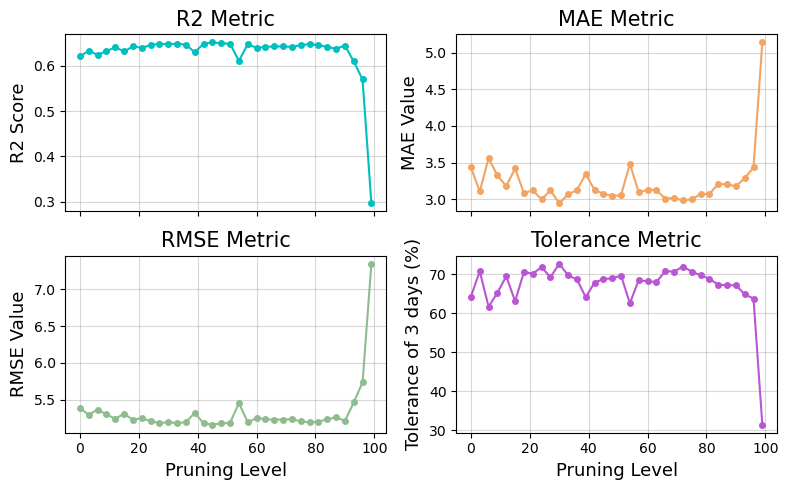

In [146]:
# Sample data
r2 = [0.621, 0.634, 0.624, 0.633, 0.641, 0.632, 0.643, 0.64, 0.646, 0.649, 0.648, 0.649, 0.647, 0.63, 0.649, 0.652, 0.65, 0.649, 0.611, 0.648, 0.64, 0.642, 0.643, 0.643, 0.642, 0.646, 0.648, 0.646, 0.642, 0.638, 0.645, 0.61, 0.57, 0.296]
mae = [3.433, 3.105, 3.558, 3.323, 3.178, 3.419, 3.083, 3.119, 2.997, 3.12, 2.942, 3.065, 3.124, 3.343, 3.125, 3.075, 3.047, 3.05, 3.483, 3.094, 3.127, 3.125, 3.008, 3.013, 2.982, 2.996, 3.069, 3.071, 3.207, 3.203, 3.174, 3.285, 3.434, 5.142]
rmse = [5.389, 5.298, 5.37, 5.303, 5.246, 5.313, 5.231, 5.254, 5.211, 5.187, 5.197, 5.186, 5.2, 5.325, 5.183, 5.165, 5.182, 5.19, 5.459, 5.197, 5.255, 5.238, 5.232, 5.234, 5.239, 5.211, 5.195, 5.205, 5.237, 5.266, 5.216, 5.466, 5.738, 7.344]
tolerance = [64.323, 70.83, 61.705, 65.295, 69.559, 63.126, 70.606, 70.232, 71.877, 69.26, 72.775, 69.783, 68.736, 64.174, 67.913, 68.811, 69.035, 69.708, 62.603, 68.586, 68.212, 68.063, 70.83, 70.755, 72.027, 70.755, 69.783, 68.886, 67.39, 67.24, 67.24, 64.921, 63.8, 31.414]
pruning_level = [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 5), sharex=True)

# Plot R2
axs[0, 0].plot(pruning_level, r2, marker='o', markersize=4, color='c')
axs[0, 0].set_title('R2 Metric', fontsize=15)
axs[0, 0].set_ylabel('R2 Score', fontsize=13)
axs[0, 0].set_ylim()
axs[0, 0].grid(alpha=0.5)

# Plot MAE
axs[0, 1].plot(pruning_level, mae, marker='o', markersize=4, color='sandybrown')
axs[0, 1].set_title('MAE Metric', fontsize=15)
axs[0, 1].set_ylabel('MAE Value', fontsize=13)
axs[0, 1].grid(alpha=0.5)

# Plot RMSE
axs[1, 0].plot(pruning_level, rmse, marker='o', markersize=4, color='darkseagreen')
axs[1, 0].set_title('RMSE Metric', fontsize=15)
axs[1, 0].set_xlabel('Pruning Level', fontsize=13)
axs[1, 0].set_ylabel('RMSE Value', fontsize=13)
axs[1, 0].grid(alpha=0.5)

# Plot Accuracy
axs[1, 1].plot(pruning_level, tolerance, marker='o', markersize=4, color='mediumorchid')
axs[1, 1].set_title('Tolerance Metric', fontsize=15)
axs[1, 1].set_xlabel('Pruning Level', fontsize=13)
axs[1, 1].set_ylabel('Tolerance of 3 days (%)', fontsize=13)
axs[1, 1].grid(alpha=0.5)

# Adjust spacing between subplots
plt.tight_layout()

# Save the plot as an image (optional)
plt.savefig('Images/metrics_plots_Iterative.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

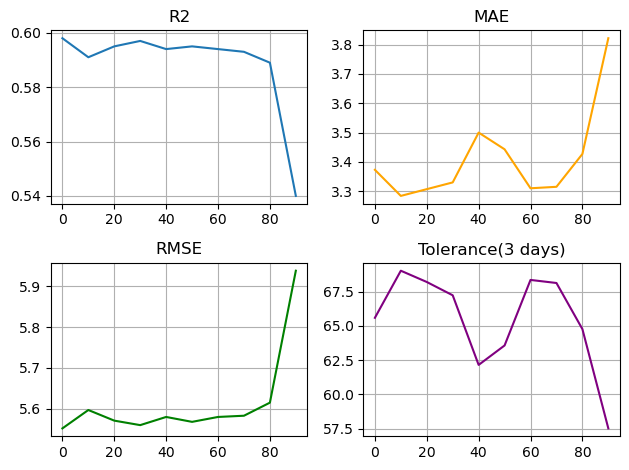

In [877]:
#10steps_1iters_True_6684_32
list_r2_test = [0.598, 0.591, 0.595, 0.597, 0.594, 0.595, 0.594, 0.593, 0.589, 0.54]
list_mae_test = [3.373, 3.284, 3.307, 3.33, 3.5, 3.443, 3.31, 3.315, 3.427, 3.822]
list_rmse_test = [5.552, 5.597, 5.571, 5.56, 5.58, 5.568, 5.58, 5.583, 5.615, 5.938]
list_tol_test = [65.595, 69.035, 68.212, 67.24, 62.154, 63.575, 68.362, 68.138, 64.772, 57.517]
sparsity_levels = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

viewPrune(list_r2_test, list_mae_test, list_rmse_test, list_tol_test, sparsity_levels)

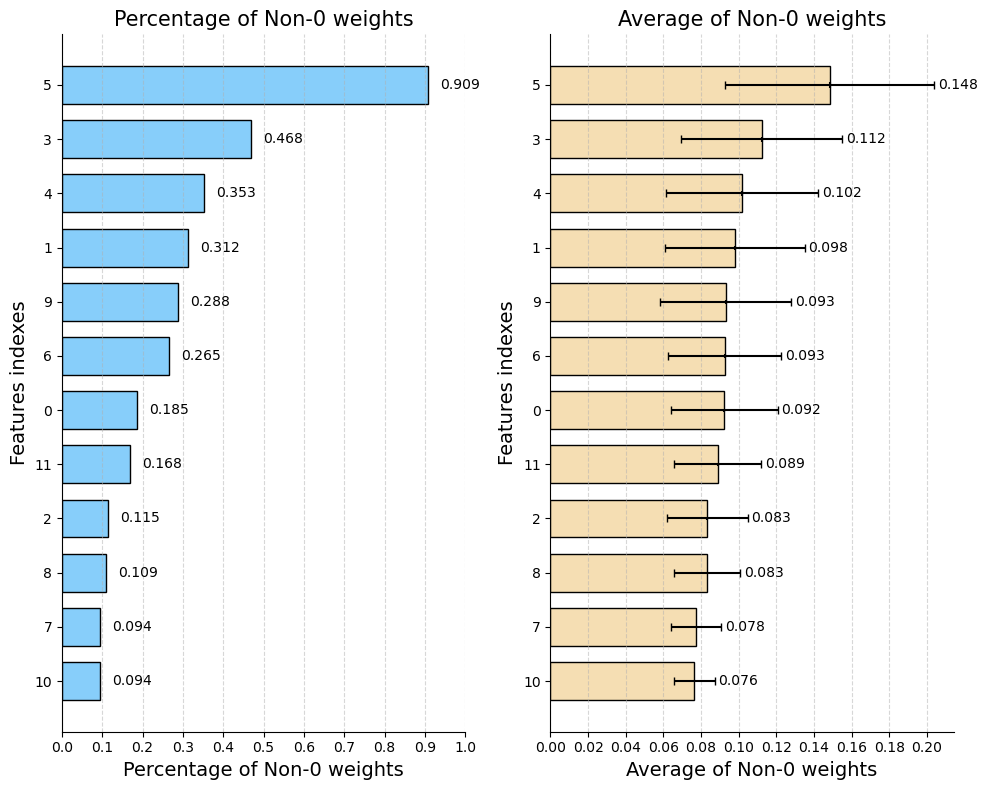

In [3]:
# Sample data
#categories = ['Category A', 'Category B', 'Category C', 'Category D', 'Category E']
#values = [25, 40, 30, 50, 35]

# Extract feature importance
new_model = keras.models.load_model('PruneTest/best_model_False8_12.h5')

model_weights = new_model.get_weights()[0]

# Calculate the number of non-zero weights for each feature
feature_importance_non0 = np.count_nonzero(model_weights, axis=1)

# Calculate the magnitude of each weight for each feature and consider only non-zero weights
feature_importance_avg = [np.abs(weights[weights != 0]).mean() if np.any(weights != 0) else 0 for weights in model_weights]
feature_importance_avg_std = [np.abs(weights[weights != 0]).std() if np.any(weights != 0) else 0 for weights in model_weights]
feature_importance_avg = np.array(feature_importance_avg)
feature_importance_avg_std = np.array(feature_importance_avg_std)

# Normalize the feature importance
normalized_importance_non0 = feature_importance_non0 / np.ma.count(model_weights, axis=1)

# Sort the data in descending order based on values
sorted_data = sorted(zip(normalized_importance_non0, np.arange(0,len(feature_importance_avg)+1)))
sorted_importance_non0, sorted_features_non0 = zip(*sorted_data)

sorted_data = sorted(zip(feature_importance_avg, np.arange(0,len(feature_importance_avg)+1)))
sorted_importance_avg, sorted_features_non0 = zip(*sorted_data)

sorted_data = sorted(zip(feature_importance_avg_std, np.arange(0,len(feature_importance_avg_std)+1)))
sorted_importance_avg_std, sorted_features_non0 = zip(*sorted_data)

sorted_features_non0 = list(map(str, sorted_features_non0))

# Sort the features based on importance
#sorted_features_non0 = np.argsort(normalized_importance_non0)[::-1]

#sorted_importance_non0 = normalized_importance_non0[sorted_indices_non0]
#sorted_importance_avg = feature_importance_avg[sorted_features_non0]
#sorted_importance_avg_std = feature_importance_avg_std[sorted_indices_non0]

# --------------------------------

# Create a figure with two subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))  # Set the figure size for both plots


# Create a horizontal bar plot
#plt.figure(figsize=(6, 8))  # Set the figure size to fit your dissertation layout
bars = ax1.barh(sorted_features_non0, sorted_importance_non0, color='lightskyblue', edgecolor='black', height=0.7)

# Customizing the plot
ax1.set_xlabel('Percentage of Non-0 weights', fontsize = 14)
ax1.set_ylabel('Features indexes', fontsize = 14)
ax1.set_title('Percentage of Non-0 weights', fontsize = 15)
ax1.grid(axis='x', linestyle='--', alpha=0.5)
ax1.set_xticks(np.arange(0, 1.1, 0.1))  # Customize the x-axis tick positions
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# Customize the y-axis to show every category label
ax1.set_yticks(np.arange(len(sorted_features_non0)), sorted_features_non0)

# Add values above the bars
for bar in bars:
    width = bar.get_width()
    ax1.text(width + 0.03, bar.get_y() + bar.get_height() / 2, str(round(width, 3)), ha='left', va='center')

# Create a horizontal bar plot
#plt.figure(figsize=(6, 8))  # Set the figure size to fit your dissertation layout
bars2 = ax2.barh(list(sorted_features_non0), list(sorted_importance_avg), yerr=sorted_importance_avg_std, color='wheat', edgecolor='black', height=0.7)

# Customizing the plot
ax2.set_xlabel('Average of Non-0 weights', fontsize = 14)
ax2.set_ylabel('Features indexes', fontsize = 14)
ax2.set_title('Average of Non-0 weights', fontsize = 15)
ax2.grid(axis='x', linestyle='--', alpha=0.5)
ax2.set_xticks(np.arange(0, 0.31, 0.02))  # Customize the x-axis tick positions
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Customize the y-axis to show every category label
ax2.set_yticks(np.arange(len(sorted_features_non0)), sorted_features_non0)

# Add values above the bars
#for bar in bars2:
#    width = bar.get_width()
#    ax2.text(width + 0.005, bar.get_y() + bar.get_height() / 2, str(round(width, 3)), ha='left', va='center')
    
# Add error bars representing standard deviations
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.errorbar(width, i, xerr=sorted_importance_avg_std[i], fmt='none', color='black', capsize=3)
    # Add values above the bars
    plt.text(width + sorted_importance_avg_std[i] + 0.002, bar.get_y() + bar.get_height() / 2, str(round(width, 3)),
             ha='left', va='center')
    
# Adjust the spacing between the subplots
plt.tight_layout()

# Save the plot as an image (optional)
#plt.savefig('feature_importances.png', bbox_inches='tight', dpi=300)

# Show the plot (optional)
plt.show()

In [139]:
"""
12  -  DuracaoPrescricoes
14  -  NumeroDiagn
11  -  NumPrescricoes
13  -  VMI
8  -  Psicofármaco
1  -  Traqueostomia
28  -  SAPSDoencasCronicas_4.0
25  -  Cateter venoso central
20  -  PaO2_max
2  -  TempoAteAdmissaoUni
24  -  Cateter arterial
17  -  SAPSFiO2
9  -  Opiáceo
26  -  Tubo Orotraqueal
29  -  ServicoId_30
7  -  Vasopressor
3  -  Unique_patient_per_Hosp
15  -  DispositivosNum
21  -  Sonda vesical
10  -  Relaxante muscular
30  -  ServicoId_53
23  -  Sonda nasogástrica
5  -  Antimalárico
4  -  Unique_patient_per_Service
27  -  HospitalRegiaoId_19
22  -  Cateter venoso periférico
19  -  PaCO2_max
31  -  ServicoId_59
18  -  pH_min
0  -  SAPSScore
6  -  Antivírico
16  -  PosicaoProne
32  -  ServicoId_88
"""
for i in sorted_features_non0:
    print(i," - ", X_train_sca.columns[int(i)])

16  -  PosicaoProne
6  -  Antivírico
5  -  Antimalárico
29  -  ServicoId_30
27  -  HospitalRegiaoId_19
20  -  PaO2_max
21  -  Sonda vesical
32  -  ServicoId_88
4  -  Unique_patient_per_Service
10  -  Relaxante muscular
22  -  Cateter venoso periférico
3  -  Unique_patient_per_Hosp
19  -  PaCO2_max
2  -  TempoAteAdmissaoUni
28  -  SAPSDoencasCronicas_4.0
7  -  Vasopressor
30  -  ServicoId_53
17  -  SAPSFiO2
24  -  Cateter arterial
15  -  DispositivosNum
18  -  pH_min
31  -  ServicoId_59
26  -  Tubo Orotraqueal
0  -  SAPSScore
23  -  Sonda nasogástrica
8  -  Psicofármaco
1  -  Traqueostomia
9  -  Opiáceo
25  -  Cateter venoso central
13  -  VMI
14  -  NumeroDiagn
11  -  NumPrescricoes
12  -  DuracaoPrescricoes


## Random Forest

In [ ]:
%time
"""
    Define candidate hyperparameters
"""
#{'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}

hp_candidates_rf = {
     'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}


# Instantiate the grid search model
rf = RandomForestRegressor()

rf_grid = GridSearchCV(estimator = rf, param_grid = hp_candidates_rf,
                           scoring='neg_root_mean_squared_error',
                              cv = 5, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
rf_grid.fit(X_train_sca, y_train)
best_rf_params = rf_grid.best_params_
            
print("Best: ",best_rf_params)  #Best:  {'max_depth': 90, 'n_estimators': 1000}

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best:  {'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


In [81]:
%time
from skopt import BayesSearchCV

param_space = {
    'n_estimators': (700, 1500),
    'max_depth': (80, 140),
    'min_samples_split': (10, 20),
    'min_samples_leaf': (1, 10),
    'max_features': (0.1, 1.0)
}

# Define the random forest model
rf_model_bayes = RandomForestRegressor()

# Perform Bayesian optimization
opt = BayesSearchCV(
    rf_model_bayes,
    param_space,
    n_iter=50,  # Number of iterations for optimization
    cv=cv_val,  # Cross-validation folds
    n_jobs=-1  # Number of parallel jobs (-1 uses all available processors)
)

# Fit the optimization search
opt.fit(X_train_sca, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", opt.best_params_)

Wall time: 0 ns


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

#### Train RF

In [19]:
#OrderedDict([('max_depth', 80), ('max_features', 0.6564448666823638), ('min_samples_leaf', 6), ('min_samples_split', 20), ('n_estimators', 700)])
#OrderedDict([('max_depth', 140), ('max_features', 0.6687322461681839), ('min_samples_leaf', 6), ('min_samples_split', 10), ('n_estimators', 1500)])
#OrderedDict([('max_depth', 82), ('max_features', 0.5621084456191406), ('min_samples_leaf', 5), ('min_samples_split', 10), ('n_estimators', 1043)])
def rf_model():
    return RandomForestRegressor(n_estimators=1043, max_features = 0.5621084456191406, min_samples_split=10, min_samples_leaf=5, max_depth=82)

In [265]:
rf_trained_model = rf_model()

rf_trained_model.fit(X_train_sca, y_train)

RandomForestRegressor(max_depth=82, max_features=0.5621084456191406,
                      min_samples_leaf=5, min_samples_split=10,
                      n_estimators=1043)

In [271]:
y_pred_rf = rf_trained_model.predict(X_test_sca)

mae_rf = round(mean_absolute_error(y_test, y_pred_rf), 3)
rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3)
r2_rf = round(r2_score(y_test,y_pred_rf), 3)
tol_rf = round(getTolerance(y_pred_rf, y_test, 3), 3)
print(r2_rf)
print(mae_rf)
print(rmse_rf)
print(tol_rf)

0.611
3.155
5.459
69.26


# Evaluation with test set

## ------ DL ------

In [20]:
def DL_train(X_train, X_test, y_train, y_test, bc_norm):
        
        """X_train_dl=np.asarray(X_train).astype(float)
        y_train_dl=np.asarray(y_train).astype(float)
        X_test_dl=np.asarray(X_test).astype(float)
        y_test_dl=np.asarray(y_test).astype(float)"""

        model_dl = dl_optimal(X_train)
        
        bc_lambda = 0
        if bc_norm:
            y_train, bc_lambda = BoxCox(y_train)
            y_train = np.ravel(y_train)

        history = model_dl.fit(X_train, y_train,
                                validation_data=(X_test, y_test),
                                epochs=optimal_epochs, batch_size=optimal_batch_size,
                                verbose=0)
        
        y_predicted_dl = model_dl.predict(X_test)
        y_predicted_dl = [i[0].astype(float) for i in y_predicted_dl]

        if bc_norm:
            y_predicted_dl = inv_boxcox(y_predicted_dl, bc_lambda)

        mae_dl = round(mean_absolute_error(y_test, y_predicted_dl), 3)
        rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_predicted_dl)), 3)
        r2_dl = round(r2_score(y_test,y_predicted_dl), 3)
        tol_dl = round(getTolerance(y_predicted_dl, y_test), 3)
        
        return r2_dl, mae_dl, rmse_dl, tol_dl, y_predicted_dl

In [21]:
"""
    Deep Learning - Best Hyper-parameters
"""

def DL_train_n(num, X, y, bc_norm = False, avg_cluster_flag = False):
    
    # Split
    r2_res_dl = []
    rmse_res_dl = []
    mae_res_dl = []
    tol_res_dl = []
    for i in range(num):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        
        """X_train_dl=np.asarray(X_train).astype(float)
        y_train_dl=np.asarray(y_train).astype(float)
        X_test_dl=np.asarray(X_test).astype(float)
        y_test_dl=np.asarray(y_test).astype(float)
        """

        if avg_cluster_flag:
            dl_models_list = []
            for i in range(len(X_list_sca)):
                dl_model = dl_optimal(X_train)
                dl_model.fit(X_list_sca[i].values, y_list[i])
                dl_models_list.append(dl_model)
            
            y_predicted_dl = runClusterPredicion(dl_models_list, X_test)

            mae_dl = round(mean_absolute_error(y_test, y_predicted_dl), 3)
            rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_predicted_dl)), 3)
            r2_dl = round(r2_score(y_test,y_predicted_dl), 3)

        else:
            r2_dl, mae_dl, rmse_dl, tol_dl, y_predicted_dl = DL_train(X_train, X_test, y_train, y_test, bc_norm)

        r2_res_dl.append(r2_dl)
        rmse_res_dl.append(rmse_dl)
        mae_res_dl.append(mae_dl)
        tol_res_dl.append(tol_dl)
        print("R2 mean: ", np.mean(r2_res_dl))
        
    return r2_res_dl, np.mean(r2_res_dl), np.mean(rmse_res_dl), np.mean(mae_res_dl), np.mean(tol_res_dl)

In [22]:
def runDL_cluster(X_list_sca, X_test, y_list, y_test, avg_cluster_flag):
    #final_linear = Lasso(alpha=0.02)
    dl_models_list = []
    for i in range(len(X_list_sca)):
        _dl_model = dl_optimal(X_list_sca[i])
        _dl_model.fit(X_list_sca[i].values, y_list[i],
                                    epochs=80, batch_size=20,
                                    verbose=0)
        dl_models_list.append(_dl_model)


    y_test = np.array(y_test).reshape(-1,1)

    y_pred_dl = runClusterPredicion(dl_models_list, centroids, X_test, avg_cluster_flag)
    y_pred_dl = np.array(y_pred_dl).reshape(-1,1)

    mae_dl = round(mean_absolute_error(y_test, y_pred_dl), 3)
    rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred_dl)), 3)
    r2_dl = round(r2_score(y_test,y_pred_dl), 3)

    return r2_dl, mae_dl, rmse_dl

In [483]:
%%time
box_cox_norm = False
avg_cluster_flag = False
r2_res_dl_list, r2_res_dl, rmse_res_dl, mae_res_dl, tol_res_dl = DL_train_n(10, X_train_sca, y_train, box_cox_norm, avg_cluster_flag)
print(r2_res_dl_list)
print("dl - R2 : ",r2_res_dl)
print("dl - MAE : ",mae_res_dl)
print("dl - RMSE : ",rmse_res_dl)
print("dl - TOL : ",tol_res_dl)

26/26 [==============================] - 0s 3ms/step
R2 mean:  0.526
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.546
26/26 [==============================] - 0s 4ms/step
R2 mean:  0.5566666666666666
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.5569999999999999
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.5538
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.5566666666666666
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.5544285714285714
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.5547500000000001
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.557888888888889
26/26 [==============================] - 0s 3ms/step
R2 mean:  0.5538000000000001
[0.526, 0.566, 0.578, 0.558, 0.541, 0.571, 0.541, 0.557, 0.583, 0.517]
dl - R2 :  0.5538000000000001
dl - MAE :  3.9826
dl - RMSE :  6.510300000000001
dl - TOL :  58.5
Wall time: 6min 8s


In [181]:
"""
    Deep Learning - Best Hyper-parameters


#final_linear = Lasso(alpha=0.02)
dl_models_list = []
for i in range(len(X_list)):
    _dl_model = dl_optimal(X_list[i])
    _dl_model.fit(X_list[i].values, y_list[i],
                                epochs=80, batch_size=20,
                                verbose=0)
    dl_models_list.append(_dl_model)


y_test = np.array(y_test).reshape(-1,1)
print("Test with the best cluster:")


avg_cluster_flag = False
y_pred_dl = runClusterPredicion(dl_models_list, centroids, X_test, avg_cluster_flag)

y_pred_dl = np.array(y_pred_dl).reshape(-1,1)

mae_dl = round(mean_absolute_error(y_test, y_pred_dl), 3)
rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred_dl)), 3)
r2_dl = round(r2_score(y_test,y_pred_dl), 3)
print(r2_dl)
print(mae_dl)
print(rmse_dl)


print("Test with the cluster avearage:")


avg_cluster_flag = True
y_pred_dl = runClusterPredicion(dl_models_list, centroids, X_test, avg_cluster_flag)

y_pred_dl = np.array(y_pred_dl).reshape(-1,1)

mae_dl = round(mean_absolute_error(y_test, y_pred_dl), 3)
rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred_dl)), 3)
r2_dl = round(r2_score(y_test,y_pred_dl), 3)
print(r2_dl)
print(mae_dl)
print(rmse_dl)"""

'\n    Deep Learning - Best Hyper-parameters\n\n\n#final_linear = Lasso(alpha=0.02)\ndl_models_list = []\nfor i in range(len(X_list)):\n    _dl_model = dl_optimal(X_list[i])\n    _dl_model.fit(X_list[i].values, y_list[i],\n                                epochs=80, batch_size=20,\n                                verbose=0)\n    dl_models_list.append(_dl_model)\n\n\ny_test = np.array(y_test).reshape(-1,1)\nprint("Test with the best cluster:")\n\n\navg_cluster_flag = False\ny_pred_dl = runClusterPredicion(dl_models_list, centroids, X_test, avg_cluster_flag)\n\ny_pred_dl = np.array(y_pred_dl).reshape(-1,1)\n\nmae_dl = round(mean_absolute_error(y_test, y_pred_dl), 3)\nrmse_dl = round(np.sqrt(mean_squared_error(y_test, y_pred_dl)), 3)\nr2_dl = round(r2_score(y_test,y_pred_dl), 3)\nprint(r2_dl)\nprint(mae_dl)\nprint(rmse_dl)\n\n\nprint("Test with the cluster avearage:")\n\n\navg_cluster_flag = True\ny_pred_dl = runClusterPredicion(dl_models_list, centroids, X_test, avg_cluster_flag)\n\ny_pre

In [223]:
"""
    Deep Learning - Best Hyper-parameters
"""
"""X_train_dl=np.asarray(X_train).astype(float)
y_train_dl=np.asarray(y_train).astype(float)               # 0.559
                                                                4.572
                                                                7.152
X_test_dl=np.asarray(X_test).astype(float)
y_test_dl=np.asarray(y_test).astype(float)"""

#model_dl = dl_optimal(X_train)
"""history = model_dl.fit(X_train_dl, y_train_dl,
                                validation_data=(X_test_dl, y_test_dl),
                                epochs=50, batch_size=10,
                                verbose=0)
#X_train, X_test, y_train, y_test = train_test_split(X_sca, y, test_size = 0.2)

#  ----------------- WITHout BOX COX
history = model_dl.fit(X_train_sca, y_train,
                                validation_data=(X_test_sca, y_test),
                                epochs=optimal_epochs, batch_size=optimal_batch_size,
                                verbose=0)
y_predicted_dl = model_dl.predict(X_test_sca)
y_predicted_dl = [i[0].astype(float) for i in y_predicted_dl]

mae_dl = round(mean_absolute_error(y_test, y_predicted_dl), 3)
rmse_dl = round(np.sqrt(mean_squared_error(y_test, y_predicted_dl)), 3)
r2_dl = round(r2_score(y_test,y_predicted_dl), 3)
print(r2_dl)
print(mae_dl)
print(rmse_dl)

# -------------------- WITH BOX COX
model_dl = dl_optimal(X_train_sca)

y_train_bc, bc_lambda = BoxCox(y_train)
y_train_bc = np.ravel(y_train_bc)

y_test_bc, bc_lambda_test = BoxCox(y_test)
y_test_bc = np.ravel(y_test_bc)

history_bc = model_dl.fit(X_train_sca, y_train_bc,
                                validation_data=(X_test_sca, y_test_bc),
                                epochs=optimal_epochs, batch_size=optimal_batch_size,
                                verbose=0)
y_predicted_dl_bc = model_dl.predict(X_test_sca)
y_predicted_dl_bc = [i[0].astype(float) for i in y_predicted_dl_bc]

y_predicted_dl_bc = inv_boxcox(y_predicted_dl_bc, bc_lambda)
y_test_bc = inv_boxcox(y_test_bc, bc_lambda_test)

mae_dl = round(mean_absolute_error(y_test_bc, y_predicted_dl_bc), 3)
rmse_dl = round(np.sqrt(mean_squared_error(y_test_bc, y_predicted_dl_bc)), 3)
r2_dl = round(r2_score(y_test_bc,y_predicted_dl_bc), 3)
print(r2_dl)
print(mae_dl)
print(rmse_dl)"""

'history = model_dl.fit(X_train_dl, y_train_dl,\n                                validation_data=(X_test_dl, y_test_dl),\n                                epochs=50, batch_size=10,\n                                verbose=0)\n#X_train, X_test, y_train, y_test = train_test_split(X_sca, y, test_size = 0.2)\n\n#  ----------------- WITHout BOX COX\nhistory = model_dl.fit(X_train_sca, y_train,\n                                validation_data=(X_test_sca, y_test),\n                                epochs=optimal_epochs, batch_size=optimal_batch_size,\n                                verbose=0)\ny_predicted_dl = model_dl.predict(X_test_sca)\ny_predicted_dl = [i[0].astype(float) for i in y_predicted_dl]\n\nmae_dl = round(mean_absolute_error(y_test, y_predicted_dl), 3)\nrmse_dl = round(np.sqrt(mean_squared_error(y_test, y_predicted_dl)), 3)\nr2_dl = round(r2_score(y_test,y_predicted_dl), 3)\nprint(r2_dl)\nprint(mae_dl)\nprint(rmse_dl)\n\n# -------------------- WITH BOX COX\nmodel_dl = dl_optimal(

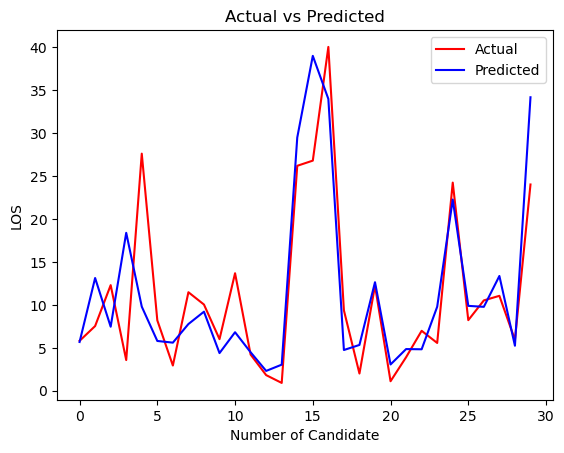

In [1800]:
"""for i in range(len(X_test[28])):
    print(list(df_v2.columns)[i+1], ":",X_test[10][i])
print(y_test[10])
print(y_predicted_dl[10])"""
#Visualising the Acutal and predicted Result of first 30 examples
plt.plot(list(y_test)[:30], color = 'red', label = 'Actual')
plt.plot(y_predicted_dl[:30], color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [183]:
# define the model
"""model = dl_optimal(X_test_sca)
# fit the model
model.fit(X_test_sca, y, verbose=0)
n_repeats = 200
colnames = list(X_test_sca.columns)
permutate_df_dl = get_permutation_importance(X_test_sca, y, model, colnames, n_repeats)
permutate_df_dl.sort_values('permutation_importance', 
                   ascending=False)[
                                    ['Feature','permutation_importance'
                                    ]
                                  ][:100].style.background_gradient(cmap='Blues')"""

"model = dl_optimal(X_test_sca)\n# fit the model\nmodel.fit(X_test_sca, y, verbose=0)\nn_repeats = 200\ncolnames = list(X_test_sca.columns)\npermutate_df_dl = get_permutation_importance(X_test_sca, y, model, colnames, n_repeats)\npermutate_df_dl.sort_values('permutation_importance', \n                   ascending=False)[\n                                    ['Feature','permutation_importance'\n                                    ]\n                                  ][:100].style.background_gradient(cmap='Blues')"

## ------ RF ------

In [98]:
"""
    Random Forest - Best Hyper-parameters
"""
def RF_train(X_train, X_test, y_train, y_test, bc_norm):
    r_forest_final = rf_model()

    bc_lambda = 0
    if bc_norm:
        y_train, bc_lambda = BoxCox(y_train)
        y_train = np.ravel(y_train)
    
    r_forest_final.fit(X_train, y_train)
    y_pred_rf = r_forest_final.predict(X_test)

    if bc_norm:
        y_pred_rf = inv_boxcox(y_pred_rf, bc_lambda)

    mae_rf = round(mean_absolute_error(y_test, y_pred_rf), 3)
    rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3)
    r2_rf = round(r2_score(y_test,y_pred_rf), 3)
    tol_rf = round(getTolerance(y_pred_rf, y_test), 3)
    
    return r2_rf, mae_rf, rmse_rf, tol_rf, y_pred_rf

In [99]:
"""
    Random Forest - Best Hyper-parameters
"""
def RF_train_n(k_cv, X, y, bc_norm = False, avg_cluster_flag = False):
    
        # Split
        r2_res_rf = []
        rmse_res_rf = []
        mae_res_rf = []
        tol_res_rf = []

        #k_fold = KFold(n_splits=k_cv, shuffle=True, random_state=0)
        #for train_indexes, test_indexes in k_fold.split(X,y):
        for i in range(k_cv):
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

                #X_train, X_test = X.iloc[train_indexes], X.iloc[test_indexes]
                #y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]
                r_forest_final = rf_model()

                if avg_cluster_flag:
                        models_list = []
                        for i in range(len(X_list_sca)):
                                _rf_model = rf_model()
                                _rf_model.fit(X_list_sca[i].values, y_list[i])
                                models_list.append(_rf_model)
                        
                        y_pred_linear = AVGClusterPredicion(models_list, X_test)

                        mae_rf = round(mean_absolute_error(y_test, y_pred_linear), 3)
                        rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 3)
                        r2_rf = round(r2_score(y_test,y_pred_linear), 3)

                else:
                        r2_rf, mae_rf, rmse_rf, tol_rf, y_pred_rf = RF_train(X_train, X_test, y_train, y_test, bc_norm)

                r2_res_rf.append(r2_rf)
                rmse_res_rf.append(rmse_rf)
                mae_res_rf.append(mae_rf)
                tol_res_rf.append(tol_rf)
        
        return r2_res_rf, np.mean(r2_res_rf), np.mean(rmse_res_rf), np.mean(mae_res_rf), np.mean(tol_res_rf)

In [100]:
def runRF_cluster(X_list_sca, X_test, y_list, y_test, avg_cluster_flag):
    #final_linear = Lasso(alpha=0.02)
    rf_models_list = []
    for i in range(len(X_list_sca)):
        _rf_model = rf_model()
        _rf_model.fit(X_list_sca[i].values, y_list[i])
        rf_models_list.append(_rf_model)


    #y_test = np.array(y_test).reshape(-1,1)

    y_pred_rf = runClusterPredicion(rf_models_list, centroids, X_test, avg_cluster_flag)
    #y_pred_dl = np.array(y_pred_dl).reshape(-1,1)

    mae_rf = round(mean_absolute_error(y_test, y_pred_rf), 3)
    rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3)
    r2_rf = round(r2_score(y_test,y_pred_rf), 3)

    return r2_rf, mae_rf, rmse_rf

In [533]:
%%time

box_cox_norm = False
avg_cluster_flag = False
#y_exp = 2**y
r2_res_rf_list, r2_res_rf, rmse_res_rf, mae_res_rf, tol_res_rf = RF_train_n(20, X_train_sca, y_train, box_cox_norm, avg_cluster_flag)
print(r2_res_rf_list)
print("rf - R2 : ",r2_res_rf)
print("rf - MAE : ",mae_res_rf)
print("rf - RMSE : ",rmse_res_rf)
print("rf - RMSE : ",tol_res_rf)

[0.671, 0.628, 0.644, 0.598, 0.627, 0.602, 0.634, 0.59, 0.644, 0.581, 0.594, 0.61, 0.685, 0.586, 0.626, 0.62, 0.633, 0.593, 0.632, 0.61]
rf - R2 :  0.6204
rf - MAE :  3.3999
rf - RMSE :  6.01985
rf - RMSE :  67.01395000000001
Wall time: 4min 52s


In [ ]:
"""   

Features: 17
Examples: 1795
Features: 17
Examples: 3813
Features: 17
Examples: 674
Features: 17
Examples: 183
Features: 17
Examples: 148

----- 3 clusters ------
1:
    rf - R2 :  0.4084666666666667
    rf - MAE :  3.7789
    rf - RMSE :  6.789699999999998
2:
    rf - R2 :  0.4511999999999999
    rf - MAE :  8.5353
    rf - RMSE :  11.5056
3:
    rf - R2 :  0.5324500000000001
    rf - MAE :  5.03705
    rf - RMSE :  7.71080000000000
    
        ------ 5 clsusters --------
1:
    rf - R2 :  0.4704
    rf - MAE :  4.943099999999999
    rf - RMSE :  7.850149999999999
2:
    rf - R2 :  0.40315
    rf - MAE :  3.6199
    rf - RMSE :  6.366049999999999
3:
    rf - R2 :  0.48834999999999995
    rf - MAE :  6.2656
    rf - RMSE :  9.219150000000003
4:
    rf - R2 :  0.46900000000000003
    rf - MAE :  8.970849999999999
    rf - RMSE :  12.679099999999998
5:
    rf - R2 :  0.4511499999999999
    rf - MAE :  7.75655
    rf - RMSE :  10.32395
    
"""

'   ----- 3 clusters ------\n1:\n    rf - R2 :  0.4084666666666667\n    rf - MAE :  3.7789\n    rf - RMSE :  6.789699999999998\n2:\n    rf - R2 :  0.4511999999999999\n    rf - MAE :  8.5353\n    rf - RMSE :  11.5056\n3:\n    rf - R2 :  0.5324500000000001\n    rf - MAE :  5.03705\n    rf - RMSE :  7.71080000000000\n    \n        ------ 5 clsusters --------\n1:\n    rf - R2 :  0.4704\n    rf - MAE :  4.943099999999999\n    rf - RMSE :  7.850149999999999\n2:\n    rf - R2 :  0.40315\n    rf - MAE :  3.6199\n    rf - RMSE :  6.366049999999999\n3:\n    rf - R2 :  0.48834999999999995\n    rf - MAE :  6.2656\n    rf - RMSE :  9.219150000000003\n4:\n    rf - R2 :  0.46900000000000003\n    rf - MAE :  8.970849999999999\n    rf - RMSE :  12.679099999999998\n5:\n    rf - R2 :  0.4511499999999999\n    rf - MAE :  7.75655\n    rf - RMSE :  10.32395\n    \n'

In [237]:
"""
    TEST Normal
"""
r_forest_final = rf_model()

#y_bc = np.ravel(y)

#X_train, X_test, y_train, y_test = train_test_split(X_sca, y, test_size = 0.2)
#y_train_bc, lam = BoxCox(y_train)
#y_test_bc, lam = BoxCox(y_test)

#y_train_bc = np.ravel(y_train_bc)
#y_test_bc = np.ravel(y_test_bc)

r_forest_final.fit(X_train_sca, y_train)
y_pred_rf = r_forest_final.predict(X_test_sca)

#print(y_pred_rf)
#y_pred_rf_bc = inv_boxcox(y_pred_rf_bc, lam)

#y_test_bc = inv_boxcox(y_test_bc, lam)

mae_rf = round(mean_absolute_error(y_test, y_pred_rf), 3)
rmse_rf = round(np.sqrt(mean_squared_error(y_test, y_pred_rf)), 3)
r2_rf = round(r2_score(y_test,y_pred_rf), 3)
print(r2_rf)
print(mae_rf)
print(rmse_rf)

0.6
3.413
5.772


In [238]:
actual_vs_predict = pd.DataFrame({'Real Value': y_test,
                                  'Predicted Value': y_pred_rf})
actual_vs_predict.sample(10)

Real Value  Predicted Value
7138     6.60833         5.426737
5953     2.19583         4.339445
3762    15.11458        14.578852
414      3.52222         6.883762
2760    13.93125        15.425357
6615     3.91736         7.140809
7488    12.00069         9.917807
8079     2.70833         3.558943
7742     2.91806         5.308861
6478     1.84097        29.754462

In [188]:
"""residuals_rf_1 = np.array(y_test) - np.array(y_pred_rf_bc)
residuals_rf_2 = np.array(y_test) - np.array(y_pred_rf)
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(12, 4)
ax1.hist(residuals_rf_1, bins = 200,  alpha=0.8) # you may select the no. of bins  
ax2.hist(residuals_rf_2, bins = 200,  alpha=0.8) # you may select the no. of bins  """

'residuals_rf_1 = np.array(y_test) - np.array(y_pred_rf_bc)\nresiduals_rf_2 = np.array(y_test) - np.array(y_pred_rf)\nfig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)\nfig.set_size_inches(12, 4)\nax1.hist(residuals_rf_1, bins = 200,  alpha=0.8) # you may select the no. of bins  \nax2.hist(residuals_rf_2, bins = 200,  alpha=0.8) # you may select the no. of bins  '

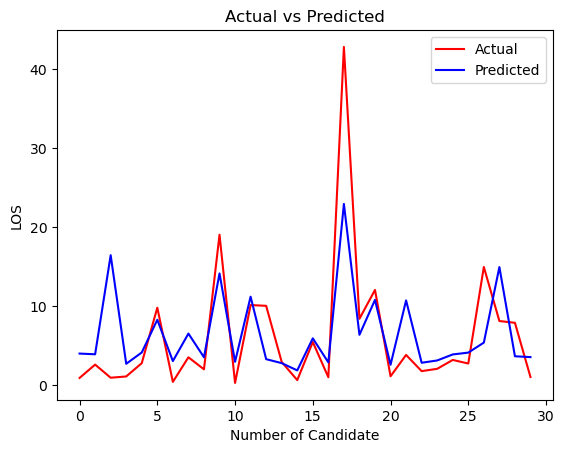

In [ ]:
#### Visualising the Acutal and predicted Result of first 30 examples
plt.plot(np.array(y_test)[:30], color = 'red', label = 'Actual')
plt.plot(list(y_pred_rf[:30]), color = 'blue', label = 'Predicted')
plt.xlabel('Number of Candidate')
plt.ylabel('LOS')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

## ------ LR ------

In [101]:
"""
    Linear Regression - Best Hyper-parameters
"""
def LR_train(X_train, X_test, y_train, y_test, bc_norm):
        
        final_lr = LinearRegression()        

        bc_lambda = 0
        if bc_norm:
            y_train, bc_lambda = BoxCox(y_train)
            y_train = np.ravel(y_train)

        final_lr.fit(X_train, y_train)
        y_pred_lr = final_lr.predict(X_test)

        if bc_norm:
            y_pred_lr = inv_boxcox(y_pred_lr, bc_lambda)
        
        #print(y_pred_lr)
        mae_lr = round(mean_absolute_error(y_test, y_pred_lr), 3)
        rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 3)
        r2_lr = round(r2_score(y_test,y_pred_lr), 3)
        tol_lr = round(getTolerance(y_pred_lr, y_test), 3)
        
        return r2_lr, mae_lr, rmse_lr, tol_lr, y_pred_lr

In [102]:
"""
    Linear Regression - Best Hyper-parameters
"""
def LR_train_n(num, X, y, bc_norm = False, cluster_flag = False):
    
    # Split
    r2_res_lr = []
    rmse_res_lr = []
    mae_res_lr = []
    tol_res_lr = []
    
    for i in range(num):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        if cluster_flag:
            linear_models_list = []
            for i in range(len(X_list_sca)):
                linear_model = LinearRegression()
                linear_model.fit(X_list_sca[i].values, y_list[i])
                linear_models_list.append(linear_model)
            
            y_pred_linear = runClusterPredicion(linear_models_list, centroids, X_test, False)

            mae_lr = round(mean_absolute_error(y_test, y_pred_linear), 3)
            rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 3)
            r2_lr = round(r2_score(y_test,y_pred_linear), 3)
            tol_lr = round(getTolerance(pd.Series(y_pred_linear), y_test, precision_tolerance), 3)

        else:
            r2_lr, mae_lr, rmse_lr, tol_lr, y_pred_lr = LR_train(X_train, X_test, y_train, y_test, bc_norm)

    
        r2_res_lr.append(r2_lr)
        rmse_res_lr.append(rmse_lr)
        mae_res_lr.append(mae_lr)
        tol_res_lr.append(tol_lr)
        
    return np.mean(r2_res_lr), np.mean(rmse_res_lr), np.mean(mae_res_lr), np.mean(tol_res_lr)

In [103]:
def runLR_cluster(X_list_sca, X_test, y_list, y_test, avg_cluster_flag):
    #final_linear = Lasso(alpha=0.02)
    lr_models_list = []
    for i in range(len(X_list_sca)):
        _lr_model = LinearRegression()
        _lr_model.fit(X_list_sca[i].values, y_list[i])
        lr_models_list.append(_lr_model)


    #y_test = np.array(y_test).reshape(-1,1)

    y_pred_lr = runClusterPredicion(lr_models_list, centroids, X_test, avg_cluster_flag)
    #y_pred_dl = np.array(y_pred_dl).reshape(-1,1)

    mae_lr = round(mean_absolute_error(y_test, y_pred_lr), 3)
    rmse_lr = round(np.sqrt(mean_squared_error(y_test, y_pred_lr)), 3)
    r2_lr = round(r2_score(y_test,y_pred_lr), 3)

    return r2_lr, mae_lr, rmse_lr

In [482]:
%%time
"""lr - R2 :  0.579566
lr - MAE :  4.15284
lr - RMSE :  6.650168

lr - R2 :  0.579024
lr - MAE :  4.046708
lr - RMSE :  6.672814000000001
"""
bc_norm = False
avg_cluster_flag = False
r2_res_lr, rmse_res_lr, mae_res_lr, tol_res_lr = LR_train_n(300, X_train_sca, y_train, bc_norm, avg_cluster_flag)
print("lr - R2 : ",r2_res_lr)
print("lr - MAE : ",mae_res_lr)
print("lr - RMSE : ",rmse_res_lr)
print("lr - TOL : ",tol_res_lr)

lr - R2 :  0.5672133333333332
lr - MAE :  3.9593833333333337
lr - RMSE :  6.359826666666666
lr - TOL :  57.55324666666667
Wall time: 3.38 s


In [332]:
"""
    Linear Regression - Best Hyper-parameters
"""

#final_linear = Lasso(alpha=0.02)
linear_models_list = []
for i in range(len(X_list_sca)):
    linear_model = LinearRegression()
    linear_model.fit(X_list_sca[i].values, y_list[i])
    linear_models_list.append(linear_model)

"""
0.547
4.009
7.105
"""
print("Test with the best cluster:")

avg_cluster_flag = False
y_pred_linear = runClusterPredicion(linear_models_list, centroids, X_test_sca, avg_cluster_flag)

#y_pred_linear = inv_boxcox(y_pred_linear, bc_lambda)

mae_linear = round(mean_absolute_error(y_test, y_pred_linear), 3)
rmse_linear = round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 3)
r2_linear = round(r2_score(y_test,y_pred_linear), 3)
print(r2_linear)
print(mae_linear)
print(rmse_linear)


print("Test with the cluster avearage:")

avg_cluster_flag = True
y_pred_linear = runClusterPredicion(linear_models_list, centroids, X_test_sca, avg_cluster_flag)

#y_pred_linear = inv_boxcox(y_pred_linear, bc_lambda)

mae_linear = round(mean_absolute_error(y_test, y_pred_linear), 3)
rmse_linear = round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 3)
r2_linear = round(r2_score(y_test,y_pred_linear), 3)
print(r2_linear)
print(mae_linear)
print(rmse_linear)

Test with the best cluster:
0.494
4.335
6.513
Test with the cluster avearage:
0.551
3.998
6.136


In [299]:

"""
"""
final_linear = LinearRegression()

y_train_bc, bc_lambda = BoxCox(y_train)
y_train_bc = np.ravel(y_train_bc)

final_linear.fit(X_train_sca, y_train_bc)
y_pred_linear_tranf = final_linear.predict(X_test_sca)

y_pred_linear_bc = inv_boxcox(y_pred_linear_tranf, bc_lambda)

y_pred_linear_bc = np.array(y_pred_linear_bc).reshape(-1,1)

y_test = np.array(y_test).reshape(-1,1)

mae_linear = round(mean_absolute_error(y_test, y_pred_linear_bc), 3)
rmse_linear = round(np.sqrt(mean_squared_error(y_test, y_pred_linear_bc)), 3)
r2_linear = round(r2_score(y_test,y_pred_linear_bc), 3)
print(r2_linear)
print(mae_linear)
print(rmse_linear)

# Without boxcox

final_linear = LinearRegression()

final_linear.fit(X_train_sca, y_train)
y_pred_linear = final_linear.predict(X_test_sca)

y_pred_linear = np.array(y_pred_linear).reshape(-1,1)

mae_linear = round(mean_absolute_error(y_test, y_pred_linear), 3)
rmse_linear = round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 3)
r2_linear = round(r2_score(y_test,y_pred_linear), 3)
print(r2_linear)
print(mae_linear)
print(rmse_linear)

0.585
3.002
5.641
0.53
3.964
6.0


In [412]:
"""
    Linear Regression - Best Hyper-parameters
"""

#final_linear = Lasso(alpha=0.02)
final_linear = LinearRegression()

final_linear.fit(X_train_sca, y_train)
y_pred_linear = final_linear.predict(X_test_sca)

mae_linear = round(mean_absolute_error(y_test, y_pred_linear), 3)
rmse_linear = round(np.sqrt(mean_squared_error(y_test, y_pred_linear)), 3)
r2_linear = round(r2_score(y_test,y_pred_linear), 3)
print(r2_linear)
print(mae_linear)
print(rmse_linear)

0.58
3.471
5.673


In [327]:
"""
    Get the precision tolerance
"""
tol_lr = getTolerance(y_pred_linear, y_test)
print("Precision(difference<3days) : ", tol_lr)

Precision(difference<3days) :  58.22784810126582


In [329]:
y_pred_linear = final_linear.predict(X_train_sca)

mae_linear = round(mean_absolute_error(y_train, y_pred_linear), 3)
rmse_linear = round(np.sqrt(mean_squared_error(y_train, y_pred_linear)), 3)
r2_linear = round(r2_score(y_train,y_pred_linear), 3)
print(r2_linear)
print(mae_linear)
print(rmse_linear)

0.587
4.004
6.602


# Models Comparison

In [120]:
def evalModels(X_train, X_test, y_train, y_test, box_cox_norm):
    # DL
    print("Predicting DL...")
    r2_dl, mae_dl, rmse_dl, tol_dl, y_pred_dl = DL_train(X_train, X_test, y_train, y_test, box_cox_norm)

    #RF
    print("Predicting RF...")
    r2_rf, mae_rf, rmse_rf, tol_rf, y_pred_rf = RF_train(X_train, X_test, y_train, y_test, box_cox_norm)
        
    #LR
    print("Predicting LR...")
    r2_lr, mae_lr, rmse_lr, tol_lr, y_pred_lr = LR_train(X_train, X_test, y_train, y_test, box_cox_norm)

    return r2_dl, mae_dl, rmse_dl, tol_dl, y_pred_dl, r2_rf, mae_rf, rmse_rf, tol_rf, y_pred_rf, r2_lr, mae_lr, rmse_lr, tol_lr, y_pred_lr

In [193]:
box_cox_norm_test = False

r2_dl_test, mae_dl_test, rmse_dl_test, tol_dl_test, y_pred_dl_test, r2_rf_test, mae_rf_test, rmse_rf_test, tol_rf_test, y_pred_rf_test, r2_lr_test, mae_lr_test, rmse_lr_test, tol_lr_test, y_pred_lr_test = evalModels(X_train_sca, X_test_sca, y_train, y_test, box_cox_norm_test)

print("DL -- R2 (mean+-std): ",r2_dl_test)
print("DL -- MAE (mean+-std): ",mae_dl_test)
print("DL -- RMSE (mean+-std): ",rmse_dl_test)
print("DL -- TOL (mean+-std): ",tol_dl_test)

print("RF -- R2 (mean+-std): ",r2_rf_test)
print("RF -- MAE (mean+-std): ",mae_rf_test)
print("RF -- RMSE (mean+-std): ",rmse_rf_test)
print("RF -- TOL (mean+-std): ",tol_rf_test)

print("LR -- R2 (mean+-std): ",r2_lr_test)
print("LR -- MAE (mean+-std): ",mae_lr_test)
print("LR -- RMSE (mean+-std): ",rmse_lr_test)
print("LR -- TOL (mean+-std): ",tol_lr_test)

# Calculate metrics for real values
real_mean = np.mean(y_test)
real_median = np.median(y_test)
real_max = np.max(y_test)
real_min = np.min(y_test)

# Calculate metrics for predicted values
dl_mean = np.mean(y_pred_dl_test)
dl_median = np.median(y_pred_dl_test)
dl_max = np.max(y_pred_dl_test)
dl_min = np.min(y_pred_dl_test)

rf_mean = np.mean(y_pred_rf_test)
rf_median = np.median(y_pred_rf_test)
rf_max = np.max(y_pred_rf_test)
rf_min = np.min(y_pred_rf_test)

lr_mean = np.mean(y_pred_lr_test)
lr_median = np.median(y_pred_lr_test)
lr_max = np.max(y_pred_lr_test)
lr_min = np.min(y_pred_lr_test)

# Calculate metrics for residuals
dl_residuals = y_test - y_pred_dl_test
dl_residual_mean = np.mean(dl_residuals)
dl_residual_skewness = stats.skew(dl_residuals)
dl_residual_kurtosis = stats.kurtosis(dl_residuals)
dl_residual_min = np.min(dl_residuals)
dl_residual_max = np.max(dl_residuals)

rf_residuals = y_test - y_pred_rf_test
rf_residual_mean = np.mean(rf_residuals)
rf_residual_skewness = stats.skew(rf_residuals)
rf_residual_kurtosis = stats.kurtosis(rf_residuals)
rf_residual_min = np.min(rf_residuals)
rf_residual_max = np.max(rf_residuals)

lr_residuals = y_test - y_pred_lr_test
lr_residual_mean = np.mean(lr_residuals)
lr_residual_skewness = stats.skew(lr_residuals)
lr_residual_kurtosis = stats.kurtosis(lr_residuals)
lr_residual_min = np.min(lr_residuals)
lr_residual_max = np.max(lr_residuals)

print("Metrics for Real Values:")
print("Mean:", real_mean)
print("Median:", real_median)
print("Max:", real_max)
print("Min:", real_min)
print()

# Create a summary dataframe
summary_data = {
    'Metric': ['Mean', 'Median', 'Max', 'Min', 'Residual Mean', 'Residual Skewness', 'Residual Kurtosis', 'Residual Min', 'Residual Max'],
    'DL Predicted': [dl_mean, dl_median, dl_max, dl_min, dl_residual_mean, dl_residual_skewness, dl_residual_kurtosis, dl_residual_min, dl_residual_max],
    'RF Predicted': [rf_mean, rf_median, rf_max, rf_min, rf_residual_mean, rf_residual_skewness, rf_residual_kurtosis, rf_residual_min, rf_residual_max],
    'LR Predicted': [lr_mean, lr_median, lr_max, lr_min, lr_residual_mean, lr_residual_skewness, lr_residual_kurtosis, lr_residual_min, lr_residual_max]
}

summary_df = pd.DataFrame(summary_data)

print(summary_df)

Predicting DL...
42/42 [==============================] - 0s 3ms/step
Predicting RF...
Predicting LR...
DL -- R2 (mean+-std):  0.616
DL -- MAE (mean+-std):  3.288
DL -- RMSE (mean+-std):  5.349
DL -- TOL (mean+-std):  67.764
RF -- R2 (mean+-std):  0.634
RF -- MAE (mean+-std):  3.117
RF -- RMSE (mean+-std):  5.217
RF -- TOL (mean+-std):  68.512
LR -- R2 (mean+-std):  0.612
LR -- MAE (mean+-std):  3.423
LR -- RMSE (mean+-std):  5.372
LR -- TOL (mean+-std):  64.024
Metrics for Real Values:
Mean: 7.861078833208661
Median: 4.99583
Max: 67.80417
Min: 0.25

              Metric  DL Predicted  RF Predicted  LR Predicted
0               Mean      7.785456      8.137079      8.144634
1             Median      5.569903      6.109225      6.090768
2                Max     51.270027     46.792562     53.841511
3                Min     -2.534569      0.729846     -2.542032
4      Residual Mean      0.075622     -0.276000     -0.283556
5  Residual Skewness      1.865092      2.279806      1.895977
6 

In [127]:
# Calculate metrics for real values
real_mean = np.mean(y_test)
real_median = np.median(y_test)
real_max = np.max(y_test)
real_min = np.min(y_test)

# Calculate metrics for predicted values
dl_mean = np.mean(y_pred_dl_test)
dl_median = np.median(y_pred_dl_test)
dl_max = np.max(y_pred_dl_test)
dl_min = np.min(y_pred_dl_test)

rf_mean = np.mean(y_pred_rf_test)
rf_median = np.median(y_pred_rf_test)
rf_max = np.max(y_pred_rf_test)
rf_min = np.min(y_pred_rf_test)

lr_mean = np.mean(y_pred_lr_test)
lr_median = np.median(y_pred_lr_test)
lr_max = np.max(y_pred_lr_test)
lr_min = np.min(y_pred_lr_test)

# Calculate metrics for residuals
dl_residuals = y_test - y_pred_dl_test
dl_residual_mean = np.mean(dl_residuals)
dl_residual_skewness = stats.skew(dl_residuals)
dl_residual_kurtosis = stats.kurtosis(dl_residuals)
dl_residual_min = np.min(dl_residuals)
dl_residual_max = np.max(dl_residuals)

rf_residuals = y_test - y_pred_rf_test
rf_residual_mean = np.mean(rf_residuals)
rf_residual_skewness = stats.skew(rf_residuals)
rf_residual_kurtosis = stats.kurtosis(rf_residuals)
rf_residual_min = np.min(rf_residuals)
rf_residual_max = np.max(rf_residuals)

lr_residuals = y_test - y_pred_lr_test
lr_residual_mean = np.mean(lr_residuals)
lr_residual_skewness = stats.skew(lr_residuals)
lr_residual_kurtosis = stats.kurtosis(lr_residuals)
lr_residual_min = np.min(lr_residuals)
lr_residual_max = np.max(lr_residuals)

print("Metrics for Real Values:")
print("Mean:", real_mean)
print("Median:", real_median)
print("Max:", real_max)
print("Min:", real_min)
print()
print("DL Residuals Std:", np.std(dl_residuals))
print("RF Residuals Std:", np.std(rf_residuals))
print("LR Residuals Std:", np.std(lr_residuals))
# Create a summary dataframe
summary_data = {
    'Metric': ['Mean', 'Median', 'Max', 'Min', 'Residual Mean', 'Residual Skewness', 'Residual Kurtosis', 'Residual Min', 'Residual Max'],
    'DL Predicted': [dl_mean, dl_median, dl_max, dl_min, dl_residual_mean, dl_residual_skewness, dl_residual_kurtosis, dl_residual_min, dl_residual_max],
    'RF Predicted': [rf_mean, rf_median, rf_max, rf_min, rf_residual_mean, rf_residual_skewness, rf_residual_kurtosis, rf_residual_min, rf_residual_max],
    'LR Predicted': [lr_mean, lr_median, lr_max, lr_min, lr_residual_mean, lr_residual_skewness, lr_residual_kurtosis, lr_residual_min, lr_residual_max]
}

summary_df = pd.DataFrame(summary_data)

print(summary_df)

Metrics for Real Values:
Mean: 7.861078833208661
Median: 4.99583
Max: 67.80417
Min: 0.25

DL Residuals Std: 5.335860877529757
RF Residuals Std: 5.2212799751575005
LR Residuals Std: 5.364498052081597
              Metric  DL Predicted  RF Predicted  LR Predicted
0               Mean      8.120155      8.132288      8.144634
1             Median      5.940359      6.073682      6.090768
2                Max     50.436863     46.408789     53.841511
3                Min     -1.906847      0.707766     -2.542032
4      Residual Mean     -0.259076     -0.271209     -0.283556
5  Residual Skewness      1.932321      2.269333      1.895977
6  Residual Kurtosis      9.630374     12.300496      9.470419
7       Residual Min    -17.279900    -18.519597    -17.202448
8       Residual Max     40.026930     42.946022     40.147331


In [142]:
r2_dl = round(r2_score(y_test,y_pred_dl_test), 3)
r2_rf = round(r2_score(y_test,y_pred_rf_test), 3)
r2_lr = round(r2_score(y_test,y_pred_lr_test), 3)
r2_dl, r2_rf, r2_lr

(0.451, 0.488, 0.427)

In [520]:
"""
without segmen
without bc vars
without bc los

DL -- R2 (mean+-std):  0.44
DL -- MAE (mean+-std):  5.548
DL -- RMSE (mean+-std):  9.346
DL -- TOL (mean+-std):  47.375
RF -- R2 (mean+-std):  0.488
RF -- MAE (mean+-std):  5.253
RF -- RMSE (mean+-std):  8.935
RF -- TOL (mean+-std):  49.734
LR -- R2 (mean+-std):  0.427
LR -- MAE (mean+-std):  5.738
LR -- RMSE (mean+-std):  9.447
LR -- TOL (mean+-std):  44.053

Real los median: 6.352085000000001
DL residuals kurtosis: 16.043416970583927
DL residuals mean: -0.9036735731506349
DL predicted median: 7.317282438278198
RF residuals kurtosis: 17.39664600390641
RF residuals mean: -1.110927541679037
RF predicted median: 7.9351848883341125
LR residuals kurtosis: 15.535458683539819
LR residuals mean: -1.2264324059943998
LR predicted median: 8.217671813146918


with segmen
without bc vars
without bc los

DL -- R2 (mean+-std):  0.591
DL -- MAE (mean+-std):  3.918
DL -- RMSE (mean+-std):  5.519
DL -- TOL (mean+-std):  50.636
RF -- R2 (mean+-std):  0.633
RF -- MAE (mean+-std):  3.128
RF -- RMSE (mean+-std):  5.229
RF -- TOL (mean+-std):  68.586
LR -- R2 (mean+-std):  0.612
LR -- MAE (mean+-std):  3.423
LR -- RMSE (mean+-std):  5.372
LR -- TOL (mean+-std):  64.024

Real los median: 4.99583
DL kurtosis: 10.106695876550608
DL predicted median: 7.165694236755371
RF kurtosis: 12.059807634405388
RF predicted median: 6.169850100596972
LR kurtosis: 9.470419196587049
LR predicted median: 6.090767889730918


with segmen
with bc vars
without bc los

DL -- R2 (mean+-std):  0.593
DL -- MAE (mean+-std):  3.305
DL -- RMSE (mean+-std):  5.503
DL -- TOL (mean+-std):  66.417
RF -- R2 (mean+-std):  0.633
RF -- MAE (mean+-std):  3.126
RF -- RMSE (mean+-std):  5.228
RF -- TOL (mean+-std):  68.96
LR -- R2 (mean+-std):  0.522
LR -- MAE (mean+-std):  3.99
LR -- RMSE (mean+-std):  5.966
LR -- TOL (mean+-std):  52.58


Metrics for Real Values:
Mean: 7.861078833208661
Median: 4.99583
Max: 67.80417
Min: 0.25

              Metric  DL Predicted  RF Predicted  LR Predicted
0               Mean      7.833875      8.143448      8.095465
1             Median      5.905431      6.199654      7.388101
2                Max     43.006535     44.893868     35.672306
3                Min      0.689734      0.660670     -7.228389
4      Residual Mean      0.027204     -0.282369     -0.234386
5  Residual Skewness      2.375850      2.312354      1.887317
6  Residual Kurtosis     13.003470     12.565983      9.478703
7       Residual Min    -19.129923    -18.603416    -21.661846
8       Residual Max     44.111199     43.547002     46.302884

IIII
with segmen
with bc vars
with bc los

DL -- R2 (mean+-std):  0.597
DL -- MAE (mean+-std):  2.93
DL -- RMSE (mean+-std):  5.478
DL -- TOL (mean+-std):  73.672
RF -- R2 (mean+-std):  0.609
RF -- MAE (mean+-std):  2.831
RF -- RMSE (mean+-std):  5.395
RF -- TOL (mean+-std):  75.542
LR -- R2 (mean+-std):  0.595
LR -- MAE (mean+-std):  2.967
LR -- RMSE (mean+-std):  5.494
LR -- TOL (mean+-std):  73.523

Metrics for Real Values:
Mean: 7.861078833208661
Median: 4.99583
Max: 67.80417
Min: 0.25

              Metric  DL Predicted  RF Predicted  LR Predicted
0               Mean      6.907909      6.991845      7.070046
1             Median      5.014547      4.996355      5.167352
2                Max     53.230211     38.402456     53.585221
3                Min      0.401508      0.548706      0.329473
4      Residual Mean      0.953169      0.869234      0.791033
5  Residual Skewness      2.908614      3.070600      2.785180
6  Residual Kurtosis     16.635982     16.169117     16.232872
7       Residual Min    -18.670452    -14.787710    -18.780987
8       Residual Max     47.973690     49.469529     47.102674
"""

'\nwith segmen\nwithout bc vars\nwithout bc los\n\nDL -- R2 (mean+-std):  0.591\nDL -- MAE (mean+-std):  3.918\nDL -- RMSE (mean+-std):  5.519\nDL -- TOL (mean+-std):  50.636\nRF -- R2 (mean+-std):  0.633\nRF -- MAE (mean+-std):  3.128\nRF -- RMSE (mean+-std):  5.229\nRF -- TOL (mean+-std):  68.586\nLR -- R2 (mean+-std):  0.612\nLR -- MAE (mean+-std):  3.423\nLR -- RMSE (mean+-std):  5.372\nLR -- TOL (mean+-std):  64.024\n\nReal los median: 4.99583\nDL kurtosis: 10.106695876550608\nDL predicted median: 7.165694236755371\nRF kurtosis: 12.059807634405388\nRF predicted median: 6.169850100596972\nLR kurtosis: 9.470419196587049\nLR predicted median: 6.090767889730918\n\n\nwith segmen\nwith bc vars\nwithout bc los\n\nDL -- R2 (mean+-std):  0.598\nDL -- MAE (mean+-std):  3.2\nDL -- RMSE (mean+-std):  5.473\nDL -- TOL (mean+-std):  71.204\nRF -- R2 (mean+-std):  0.632\nRF -- MAE (mean+-std):  3.121\nRF -- RMSE (mean+-std):  5.234\nRF -- TOL (mean+-std):  68.886\nLR -- R2 (mean+-std):  0.522\nL

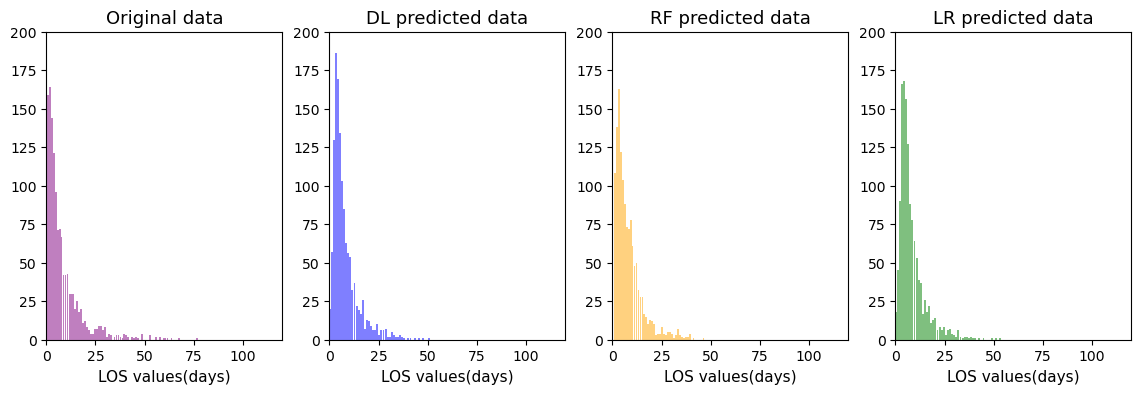

In [266]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4)

fig.set_size_inches(14, 4)

ax1.hist(y_test, alpha=0.5,bins=int(max(y_test)), rwidth = 0.92, color="purple")
ax1.set_ylim(0,200)
ax1.set_xlim(0,120)
ax1.set_xlabel('LOS values(days)', fontsize = 11)
ax1.set_title('Original data', fontsize = 13)

ax2.hist(y_pred_dl_test, alpha=0.5,bins=int(max(y_pred_dl_test)), rwidth = 0.92, color="blue")
ax2.set_ylim(0,200)
ax2.set_xlim(0,120)
ax2.set_xlabel('LOS values(days)', fontsize = 11)
ax2.set_title('DL predicted data', fontsize = 13)

ax3.hist(y_pred_rf_test, alpha=0.5,bins=int(max(y_pred_rf_test)), rwidth = 0.92, color="orange")
ax3.set_ylim(0,200)
ax3.set_xlim(0,120)
ax3.set_xlabel('LOS values(days)', fontsize = 11)
ax3.set_title('RF predicted data', fontsize = 13)

ax4.hist(y_pred_lr_test, alpha=0.5,bins=int(max(y_pred_lr_test)), rwidth = 0.92, color="green")
ax4.set_ylim(0,200)
ax4.set_xlim(0,120)
ax4.set_xlabel('LOS values(days)', fontsize = 11)
ax4.set_title('LR predicted data', fontsize = 13)

# Save the plot as an image (optional)
plt.savefig('Images/comparison_hists__yes_segment__yes_bcvars__no_bclos.png', bbox_inches='tight', dpi=300)

plt.show()

C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\930172149.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\930172149.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\930172149.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\930172149.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\930172149.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(labels=ax3

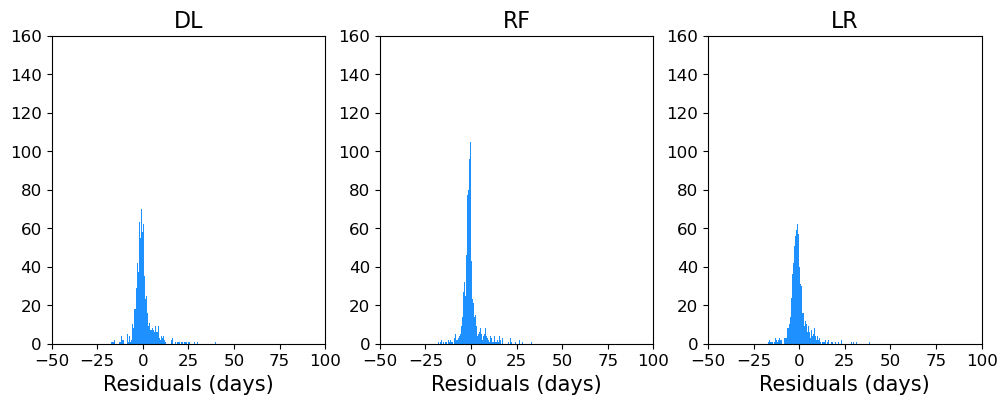

In [265]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
ax1.hist(dl_residuals, bins = 200,  alpha=1, color='dodgerblue') # you may select the no. of bins  
ax1.set_title('DL', fontsize = 16)
ax1.set_ylim(0,160)
ax1.set_xlim(-50,100)
ax1.set_xlabel('Residuals (days)', fontsize = 15)   
ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)

ax2.hist(rf_residuals, bins = 200,  alpha=1, color='dodgerblue') # you may select the no. of bins  
ax2.set_title('RF', fontsize = 16)
ax2.set_ylim(0,160)
ax2.set_xlim(-50,100)
ax2.set_xlabel('Residuals (days)', fontsize = 15) 
ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)

ax3.hist(lr_residuals, bins = 200,  alpha=1, color='dodgerblue') # you may select the no. of bins  
ax3.set_title('LR', fontsize = 16)
ax3.set_ylim(0,160)
ax3.set_xlim(-50,100)
ax3.set_xlabel('Residuals (days)', fontsize = 15) 
ax3.set_xticklabels(labels=ax3.get_xticklabels(), fontsize=12)
ax3.set_yticklabels(labels=ax3.get_yticklabels(), fontsize=12)

# Save the plot as an image (optional)
plt.savefig('Images/residuals_yes_segment__no_bcvars__no_bclos.png', bbox_inches='tight', dpi=300)

plt.show()

In [176]:
box_cox_norm_test = True

r2_dl_test_bc, mae_dl_test_bc, rmse_dl_test_bc, tol_dl_test_bc, y_pred_dl_test_bc, r2_rf_test_bc, mae_rf_test_bc, rmse_rf_test_bc, tol_rf_test_bc, y_pred_rf_test_bc, r2_lr_test_bc, mae_lr_test_bc, rmse_lr_test_bc, tol_lr_test_bc, y_pred_lr_test_bc = evalModels(X_train_sca, X_test_sca, y_train, y_test, box_cox_norm_test)

print("DL -- R2 (mean+-std): ",r2_dl_test_bc)
print("DL -- MAE (mean+-std): ",mae_dl_test_bc)
print("DL -- RMSE (mean+-std): ",rmse_dl_test_bc)
print("DL -- TOL (mean+-std): ",tol_dl_test_bc)

print("RF -- R2 (mean+-std): ",r2_rf_test_bc)
print("RF -- MAE (mean+-std): ",mae_rf_test_bc)
print("RF -- RMSE (mean+-std): ",rmse_rf_test_bc)
print("RF -- TOL (mean+-std): ",tol_rf_test_bc)

print("LR -- R2 (mean+-std): ",r2_lr_test_bc)
print("LR -- MAE (mean+-std): ",mae_lr_test_bc)
print("LR -- RMSE (mean+-std): ",rmse_lr_test_bc)
print("LR -- TOL (mean+-std): ",tol_lr_test_bc)

# Calculate metrics for real values
real_mean = np.mean(y_test)
real_median = np.median(y_test)
real_max = np.max(y_test)
real_min = np.min(y_test)

# Calculate metrics for predicted values
dl_mean_bc = np.mean(y_pred_dl_test_bc)
dl_median_bc = np.median(y_pred_dl_test_bc)
dl_max_bc = np.max(y_pred_dl_test_bc)
dl_min_bc = np.min(y_pred_dl_test_bc)

rf_mean_bc = np.mean(y_pred_rf_test_bc)
rf_median_bc = np.median(y_pred_rf_test_bc)
rf_max_bc = np.max(y_pred_rf_test_bc)
rf_min_bc = np.min(y_pred_rf_test_bc)

lr_mean_bc = np.mean(y_pred_lr_test_bc)
lr_median_bc = np.median(y_pred_lr_test_bc)
lr_max_bc = np.max(y_pred_lr_test_bc)
lr_min_bc = np.min(y_pred_lr_test_bc)

# Calculate metrics for residuals
dl_residuals_bc = y_test - y_pred_dl_test_bc
dl_residual_mean_bc = np.mean(dl_residuals_bc)
dl_residual_skewness_bc = stats.skew(dl_residuals_bc)
dl_residual_kurtosis_bc = stats.kurtosis(dl_residuals_bc)
dl_residual_min_bc = np.min(dl_residuals_bc)
dl_residual_max_bc = np.max(dl_residuals_bc)

rf_residuals_bc = y_test - y_pred_rf_test_bc
rf_residual_mean_bc = np.mean(rf_residuals_bc)
rf_residual_skewness_bc = stats.skew(rf_residuals_bc)
rf_residual_kurtosis_bc = stats.kurtosis(rf_residuals_bc)
rf_residual_min_bc = np.min(rf_residuals_bc)
rf_residual_max_bc = np.max(rf_residuals_bc)

lr_residuals_bc = y_test - y_pred_lr_test_bc
lr_residual_mean_bc = np.mean(lr_residuals_bc)
lr_residual_skewness_bc = stats.skew(lr_residuals_bc)
lr_residual_kurtosis_bc = stats.kurtosis(lr_residuals_bc)
lr_residual_min_bc = np.min(lr_residuals_bc)
lr_residual_max_bc = np.max(lr_residuals_bc)

print("Metrics for Real Values:")
print("Mean:", real_mean)
print("Median:", real_median)
print("Max:", real_max)
print("Min:", real_min)
print()

# Create a summary dataframe
summary_data_bc = {
    'Metric': ['Mean', 'Median', 'Max', 'Min', 'Residual Mean', 'Residual Skewness', 'Residual Kurtosis', 'Residual Min', 'Residual Max'],
    'DL Predicted': [dl_mean_bc, dl_median_bc, dl_max_bc, dl_min_bc, dl_residual_mean_bc, dl_residual_skewness_bc, dl_residual_kurtosis_bc, dl_residual_min_bc, dl_residual_max_bc],
    'RF Predicted': [rf_mean_bc, rf_median_bc, rf_max_bc, rf_min_bc, rf_residual_mean_bc, rf_residual_skewness_bc, rf_residual_kurtosis_bc, rf_residual_min_bc, rf_residual_max_bc],
    'LR Predicted': [lr_mean_bc, lr_median_bc, lr_max_bc, lr_min_bc, lr_residual_mean_bc, lr_residual_skewness_bc, lr_residual_kurtosis_bc, lr_residual_min_bc, lr_residual_max_bc]
}

summary_df_bc = pd.DataFrame(summary_data_bc)

print(summary_df_bc)

Predicting DL...
42/42 [==============================] - 0s 3ms/step
Predicting RF...
Predicting LR...
DL -- R2 (mean+-std):  0.528
DL -- MAE (mean+-std):  3.017
DL -- RMSE (mean+-std):  5.926
DL -- TOL (mean+-std):  73.747
RF -- R2 (mean+-std):  0.61
RF -- MAE (mean+-std):  2.825
RF -- RMSE (mean+-std):  5.385
RF -- TOL (mean+-std):  75.617
LR -- R2 (mean+-std):  0.595
LR -- MAE (mean+-std):  2.967
LR -- RMSE (mean+-std):  5.494
LR -- TOL (mean+-std):  73.523
Metrics for Real Values:
Mean: 7.861078833208661
Median: 4.99583
Max: 67.80417
Min: 0.25

              Metric  DL Predicted  RF Predicted  LR Predicted
0               Mean      5.755144      6.996587      7.070046
1             Median      4.162248      4.975168      5.167352
2                Max     44.653390     38.930823     53.585221
3                Min      0.320528      0.540370      0.329473
4      Residual Mean      2.105934      0.864492      0.791033
5  Residual Skewness      3.213800      3.059567      2.785180
6  

In [104]:
# Calculate metrics for real values
real_mean = np.mean(y_test)
real_median = np.median(y_test)
real_max = np.max(y_test)
real_min = np.min(y_test)

# Calculate metrics for predicted values
dl_mean_bc = np.mean(y_pred_dl_test_bc)
dl_median_bc = np.median(y_pred_dl_test_bc)
dl_max_bc = np.max(y_pred_dl_test_bc)
dl_min_bc = np.min(y_pred_dl_test_bc)

rf_mean_bc = np.mean(y_pred_rf_test_bc)
rf_median_bc = np.median(y_pred_rf_test_bc)
rf_max_bc = np.max(y_pred_rf_test_bc)
rf_min_bc = np.min(y_pred_rf_test_bc)

lr_mean_bc = np.mean(y_pred_lr_test_bc)
lr_median_bc = np.median(y_pred_lr_test_bc)
lr_max_bc = np.max(y_pred_lr_test_bc)
lr_min_bc = np.min(y_pred_lr_test_bc)

# Calculate metrics for residuals
dl_residuals_bc = y_test - y_pred_dl_test_bc
dl_residual_mean_bc = np.mean(dl_residuals_bc)
dl_residual_skewness_bc = stats.skew(dl_residuals_bc)
dl_residual_kurtosis_bc = stats.kurtosis(dl_residuals_bc)
dl_residual_min_bc = np.min(dl_residuals_bc)
dl_residual_max_bc = np.max(dl_residuals_bc)

rf_residuals_bc = y_test - y_pred_rf_test_bc
rf_residual_mean_bc = np.mean(rf_residuals_bc)
rf_residual_skewness_bc = stats.skew(rf_residuals_bc)
rf_residual_kurtosis_bc = stats.kurtosis(rf_residuals_bc)
rf_residual_min_bc = np.min(rf_residuals_bc)
rf_residual_max_bc = np.max(rf_residuals_bc)

lr_residuals_bc = y_test - y_pred_lr_test_bc
lr_residual_mean_bc = np.mean(lr_residuals_bc)
lr_residual_skewness_bc = stats.skew(lr_residuals_bc)
lr_residual_kurtosis_bc = stats.kurtosis(lr_residuals_bc)
lr_residual_min_bc = np.min(lr_residuals_bc)
lr_residual_max_bc = np.max(lr_residuals_bc)

print("Metrics for Real Values:")
print("Mean:", real_mean)
print("Median:", real_median)
print("Max:", real_max)
print("Min:", real_min)
print()

# Create a summary dataframe
summary_data_bc = {
    'Metric': ['Mean', 'Median', 'Max', 'Min', 'Residual Mean', 'Residual Skewness', 'Residual Kurtosis', 'Residual Min', 'Residual Max'],
    'DL Predicted': [dl_mean_bc, dl_median_bc, dl_max_bc, dl_min_bc, dl_residual_mean_bc, dl_residual_skewness_bc, dl_residual_kurtosis_bc, dl_residual_min_bc, dl_residual_max_bc],
    'RF Predicted': [rf_mean_bc, rf_median_bc, rf_max_bc, rf_min_bc, rf_residual_mean_bc, rf_residual_skewness_bc, rf_residual_kurtosis_bc, rf_residual_min_bc, rf_residual_max_bc],
    'LR Predicted': [lr_mean_bc, lr_median_bc, lr_max_bc, lr_min_bc, lr_residual_mean_bc, lr_residual_skewness_bc, lr_residual_kurtosis_bc, lr_residual_min_bc, lr_residual_max_bc]
}

summary_df_bc = pd.DataFrame(summary_data_bc)

print(summary_df_bc)

Metrics for Real Values:
Mean: 7.861078833208661
Median: 4.99583
Max: 67.80417
Min: 0.25

              Metric  DL Predicted  RF Predicted  LR Predicted
0               Mean      6.907909      6.991845      7.070046
1             Median      5.014547      4.996355      5.167352
2                Max     53.230211     38.402456     53.585221
3                Min      0.401508      0.548706      0.329473
4      Residual Mean      0.953169      0.869234      0.791033
5  Residual Skewness      2.908614      3.070600      2.785180
6  Residual Kurtosis     16.635982     16.169117     16.232872
7       Residual Min    -18.670452    -14.787710    -18.780987
8       Residual Max     47.973690     49.469529     47.102674


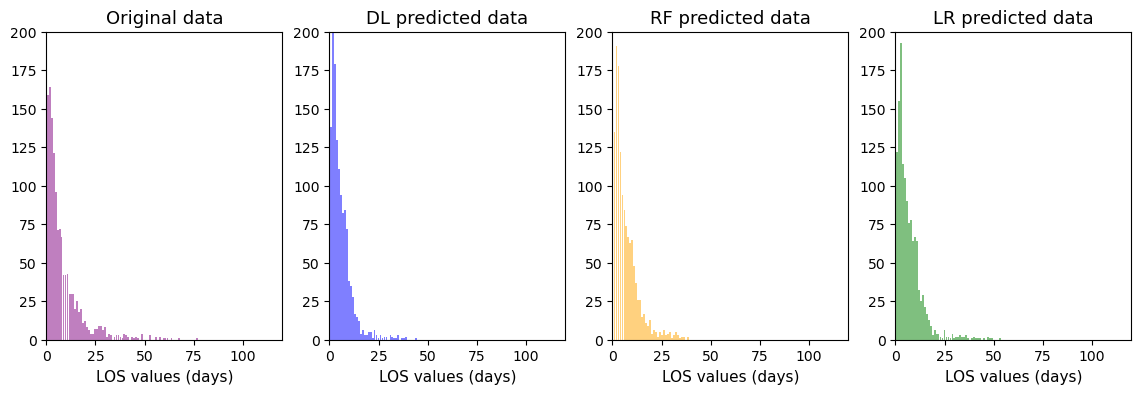

In [264]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4)

fig.set_size_inches(14, 4)

ax1.hist(y_test, alpha=0.5,bins=int(max(y_test)), rwidth = 0.92, color="purple")
ax1.set_ylim(0,200)
ax1.set_xlim(0,120)
ax1.set_xlabel('LOS values (days)', fontsize = 11)
ax1.set_title('Original data', fontsize = 13)

ax2.hist(y_pred_dl_test_bc, alpha=0.5,bins=int(max(y_pred_dl_test_bc)), rwidth = 0.92, color="blue")
ax2.set_ylim(0,200)
ax2.set_xlim(0,120)
ax2.set_xlabel('LOS values (days)', fontsize = 11)
ax2.set_title('DL predicted data', fontsize = 13)

ax3.hist(y_pred_rf_test_bc, alpha=0.5,bins=int(max(y_pred_rf_test_bc)), rwidth = 0.92, color="orange")
ax3.set_ylim(0,200)
ax3.set_xlim(0,120)
ax3.set_xlabel('LOS values (days)', fontsize = 11)
ax3.set_title('RF predicted data', fontsize = 13)

ax4.hist(y_pred_lr_test_bc, alpha=0.5,bins=int(max(y_pred_lr_test_bc)), rwidth = 0.92, color="green")
ax4.set_ylim(0,200)
ax4.set_xlim(0,120)
ax4.set_xlabel('LOS values (days)', fontsize = 11)
ax4.set_title('LR predicted data', fontsize = 13)

# Save the plot as an image (optional)
plt.savefig('Images/comparison_hists__yes_segment__yes_bcvars__yes_bclos.png', bbox_inches='tight', dpi=300)

plt.show()

C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\2229675292.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\2229675292.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\2229675292.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\2229675292.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)
C:\Users\joaoc\AppData\Local\Temp\ipykernel_13244\2229675292.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(label

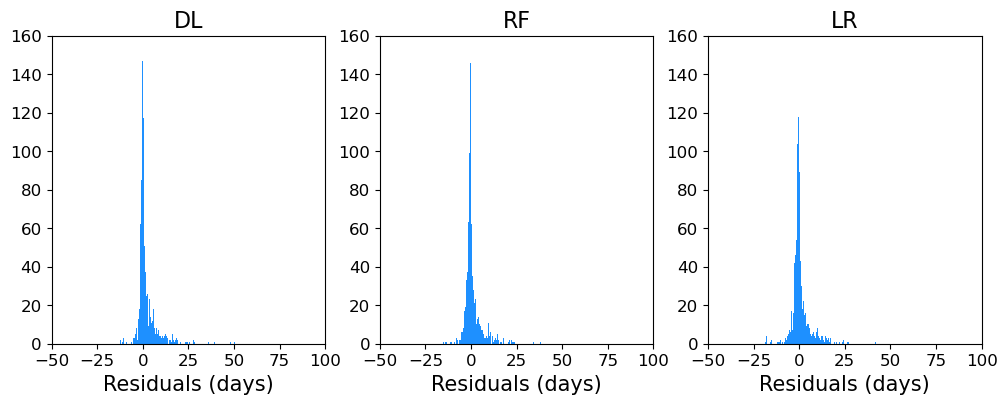

In [263]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(12, 4)
ax1.hist(dl_residuals_bc, bins = 200,  alpha=1, color='dodgerblue') # you may select the no. of bins  
ax1.set_title('DL', fontsize = 16)
ax1.set_ylim(0,160)
ax1.set_xlim(-50,100)
ax1.set_xlabel('Residuals (days)', fontsize = 15)   
ax1.set_xticklabels(labels=ax1.get_xticklabels(), fontsize=12)
ax1.set_yticklabels(labels=ax1.get_yticklabels(), fontsize=12)

ax2.hist(rf_residuals_bc, bins = 200,  alpha=1, color='dodgerblue') # you may select the no. of bins  
ax2.set_title('RF', fontsize = 16)
ax2.set_ylim(0,160)
ax2.set_xlim(-50,100)
ax2.set_xlabel('Residuals (days)', fontsize = 15) 
ax2.set_xticklabels(labels=ax2.get_xticklabels(), fontsize=12)
ax2.set_yticklabels(labels=ax2.get_yticklabels(), fontsize=12)

ax3.hist(lr_residuals_bc, bins = 200,  alpha=1, color='dodgerblue') # you may select the no. of bins  
ax3.set_title('LR', fontsize = 16)
ax3.set_ylim(0,160)
ax3.set_xlim(-50,100)
ax3.set_xlabel('Residuals (days)', fontsize = 15) 
ax3.set_xticklabels(labels=ax3.get_xticklabels(), fontsize=12)
ax3.set_yticklabels(labels=ax3.get_yticklabels(), fontsize=12)

# Save the plot as an image (optional)
plt.savefig('Images/residuals_yes_segment__yes_bcvars__yes_bclos.png', bbox_inches='tight', dpi=300)

plt.show()

### Run n iterations

In [144]:
def run(k, X, y, box_cox_norm = False):
    r2_res_dl = []
    rmse_res_dl = []
    mae_res_dl = []
    tol_res_dl = []

    r2_res_rf = []
    rmse_res_rf = []
    mae_res_rf = []
    tol_res_rf = []
        
    r2_res_lr = []
    rmse_res_lr = []
    mae_res_lr = []
    tol_res_lr = []

    k_fold = KFold(n_splits=k, shuffle=True, random_state=7)
    _iter = 1
    for train_indexes, test_indexes in k_fold.split(X,y):
        #for i in range(k):
        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        
        X_train, X_test = X.iloc[train_indexes], X.iloc[test_indexes]
        y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]

        #_type_sca = 2   #Scale
        #X_train = Scaler(X_train, _type_sca)
        #X_test = Scaler(X_test, _type_sca)
        if _iter == 1:
            print("Length Train: ",len(train_indexes))
            print("Length Test: ",len(test_indexes))


        #y = df_test.values[:,0].astype(float) # df_v2['NumeroDiasVentilacaoInvasiva']
        #X = df_test.values[:,1:].astype(float)

        #print(f"Features: {len(X[0])}")
        #print(f"Examples: {len(X)}")

        #X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2)
        #print("Examples to train: {}".format(len(X_train)))
        
        # DL
        r2_dl, mae_dl, rmse_dl, tol_dl, y_predicted_dl = DL_train(X_train, X_test, y_train, y_test, box_cox_norm)
        r2_res_dl.append(r2_dl)
        mae_res_dl.append(mae_dl)
        rmse_res_dl.append(rmse_dl)
        tol_res_dl.append(tol_dl)
        
        #RF
        r2_rf, mae_rf, rmse_rf, tol_rf, y_predicted_rf = RF_train(X_train, X_test, y_train, y_test, box_cox_norm)
        r2_res_rf.append(r2_rf)
        mae_res_rf.append(mae_rf)
        rmse_res_rf.append(rmse_rf)
        tol_res_rf.append(tol_rf)
        
        #LR
        r2_lr, mae_lr, rmse_lr, tol_lr, y_predicted_lr = LR_train(X_train, X_test, y_train, y_test, box_cox_norm)
        r2_res_lr.append(r2_lr)
        mae_res_lr.append(mae_lr)
        rmse_res_lr.append(rmse_lr)
        tol_res_lr.append(tol_lr)
        
        print("Iter: ",_iter, " -|- R2 -- DL: ", round(np.mean(r2_res_dl), 3), "RF: ",round(np.mean(r2_res_rf), 3), "LR: ",round(np.mean(r2_res_lr), 3))
        _iter += 1

    """"""
    print("------Deep Learning------")
    final_r2_dl = round(np.mean(r2_res_dl), 3)
    std_r2_dl = round(np.std(r2_res_dl), 3)
    final_mae_dl = round(np.mean(mae_res_dl), 3)
    std_mae_dl = round(np.std(mae_res_dl), 3)
    final_rmse_dl = round(np.mean(rmse_res_dl), 3)
    std_rmse_dl = round(np.std(rmse_res_dl), 3)
    final_tol_dl = round(np.mean(tol_res_dl), 3)
    std_tol_dl = round(np.std(tol_res_dl), 3)
    print("R2 List: ",r2_res_dl)
    print("R2 (mean+-std): ",final_r2_dl,"+-",std_r2_dl)
    print("MAE List: ",mae_res_dl)
    print("MAE (mean+-std): ",final_mae_dl,"+-",std_mae_dl)
    print("RMSE List: ",rmse_res_dl)
    print("RMSE (mean+-std): ",final_rmse_dl,"+-",std_rmse_dl)
    print("TOL List: ",tol_res_dl)
    print("TOL (mean+-std): ",final_tol_dl,"+-",std_tol_dl)
    print("------Random Forest------")
    final_r2_rf = round(np.mean(r2_res_rf), 3)
    std_r2_rf = round(np.std(r2_res_rf), 3)
    final_mae_rf = round(np.mean(mae_res_rf), 3)
    std_mae_rf = round(np.std(mae_res_rf), 3)
    final_rmse_rf = round(np.mean(rmse_res_rf), 3)
    std_rmse_rf = round(np.std(rmse_res_rf), 3)
    final_tol_rf = round(np.mean(tol_res_rf), 3)
    std_tol_rf = round(np.std(tol_res_rf), 3)
    print("R2 List: ",r2_res_rf)
    print("R2 (mean+-std): ",final_r2_rf,"+-",std_r2_rf)
    print("MAE List: ",mae_res_rf)
    print("MAE (mean+-std): ",final_mae_rf,"+-",std_mae_rf)
    print("RMSE List: ",rmse_res_rf)
    print("RMSE (mean+-std): ",final_rmse_rf,"+-",std_rmse_rf)
    print("TOL List: ",tol_res_rf)
    print("TOL (mean+-std): ",final_tol_rf,"+-",std_tol_rf)
    print("------Linear Regression------")
    final_r2_lr = round(np.mean(r2_res_lr), 3)
    std_r2_lr = round(np.std(r2_res_lr), 3)
    final_mae_lr = round(np.mean(mae_res_lr), 3)
    std_mae_lr = round(np.std(mae_res_lr), 3)
    final_rmse_lr = round(np.mean(rmse_res_lr), 3)
    std_rmse_lr = round(np.std(rmse_res_lr), 3)
    final_tol_lr = round(np.mean(tol_res_lr), 3)
    std_tol_lr = round(np.std(tol_res_lr), 3)
    print("R2 List: ",r2_res_lr)
    print("R2 (mean+-std): ",final_r2_lr,"+-",std_r2_lr)
    print("MAE List: ",mae_res_lr)
    print("MAE (mean+-std): ",final_mae_lr,"+-",std_mae_lr)
    print("RMSE List: ",rmse_res_lr)
    print("RMSE (mean+-std): ",final_rmse_lr,"+-",std_rmse_lr)
    print("TOL List: ",tol_res_lr)
    print("TOL (mean+-std): ",final_tol_lr,"+-",std_tol_lr)

In [145]:
def runCluster(k, X, y, avg_cluster_flag):
    r2_res_dl = []
    rmse_res_dl = []
    mae_res_dl = []

    r2_res_rf = []
    rmse_res_rf = []
    mae_res_rf = []
        
    r2_res_lr = []
    rmse_res_lr = []
    mae_res_lr = []

    #cv = KFold(n_splits=_iter, random_state=1, shuffle=True)
    #k_fold = KFold(n_splits=k, shuffle=True, random_state=0)
    _iter = 1
    #for train_indexes, test_indexes in k_fold.split(X_final,y):
    for i in range(k):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

        #X_train, X_test = X_final.iloc[train_indexes], X_final.iloc[test_indexes]
        #y_train, y_test = y.iloc[train_indexes], y.iloc[test_indexes]
        #for i in range(_iter):
        

        #df_test = df_v2.sample(n=1000)

        #y = df_test.values[:,0].astype(float) # df_v2['NumeroDiasVentilacaoInvasiva']
        #X = df_test.values[:,1:].astype(float)

        #print(f"Features: {len(X[0])}")
        #print(f"Examples: {len(X)}")

        #X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2)
        #print("Examples to train: {}".format(len(X_train)))
        
        # DL
        #final_linear = Lasso(alpha=0.02)

        X_train_labels = kmeans.predict(X_train)
        X_list, y_list = getSeparateClusterData(X_train, y_train, X_train_labels)

        r2_dl, mae_dl, rmse_dl = runDL_cluster(X_list, X_test, y_list, y_test, avg_cluster_flag)
        print(r2_dl)
        print(mae_dl)
        print(rmse_dl)
        r2_res_dl.append(r2_dl)
        mae_res_dl.append(mae_dl)
        rmse_res_dl.append(rmse_dl)
        
        #RF
        r2_rf, mae_rf, rmse_rf = runRF_cluster(X_list, X_test, y_list, y_test, avg_cluster_flag)
        r2_res_rf.append(r2_rf)
        mae_res_rf.append(mae_rf)
        rmse_res_rf.append(rmse_rf)
        
        #LR
        r2_lr, mae_lr, rmse_lr = runLR_cluster(X_list, X_test, y_list, y_test, avg_cluster_flag)
        r2_res_lr.append(r2_lr)
        mae_res_lr.append(mae_lr)
        rmse_res_lr.append(rmse_lr)
        

        print("Iter: ",_iter)
        _iter += 1

    """"""
    print("------Deep Learning------")
    final_r2_dl = round(np.mean(r2_res_dl), 3)
    std_r2_dl = round(np.std(r2_res_dl), 3)
    final_mae_dl = round(np.mean(mae_res_dl), 3)
    std_mae_dl = round(np.std(mae_res_dl), 3)
    final_rmse_dl = round(np.mean(rmse_res_dl), 3)
    std_rmse_dl = round(np.std(rmse_res_dl), 3)
    print("R2 List: ",r2_res_dl)
    print("R2 (mean+-std): ",final_r2_dl,"+-",std_r2_dl)
    print("MAE List: ",mae_res_dl)
    print("MAE (mean+-std): ",final_mae_dl,"+-",std_mae_dl)
    print("RMSE List: ",rmse_res_dl)
    print("RMSE (mean+-std): ",final_rmse_dl,"+-",std_rmse_dl)
    print("\n------Random Forest------")
    final_r2_rf = round(np.mean(r2_res_rf), 3)
    std_r2_rf = round(np.std(r2_res_rf), 3)
    final_mae_rf = round(np.mean(mae_res_rf), 3)
    std_mae_rf = round(np.std(mae_res_rf), 3)
    final_rmse_rf = round(np.mean(rmse_res_rf), 3)
    std_rmse_rf = round(np.std(rmse_res_rf), 3)
    print("R2 List: ",r2_res_rf)
    print("R2 (mean+-std): ",final_r2_rf,"+-",std_r2_rf)
    print("MAE List: ",mae_res_rf)
    print("MAE (mean+-std): ",final_mae_rf,"+-",std_mae_rf)
    print("RMSE List: ",rmse_res_rf)
    print("RMSE (mean+-std): ",final_rmse_rf,"+-",std_rmse_rf)
    print("\n------Linear Regression------")
    final_r2_lr = round(np.mean(r2_res_lr), 3)
    std_r2_lr = round(np.std(r2_res_lr), 3)
    final_mae_lr = round(np.mean(mae_res_lr), 3)
    std_mae_lr = round(np.std(mae_res_lr), 3)
    final_rmse_lr = round(np.mean(rmse_res_lr), 3)
    std_rmse_lr = round(np.std(rmse_res_lr), 3)
    print("R2 List: ",r2_res_lr)
    print("R2 (mean+-std): ",final_r2_lr,"+-",std_r2_lr)
    print("MAE List: ",mae_res_lr)
    print("MAE (mean+-std): ",final_mae_lr,"+-",std_mae_lr)
    print("RMSE List: ",rmse_res_lr)
    print("RMSE (mean+-std): ",final_rmse_lr,"+-",std_rmse_lr)

In [299]:
%%time 
# No segmentation
# Without boxcox
k = 20
run(k, X_sca, y)

Length Train:  14293
Length Test:  753
24/24 [==============================] - 0s 3ms/step
Iter:  1  -|- R2 -- DL:  0.491 RF:  0.523 LR:  0.484
24/24 [==============================] - 0s 3ms/step
Iter:  2  -|- R2 -- DL:  0.488 RF:  0.518 LR:  0.474
24/24 [==============================] - 0s 3ms/step
Iter:  3  -|- R2 -- DL:  0.46 RF:  0.503 LR:  0.447
24/24 [==============================] - 0s 3ms/step
Iter:  4  -|- R2 -- DL:  0.472 RF:  0.512 LR:  0.461
24/24 [==============================] - 0s 3ms/step
Iter:  5  -|- R2 -- DL:  0.477 RF:  0.528 LR:  0.467
24/24 [==============================] - 0s 3ms/step
Iter:  6  -|- R2 -- DL:  0.477 RF:  0.522 LR:  0.465
24/24 [==============================] - 0s 3ms/step
Iter:  7  -|- R2 -- DL:  0.474 RF:  0.523 LR:  0.463
24/24 [==============================] - 0s 3ms/step
Iter:  8  -|- R2 -- DL:  0.471 RF:  0.517 LR:  0.458
24/24 [==============================] - 0s 3ms/step
Iter:  9  -|- R2 -- DL:  0.476 RF:  0.525 LR:  0.461
24/24 [=

In [32]:
%%time 
# Without boxcox on LOS
# With segmentation
# Without boxcox
k = 20
run(k, X_sca, y)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 3ms/step
Iter:  1  -|- R2 -- DL:  0.685 RF:  0.666 LR:  0.708
11/11 [==============================] - 0s 4ms/step
Iter:  2  -|- R2 -- DL:  0.634 RF:  0.651 LR:  0.642
11/11 [==============================] - 0s 3ms/step
Iter:  3  -|- R2 -- DL:  0.588 RF:  0.615 LR:  0.594
11/11 [==============================] - 0s 3ms/step
Iter:  4  -|- R2 -- DL:  0.588 RF:  0.621 LR:  0.58
11/11 [==============================] - 0s 3ms/step
Iter:  5  -|- R2 -- DL:  0.603 RF:  0.645 LR:  0.6
11/11 [==============================] - 0s 3ms/step
Iter:  6  -|- R2 -- DL:  0.583 RF:  0.63 LR:  0.581
11/11 [==============================] - 0s 3ms/step
Iter:  7  -|- R2 -- DL:  0.582 RF:  0.623 LR:  0.58
11/11 [==============================] - 0s 3ms/step
Iter:  8  -|- R2 -- DL:  0.582 RF:  0.618 LR:  0.578
11/11 [==============================] - 0s 4ms/step
Iter:  9  -|- R2 -- DL:  0.589 RF:  0.622 LR:  0.585
11/11 [======

In [72]:
%%time 
# II
# Without boxcox on LOS
# With segmentation
# Without boxcox
k = 20
run(k, X_sca, y)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 3ms/step
Iter:  1  -|- R2 -- DL:  0.702 RF:  0.67 LR:  0.708
11/11 [==============================] - 0s 3ms/step
Iter:  2  -|- R2 -- DL:  0.643 RF:  0.652 LR:  0.642
11/11 [==============================] - 0s 3ms/step
Iter:  3  -|- R2 -- DL:  0.6 RF:  0.616 LR:  0.594
11/11 [==============================] - 0s 3ms/step
Iter:  4  -|- R2 -- DL:  0.592 RF:  0.621 LR:  0.58
11/11 [==============================] - 0s 4ms/step
Iter:  5  -|- R2 -- DL:  0.61 RF:  0.644 LR:  0.6
11/11 [==============================] - 0s 3ms/step
Iter:  6  -|- R2 -- DL:  0.589 RF:  0.629 LR:  0.581
11/11 [==============================] - 0s 3ms/step
Iter:  7  -|- R2 -- DL:  0.586 RF:  0.622 LR:  0.58
11/11 [==============================] - 0s 3ms/step
Iter:  8  -|- R2 -- DL:  0.584 RF:  0.618 LR:  0.578
11/11 [==============================] - 0s 3ms/step
Iter:  9  -|- R2 -- DL:  0.59 RF:  0.622 LR:  0.585
11/11 [==========

In [38]:
%%time 
# Without boxcox on LOS
# With segmentation
# With boxcox
k = 20
run(k, X_sca, y)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 5ms/step
Iter:  1  -|- R2 -- DL:  0.69 RF:  0.666 LR:  0.599
11/11 [==============================] - 0s 4ms/step
Iter:  2  -|- R2 -- DL:  0.646 RF:  0.65 LR:  0.564
11/11 [==============================] - 1s 45ms/step
Iter:  3  -|- R2 -- DL:  0.616 RF:  0.614 LR:  0.531
11/11 [==============================] - 0s 5ms/step
Iter:  4  -|- R2 -- DL:  0.614 RF:  0.622 LR:  0.54
11/11 [==============================] - 2s 89ms/step
Iter:  5  -|- R2 -- DL:  0.62 RF:  0.645 LR:  0.552
11/11 [==============================] - 0s 4ms/step
Iter:  6  -|- R2 -- DL:  0.603 RF:  0.632 LR:  0.54
11/11 [==============================] - 0s 4ms/step
Iter:  7  -|- R2 -- DL:  0.596 RF:  0.625 LR:  0.533
11/11 [==============================] - 0s 4ms/step
Iter:  8  -|- R2 -- DL:  0.596 RF:  0.619 LR:  0.53
11/11 [==============================] - 0s 3ms/step
Iter:  9  -|- R2 -- DL:  0.604 RF:  0.622 LR:  0.532
11/11 [=====

In [41]:
%%time 
# With boxcox on LOS
# With segmentation
# With boxcox
k = 20
run(k, X_sca, y, True)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 4ms/step
Iter:  1  -|- R2 -- DL:  0.692 RF:  0.651 LR:  0.699
11/11 [==============================] - 0s 4ms/step
Iter:  2  -|- R2 -- DL:  0.638 RF:  0.638 LR:  0.643
11/11 [==============================] - 0s 5ms/step
Iter:  3  -|- R2 -- DL:  0.614 RF:  0.602 LR:  0.609
11/11 [==============================] - 1s 24ms/step
Iter:  4  -|- R2 -- DL:  0.579 RF:  0.61 LR:  0.597
11/11 [==============================] - 0s 3ms/step
Iter:  5  -|- R2 -- DL:  0.588 RF:  0.634 LR:  0.601
11/11 [==============================] - 0s 4ms/step
Iter:  6  -|- R2 -- DL:  0.562 RF:  0.62 LR:  0.577
11/11 [==============================] - 0s 3ms/step
Iter:  7  -|- R2 -- DL:  0.562 RF:  0.611 LR:  0.572
11/11 [==============================] - 0s 4ms/step
Iter:  8  -|- R2 -- DL:  0.568 RF:  0.607 LR:  0.576
11/11 [==============================] - 0s 5ms/step
Iter:  9  -|- R2 -- DL:  0.573 RF:  0.608 LR:  0.581
11/11 [==

In [215]:
%%time          
# Com Box cox on LOS
k = 20
run(k, X_sca, y, True)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 3ms/step
Iter:  1  -|- R2 -- DL:  0.598 RF:  0.648 LR:  0.699
11/11 [==============================] - 0s 3ms/step
Iter:  2  -|- R2 -- DL:  0.589 RF:  0.636 LR:  0.643
11/11 [==============================] - 0s 3ms/step
Iter:  3  -|- R2 -- DL:  0.581 RF:  0.601 LR:  0.609
11/11 [==============================] - 0s 3ms/step
Iter:  4  -|- R2 -- DL:  0.54 RF:  0.609 LR:  0.597
11/11 [==============================] - 0s 3ms/step
Iter:  5  -|- R2 -- DL:  0.554 RF:  0.633 LR:  0.601
11/11 [==============================] - 0s 3ms/step
Iter:  6  -|- R2 -- DL:  0.537 RF:  0.619 LR:  0.577
11/11 [==============================] - 0s 3ms/step
Iter:  7  -|- R2 -- DL:  0.541 RF:  0.61 LR:  0.572
11/11 [==============================] - 0s 3ms/step
Iter:  8  -|- R2 -- DL:  0.552 RF:  0.607 LR:  0.576
11/11 [==============================] - 0s 4ms/step
Iter:  9  -|- R2 -- DL:  0.562 RF:  0.608 LR:  0.581
11/11 [===

In [460]:
%%time          
# Com Box cox 
k = 20
run(k, X_sca, y)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 4ms/step
Iter:  1  -|- R2 -- DL:  0.673 RF:  0.667 LR:  0.708
11/11 [==============================] - 0s 3ms/step
Iter:  2  -|- R2 -- DL:  0.639 RF:  0.651 LR:  0.642
11/11 [==============================] - 0s 3ms/step
Iter:  3  -|- R2 -- DL:  0.606 RF:  0.615 LR:  0.594
11/11 [==============================] - 0s 5ms/step
Iter:  4  -|- R2 -- DL:  0.608 RF:  0.622 LR:  0.58
11/11 [==============================] - 0s 4ms/step
Iter:  5  -|- R2 -- DL:  0.629 RF:  0.645 LR:  0.6
11/11 [==============================] - 0s 3ms/step
Iter:  6  -|- R2 -- DL:  0.609 RF:  0.631 LR:  0.581
11/11 [==============================] - 0s 3ms/step
Iter:  7  -|- R2 -- DL:  0.608 RF:  0.623 LR:  0.58
11/11 [==============================] - 0s 3ms/step
Iter:  8  -|- R2 -- DL:  0.611 RF:  0.619 LR:  0.578
11/11 [==============================] - 0s 3ms/step
Iter:  9  -|- R2 -- DL:  0.619 RF:  0.623 LR:  0.585
11/11 [=====

In [445]:
%%time          
# SEM Box cox 
k = 20
run(k, X_sca, y)

Length Train:  6349
Length Test:  335
11/11 [==============================] - 0s 3ms/step
Iter:  1  -|- R2 -- DL:  0.697 RF:  0.667 LR:  0.708
11/11 [==============================] - 0s 4ms/step
Iter:  2  -|- R2 -- DL:  0.638 RF:  0.651 LR:  0.642
11/11 [==============================] - 0s 4ms/step
Iter:  3  -|- R2 -- DL:  0.593 RF:  0.616 LR:  0.594
11/11 [==============================] - 0s 5ms/step
Iter:  4  -|- R2 -- DL:  0.577 RF:  0.622 LR:  0.58
11/11 [==============================] - 0s 3ms/step
Iter:  5  -|- R2 -- DL:  0.598 RF:  0.645 LR:  0.6
11/11 [==============================] - 0s 3ms/step
Iter:  6  -|- R2 -- DL:  0.58 RF:  0.63 LR:  0.581
11/11 [==============================] - 0s 5ms/step
Iter:  7  -|- R2 -- DL:  0.579 RF:  0.624 LR:  0.58
11/11 [==============================] - 0s 3ms/step
Iter:  8  -|- R2 -- DL:  0.579 RF:  0.619 LR:  0.578
11/11 [==============================] - 0s 5ms/step
Iter:  9  -|- R2 -- DL:  0.586 RF:  0.623 LR:  0.585
11/11 [=======